# <font face = Tahoma color=Blue size=6>Surprise Housing - Advanced Regression Model for Prospective Buyers in Australia

<font color=green size=4 face=tahoma><b>Problem Statement:</font>
<li>A US-based housing company named Surprise Housing has decided to enter the Australian market. 
<li>The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
<li>For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file.

<br>
    <br>
    
<font color=green size=4 face=tahoma><b>Objective:</font>
        
<li>Objective is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
<li>The company wants to know:
    <ul>
        <li>Which variables are significant in predicting the price of a house, and
        <li>How well those variables describe the price of a house.
        <li>Determine the optimal value of lambda for ridge and lasso regression.
    </ul>
</li>

<br>
    <br>
    <font color=green size=4 face=tahoma><b>Business Goal:</font>        
<li>Model the price of houses with the available independent variables. 
<li>This model will then be used by the management to understand how exactly the prices vary with the variables. 
<li>They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
<li>Further, the model will be a good way for management to understand the pricing dynamics of a new market.



<font color=blue size=5 face=tahoma><b>Part 1: Programming Assignment as follows:</font>

<font size=4><u><b>Approach to this programming assignment:</b></u> 
<br><br>Import all required libraries <b><font color=brick size=4>>></b> Import Data from train.csv  <b><font color=brick size=4>>></b> EDA (Refer given Data Dictionary) <b><font color=brick size=4>>></b> Features Engineering <b><font color=brick size=4>>></b> Data PreProcessing <b><font color=brick size=4>>></b> Build the Model <b><font color=brick size=4>>></b> Evaluate the Model <b><font color=brick size=4>>></b> Fine Tune the Model <b><font color=brick size=4>>></b> Finalize the Model <b><font color=brick size=4>>></b> Conclude Part 1 - Programming Assignment 

### <font color=blue>Import all the required python libraries for data handling, and Machine Learning algorithms for Advanced Regression techniques.

In [232]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Import Scikit Learn library to be able to perform predictive data anlysis and Linear Regression.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import sklearn.metrics as metrics

# Import statsmodel api for estimating various statistical models, conducting statistical tests, and exploring data, especially VIF.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder

### <font color=blue> Import source data from train.csv and observe the data along with its few characteristics

In [41]:
#Load the day dataset from its csv file
train=pd.read_csv(r"C:\Users\ramjiadmin\SurpriseHousing_AdvancedRegressionAssignment_RameshVelivela_19MAY2024\train.csv")

print("Shape of the inbound data (# of ROWS, and # of COLUMNS) = ", train.shape)

train.head()

Shape of the inbound data (# of ROWS, and # of COLUMNS) =  (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [42]:
# Describe the dataset to view its few aggregates & stats like count, mean, SD, min, max and 25/50/07 quartile values 
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### <font color = blue>Check the source data quality and cleans the data as needed (ensure no null cols or rows, remove unwanted columns from the dataset, drop duplicates - if any)

#### Since it has significant number of columns, its required to change display setting for us to be able see the complete output of any step we perform.

In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [45]:
# Any NULL/MISSING values by each column & row in dataset?

#Column wise null checks
round(100*(train.isnull().sum()/len(train)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [46]:
#Row wise null checks
round((train.isnull().sum(axis=1)/len(train))*100,2).sort_values(ascending=False)

39      1.03
1011    1.03
1218    1.03
533     1.03
1179    0.96
705     0.96
520     0.96
1143    0.75
1035    0.75
1030    0.75
342     0.75
1321    0.75
375     0.75
287     0.75
386     0.68
646     0.68
102     0.68
1219    0.68
1323    0.68
1326    0.68
1232    0.68
125     0.68
1283    0.68
108     0.68
1137    0.68
582     0.68
1123    0.68
1257    0.68
464     0.68
749     0.68
1216    0.68
738     0.68
165     0.68
613     0.68
614     0.68
736     0.68
78      0.68
48      0.68
156     0.68
155     0.68
441     0.68
434     0.68
148     0.68
710     0.68
89      0.68
90      0.68
1096    0.68
1234    0.68
1407    0.68
826     0.68
970     0.68
1412    0.68
976     0.68
1090    0.68
984     0.68
868     0.68
259     0.68
960     0.68
528     0.68
1000    0.68
1009    0.68
843     0.68
241     0.68
535     0.68
1049    0.68
942     0.68
1450    0.68
894     0.68
897     0.68
954     0.68
1449    0.68
1453    0.68
1045    0.68
210     0.68
649     0.62
635     0.62
431     0.62

In [47]:
train_NA = train[train.isna().any(axis=1)]

In [48]:
train_NA.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

<font color=blue>Python considering rows having NULL attribute aluesfor  some of the features which are getting indicated  their unavailability in that"house" as "NA", but, these should not be treated as pure null attribs. 
<br>
    <br>
<b>Hence, need to indicate python to ignore its default NA (NaN) characteristic, while re-importing this train.csv data

In [49]:
## keep default na behavior aside i.e. "False"
#Load the day dataset from its csv file
train=pd.read_csv(r"C:\Users\ramjiadmin\SurpriseHousing_AdvancedRegressionAssignment_RameshVelivela_19MAY2024\train.csv", keep_default_na=False)
train.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [50]:
# Any NULL/MISSING values by each column & row in dataset?

#Column wise null checks
round(100*(train.isnull().sum()/len(train)), 2).sort_values(ascending=False)

Id               0.0
CentralAir       0.0
GarageYrBlt      0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
PoolQC           0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolArea         0.0
GarageQual       0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
Electrical       0.0
HeatingQC        0.0
MSSubClass       0.0
Heating          0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2   

<font color=blue>Replcing "NA" to "None" in all the categorical variables which are having NA to indicate its unavailability in that facility / asset / house.

In [53]:
train[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = train[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
train.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [60]:
train.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   443.639726    46.549315   567.240411   
std      30.202904     20.645407   456.098091   161.319273   441.866955   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000   223.000000   
50%    1973.000000   1994.000000   383.500000     0.000000   477.500000   
75%    2000.000000   2004.000000   712.250000     0.000000   808.000000   
max    2010.000000   2010.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       1.046575      6.517808     0.613014     1.767123   472.980137   
std        0.220338      1.625393     0.644666     0.747315   213.804841   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000     1.000000   334.500000   
50%        1.000000      6.000000     1.000000     2.000000   480.000000   
75%        1.000000      7.000000     1.000000     2.000000   576.000000   
max        3.000000     14.000000     3.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.00

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

#### Drop duplicates

In [21]:
print("Shape BEFORE drop duplicates: ", train.shape)
# Checking for duplicates and dropping the entire duplicate row if any
train.drop_duplicates(subset=None, inplace=True)
print("Shape AFTER drop duplicates: ", train.shape)

Shape BEFORE drop duplicates:  (1460, 81)
Shape AFTER drop duplicates:  (1460, 81)


#####  <font color=blue> No duplicate rows as same share "before" and "after" dropping duplicates

#### <font color=blue> Find columns with missing values and remove them

In [70]:
columns_with_missing = train.columns[train.isnull().any()]

## EDA / Analyzing or Exploring the Data - Univariate & Multivariate Analysis

<font color=blue size=4>Analyze the <b>TARGET variable - SalePrice and its skewness</b> by drawing the Distribution Plot

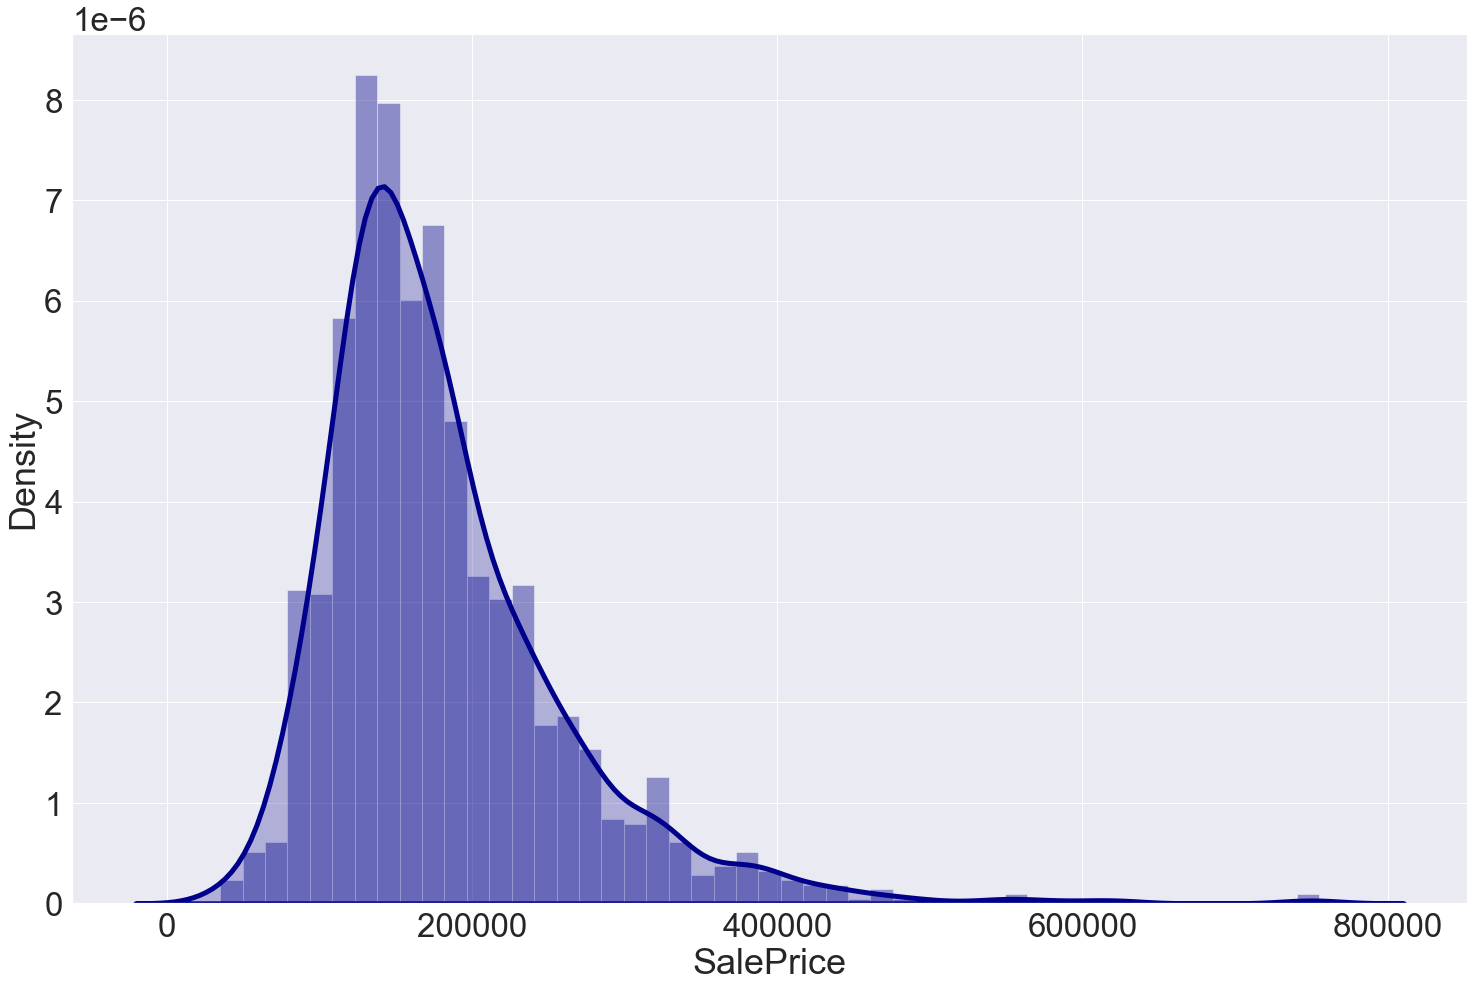

In [95]:
plt.figure(figsize=[25,16])
sns.distplot(train['SalePrice'], hist=True, color='darkblue', kde_kws = {'shade': True, 'linewidth': 5});

From the above distribution plot, we can say target variable SalePrice is having Right skewed, which indicates the degree of asymmetry of the probability distribution of a real-valued random variable around its mean.

<font color=blue size=3><b>Let's check the skewness on target variable - SalePrice.

In [96]:
train['SalePrice'].skew()

1.8828757597682129

<font color=blue size=3>Here <b>skewness value of approximately "1.88", this means is "right skewed", with a longer tail on the right side of its peak</b>. <br><br>
This means that there are relatively infrequent observations at higher values in your dataset</font>

This outlier should be handled by applying <b>Log Transformation, which is a feature transformation technique used to modify the values of a numeric variable by taking the logarithm of each value</b>. <font color=green size=3><u>The logarithm function used in the transformation is typically the natural logarithm (base e) or the logarithm with base 10.</u></font>

<font color=blue size=3>Since here we have Right-Skewed Data, (meaning it has a long tail on the right side), log transformation can help normalize the distribution. It compresses large values and stretches small values, making the data more symmetrical.</font>

In [97]:
# Apply Log transformation on the TARGET variable - SalePrice

train['SalePrice'] = np.log(train['SalePrice'])

<font color=blue size=3><b>Let's check the skewness "again" on target variable

In [98]:
train['SalePrice'].skew()

0.12133506220520406

<font color=blue size=3><b><u>Now our target variable, SalePrice, is  normalized.

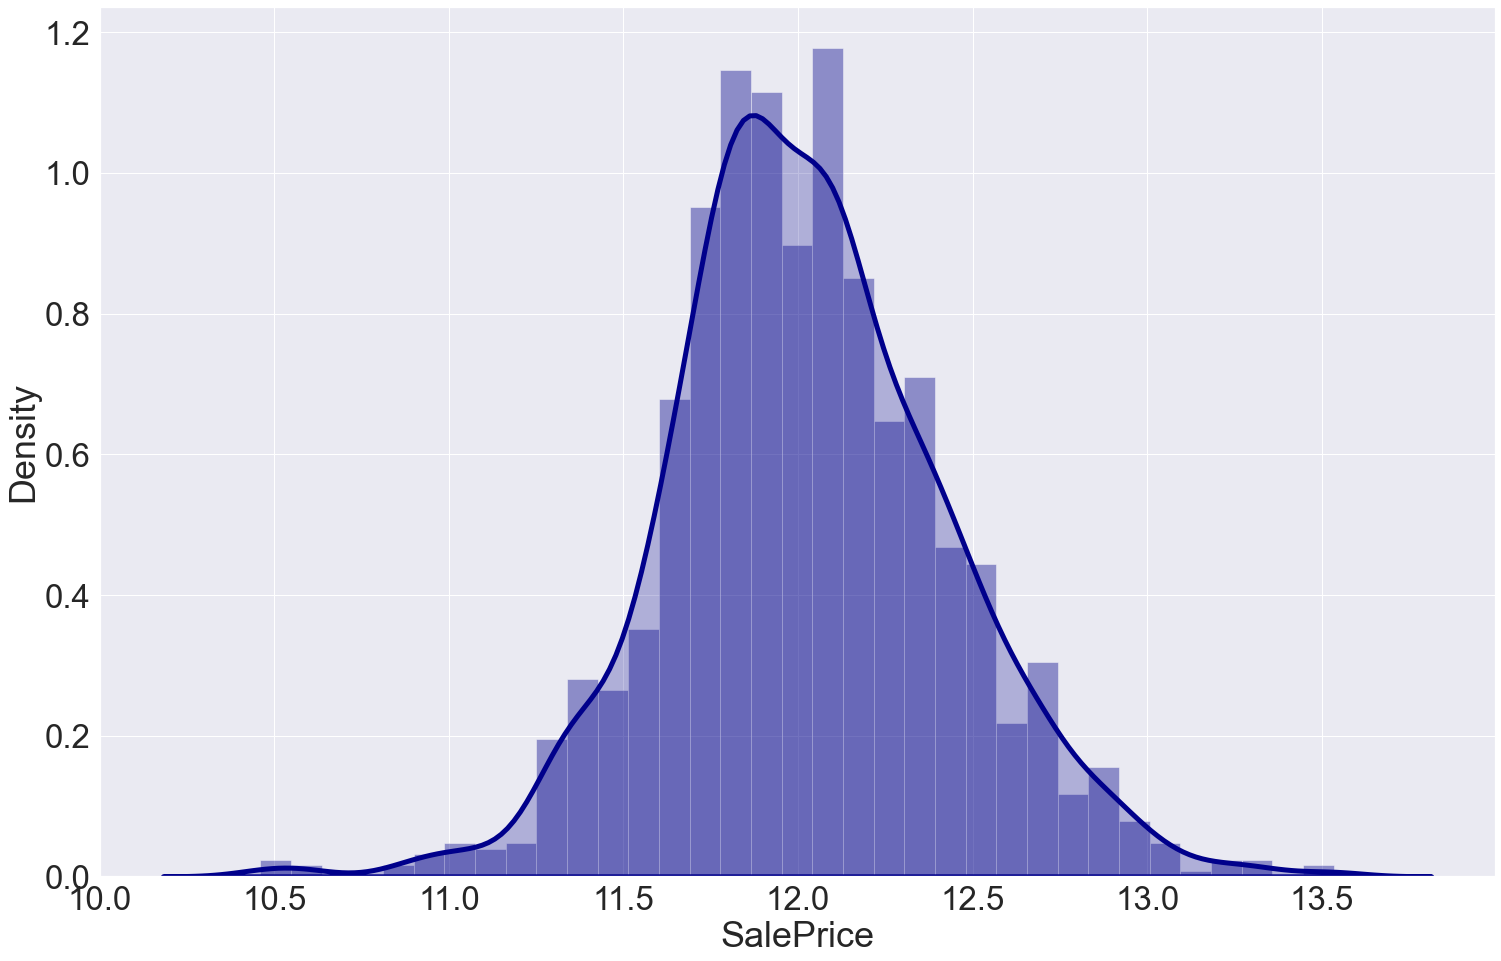

In [103]:
plt.figure(figsize=[25,16])
sns.distplot(train['SalePrice'], hist=True, color='darkblue', kde_kws = {'shade': True, 'linewidth': 5});

## <font color = blue>Continue the EDA on the rest of attributes - Numerical & categorical

<b>Separate the numerical and categorical variables into two distinct datasets from train dataset

In [104]:
train_num = train.select_dtypes(include=['int64', 'float64'])
train_num.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008  12.247694  
1         0        0       5    2007  12.109011  
2         0        0       9    2008  12.317167  
3         0        0       2    2006  11.849398  
4         0        0      12    2008  12.429216

In [105]:
train_cat = train.select_dtypes(include='object')
train_cat.head()

MSZoning LotFrontage Street Alley LotShape LandContour Utilities LotConfig  \
0       RL          65   Pave  None      Reg         Lvl    AllPub    Inside   
1       RL          80   Pave  None      Reg         Lvl    AllPub       FR2   
2       RL          68   Pave  None      IR1         Lvl    AllPub    Inside   
3       RL          60   Pave  None      IR1         Lvl    AllPub    Corner   
4       RL          84   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace        196        Gd        TA   
1  CompShg     MetalSd     MetalSd       None          0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace        162        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None          0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace        350        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
0      PConc       Gd       TA           No          GLQ          Unf    GasA   
1     CBlock       Gd       TA           Gd          ALQ          Unf    GasA   
2      PConc       Gd       TA           Mn          GLQ          Unf    GasA   
3     BrkTil       TA       Gd           No          ALQ          Unf    GasA   
4      PConc       Gd       TA           Av          GLQ          Unf    GasA   

  HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu  \
0        Ex          Y      SBrkr          Gd        Typ        None   
1        Ex          Y      SBrkr          TA        Typ          TA   
2        Ex          Y      SBrkr          Gd        Typ          TA   
3        Gd          Y      SBrkr          Gd        Typ          Gd   
4        Ex          Y      SBrkr          Gd        Typ          TA   

  GarageType GarageYrBlt GarageFinish GarageQual GarageCond PavedDrive PoolQC  \
0     Attchd        2003          RFn         TA         TA          Y   None   
1     Attchd        1976          RFn         TA         TA          Y   None   
2     Attchd        2001          RFn         TA         TA          Y   None   
3     Detchd        1998          Unf         TA         TA          Y   None   
4     Attchd        2000          RFn         TA         TA          Y   None   

  Fence MiscFeature SaleType SaleCondition  
0  None        None       WD        Normal  
1  None        None       WD        Normal  
2  None        None       WD        Normal  
3  None        None       WD       Abnorml  
4  None        None       WD        Normal

<font color=blue size=3><b> Analyze all the <u> NUMERICAL attributes</u> from train_num set by plotting various graphs - box plots,  histrograms, and others as needed.

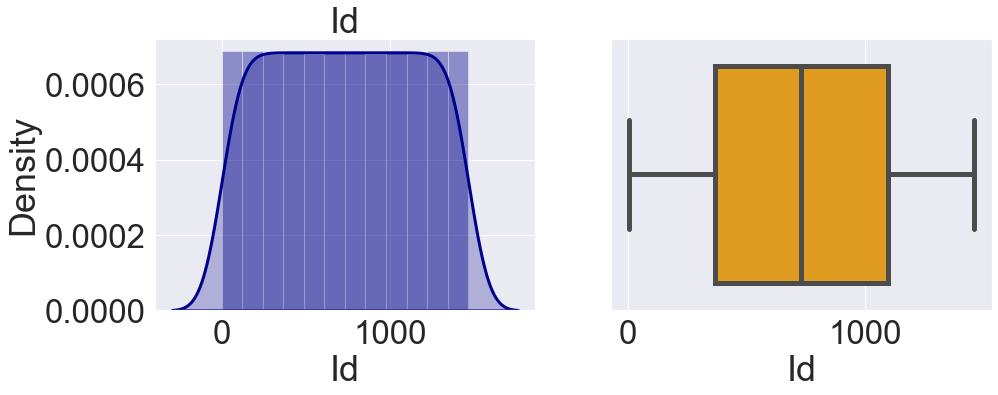

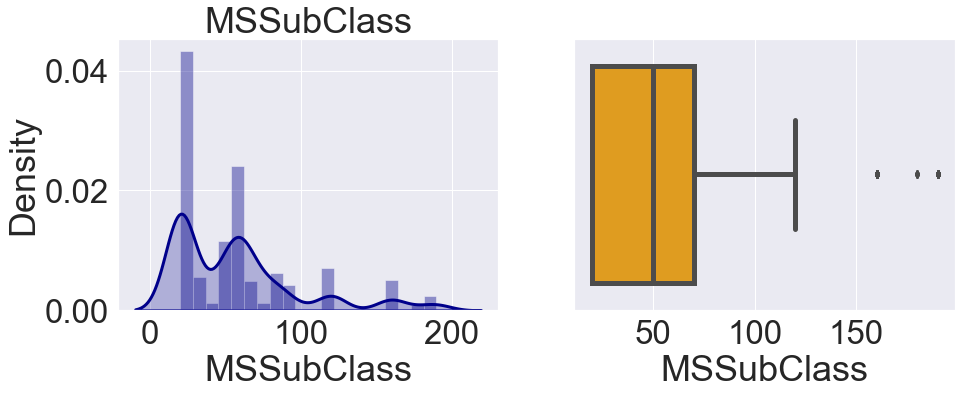

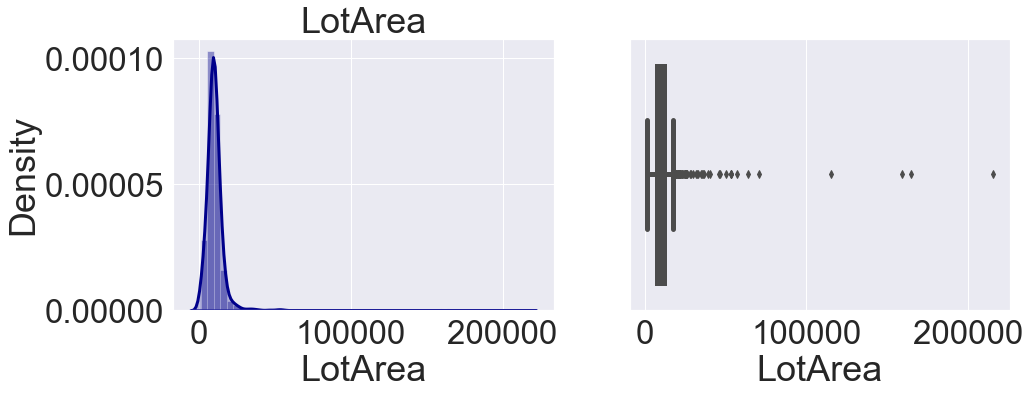

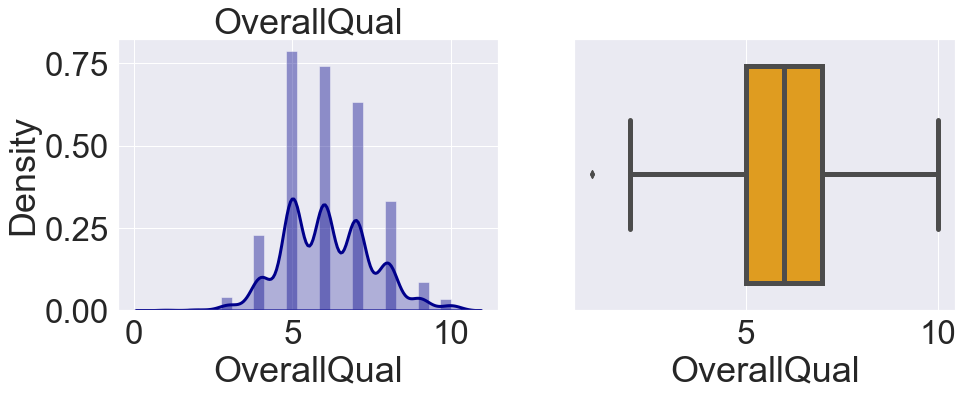

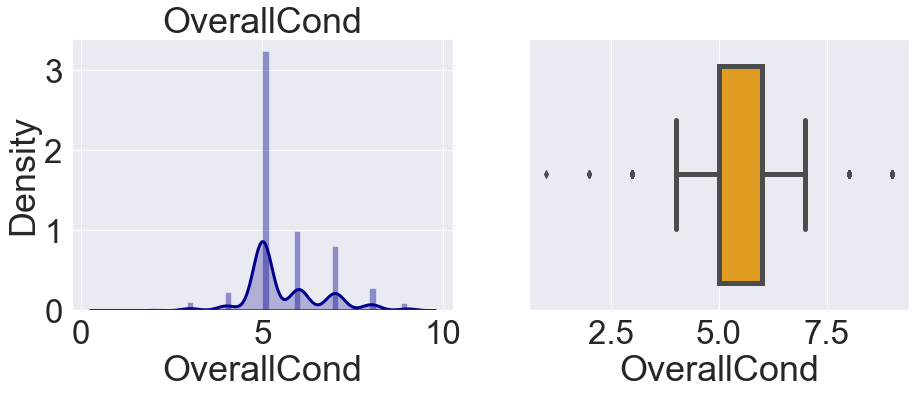

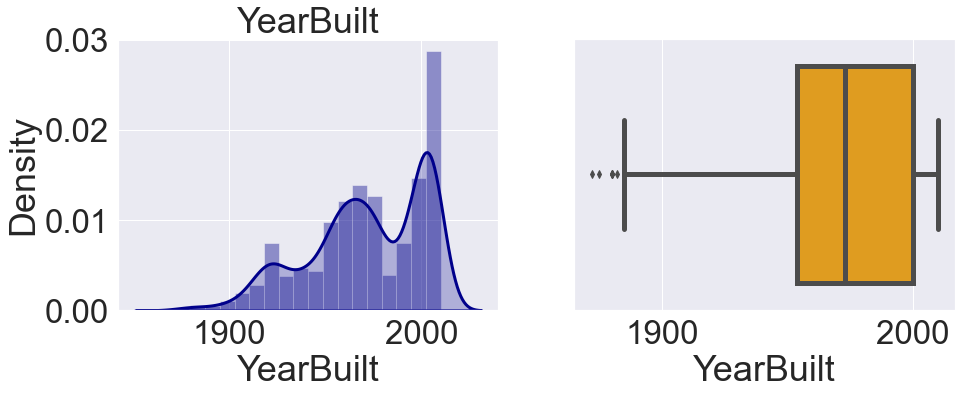

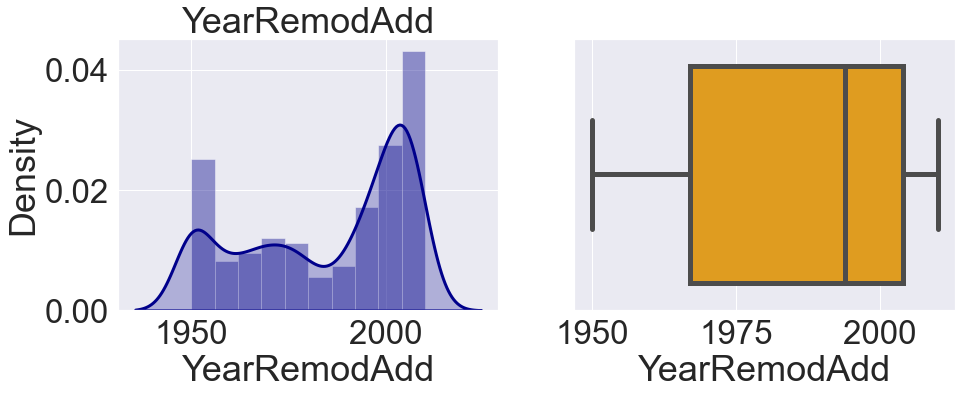

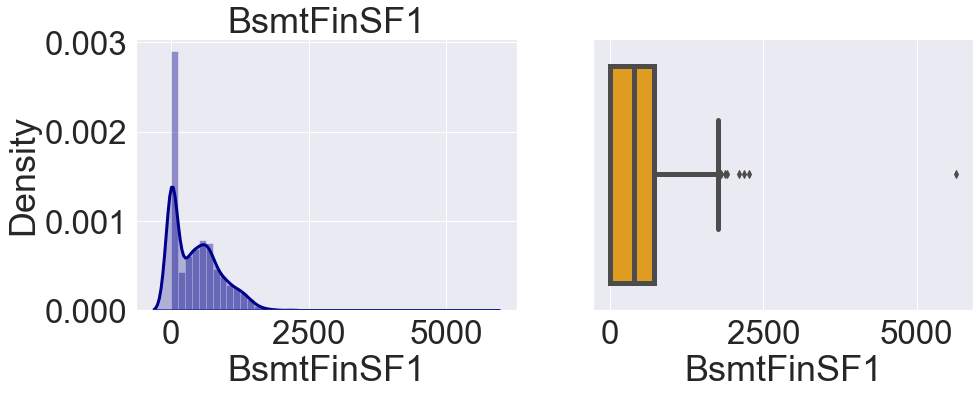

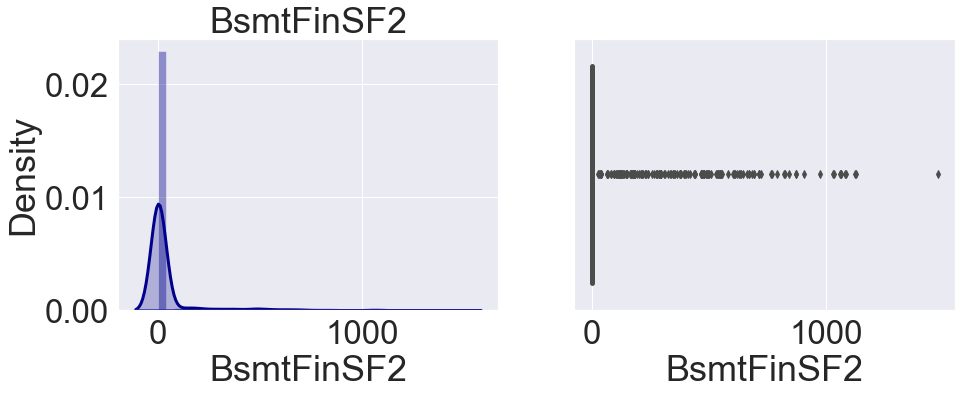

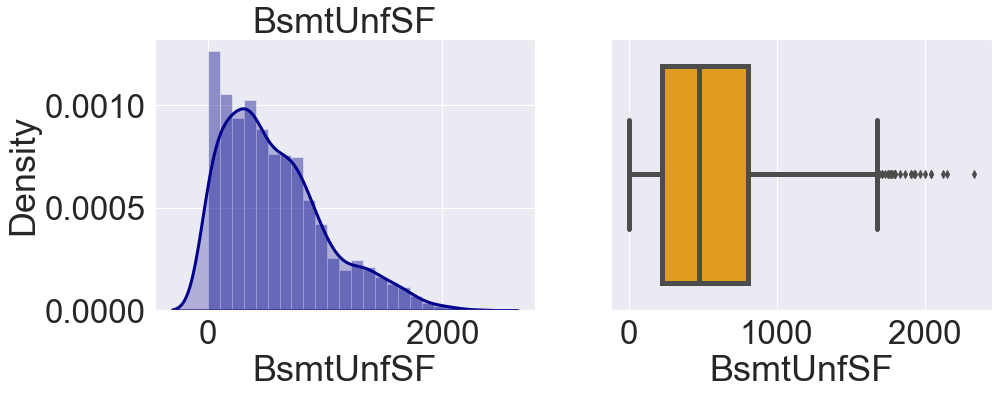

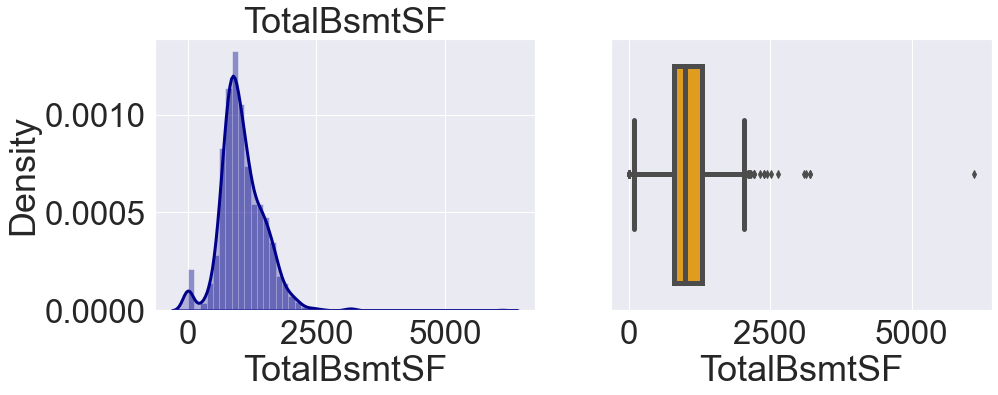

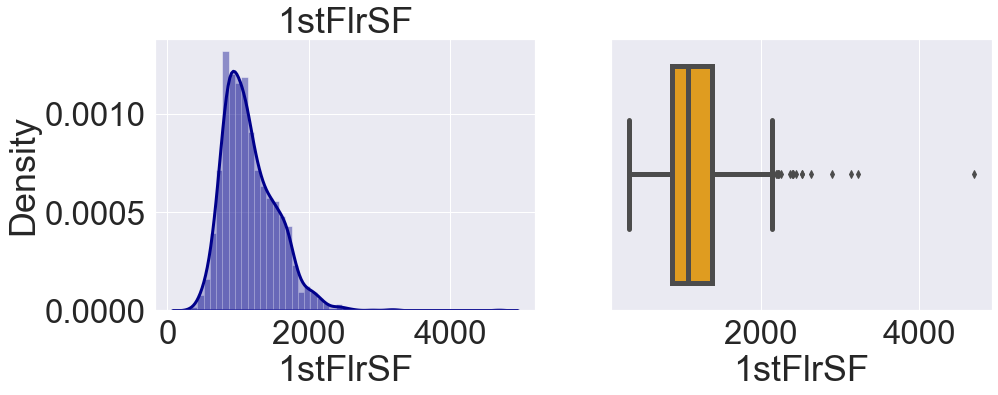

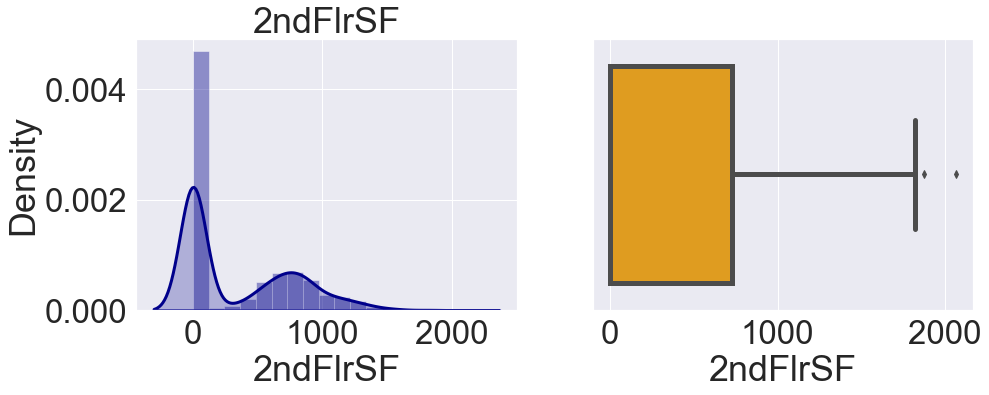

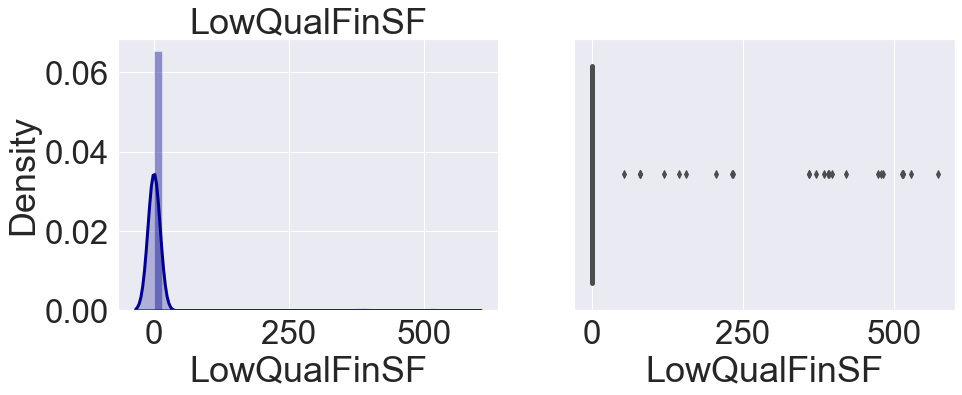

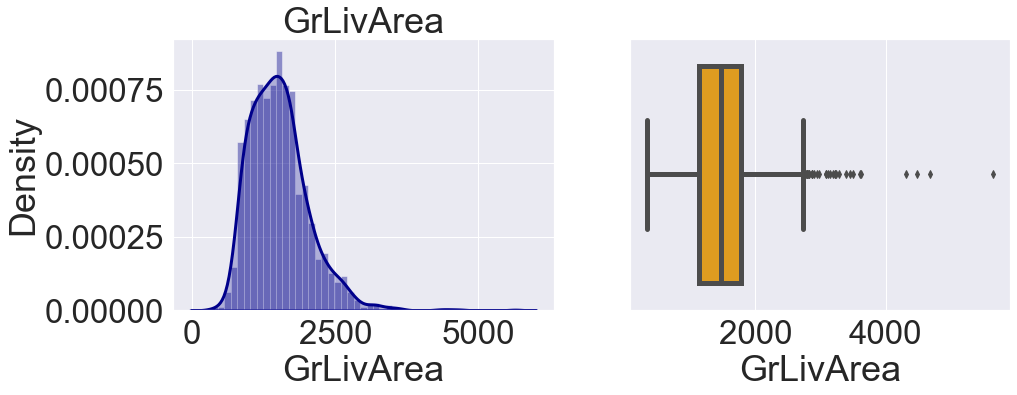

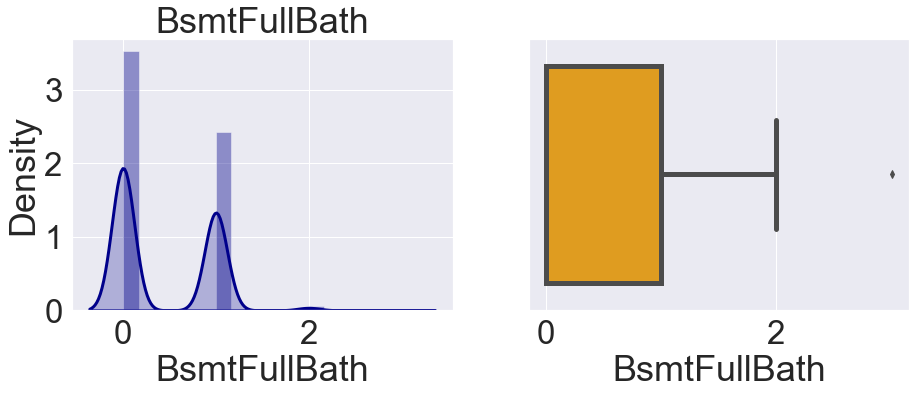

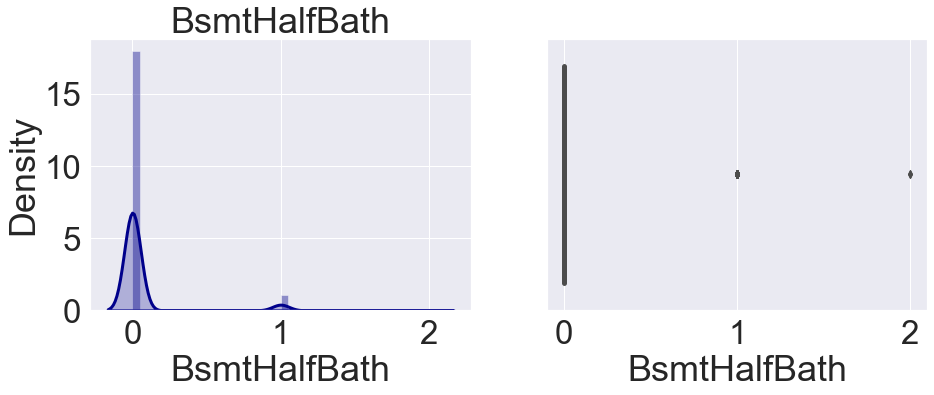

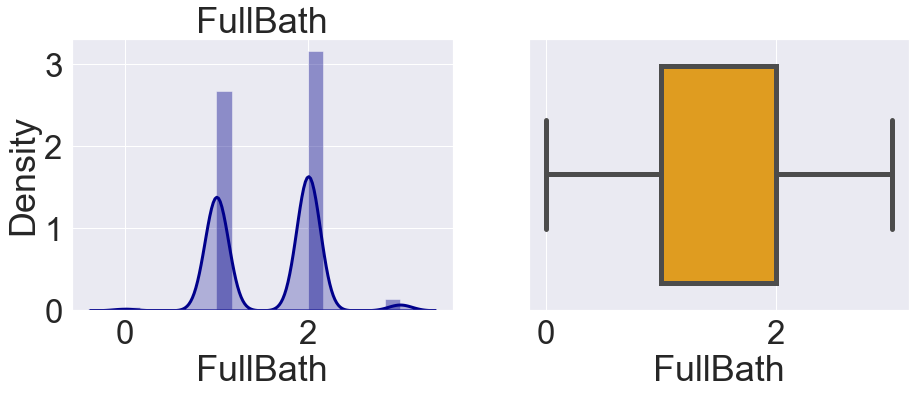

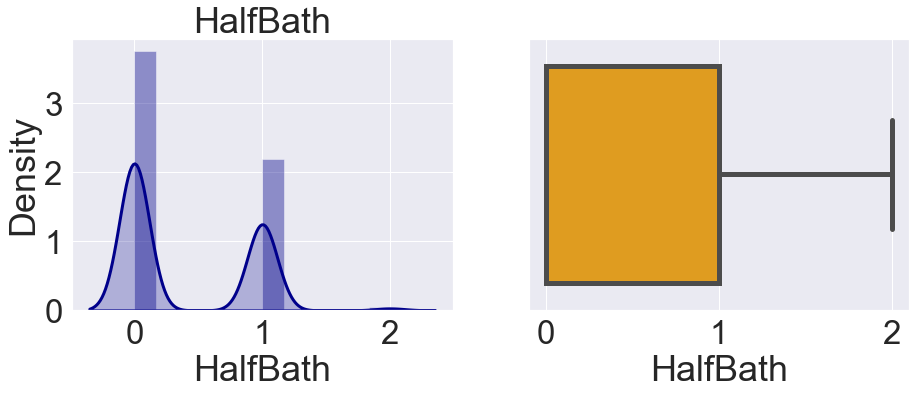

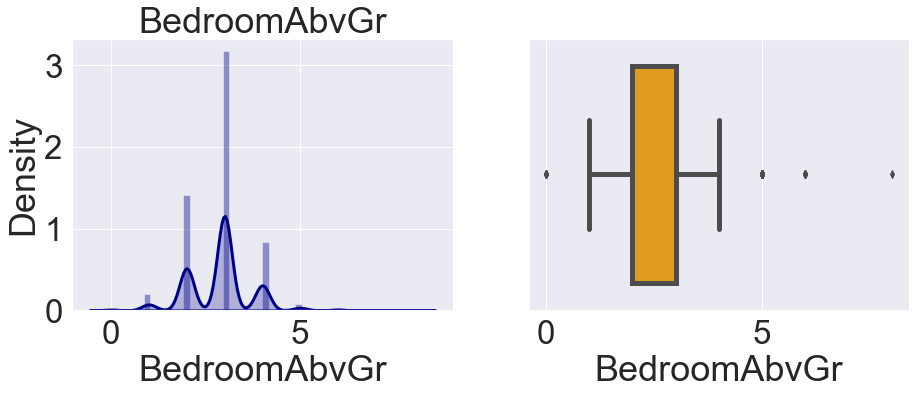

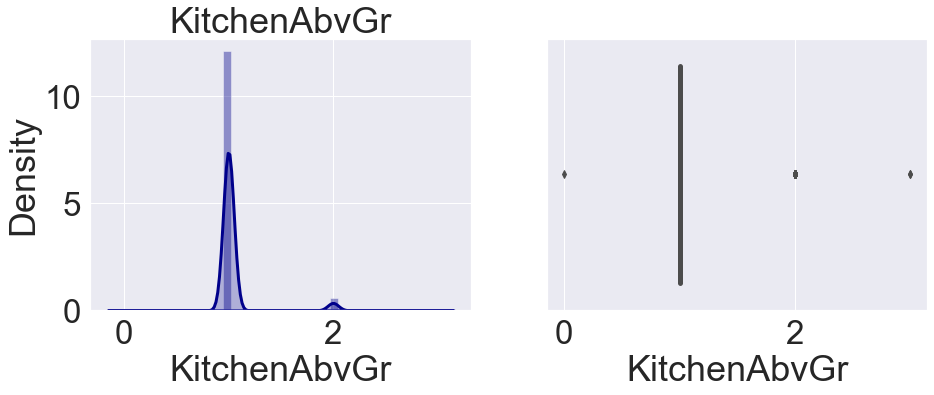

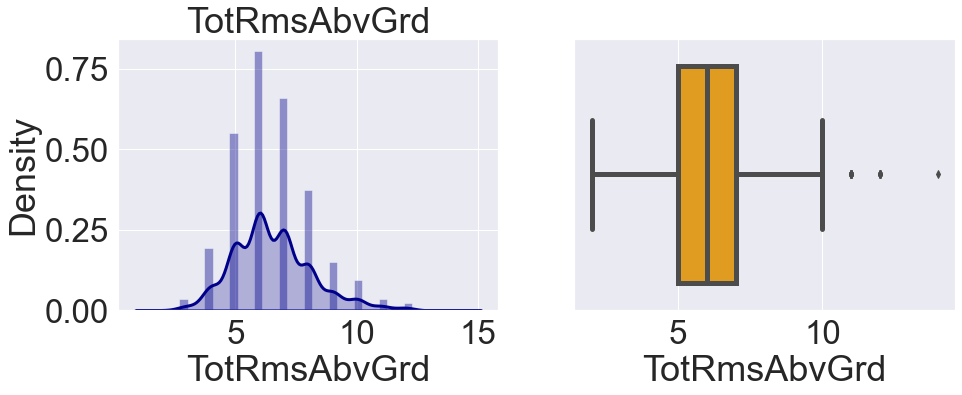

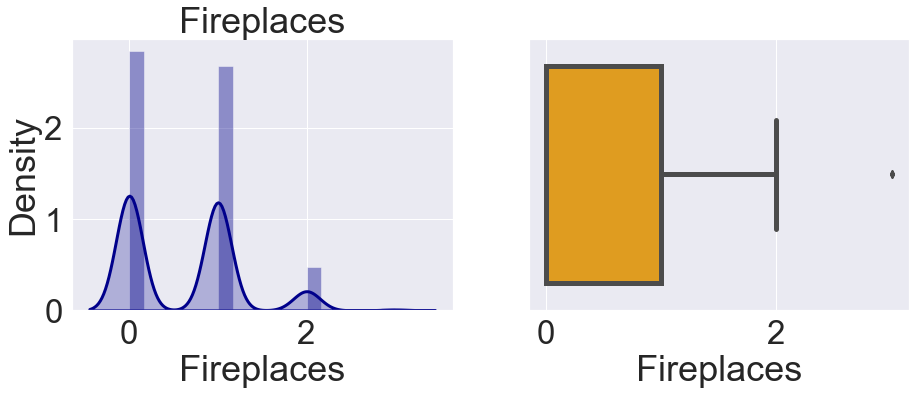

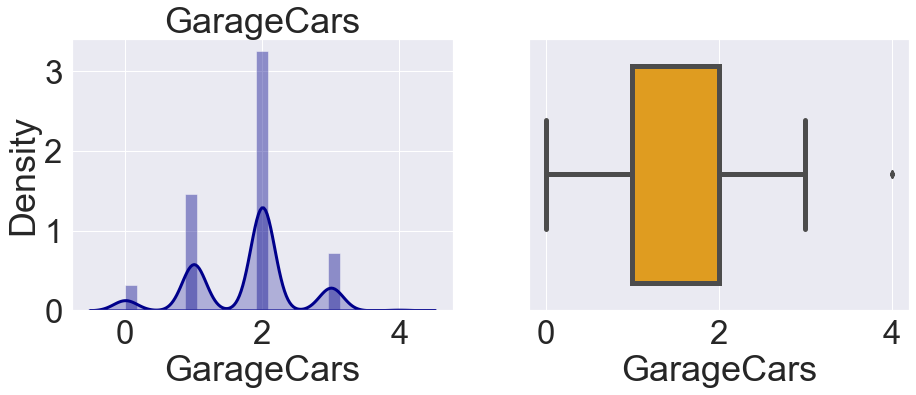

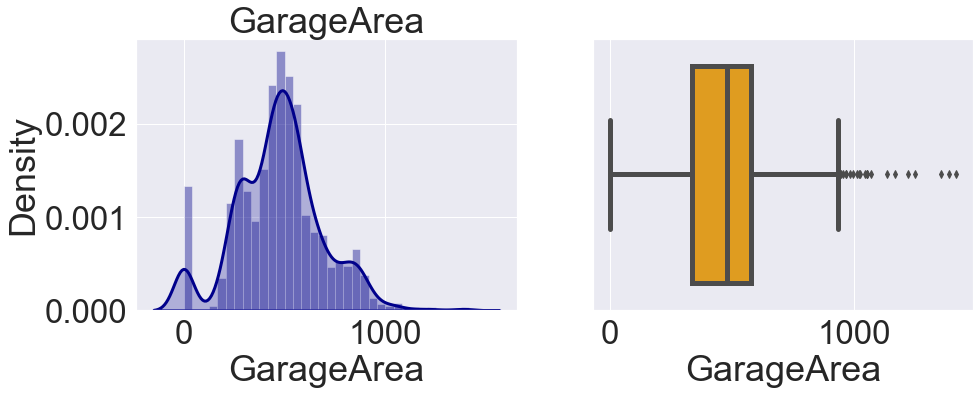

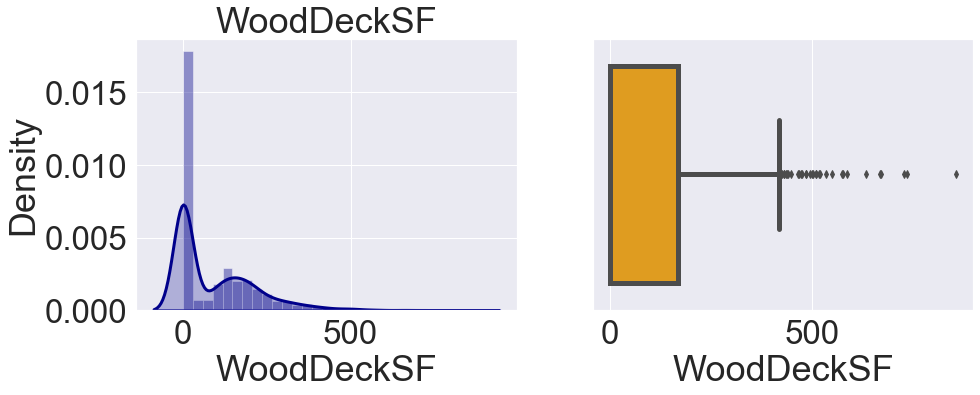

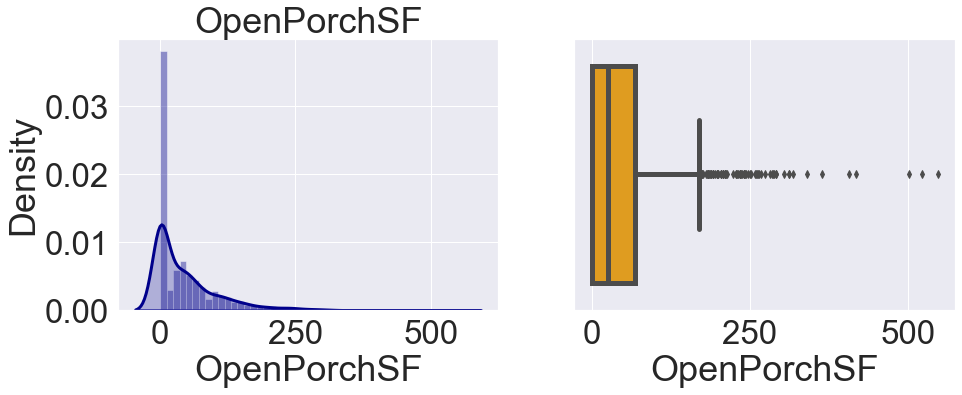

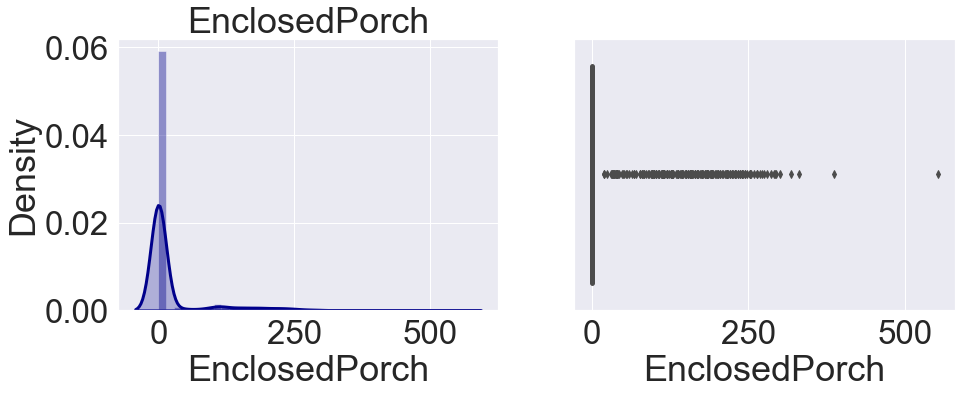

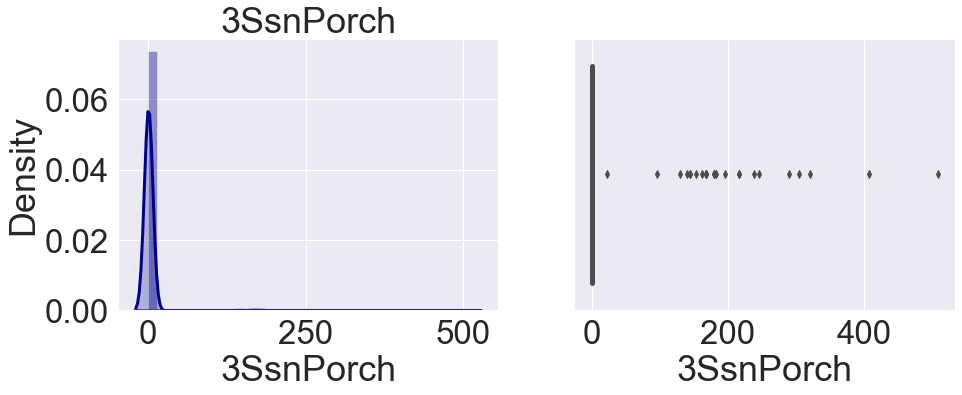

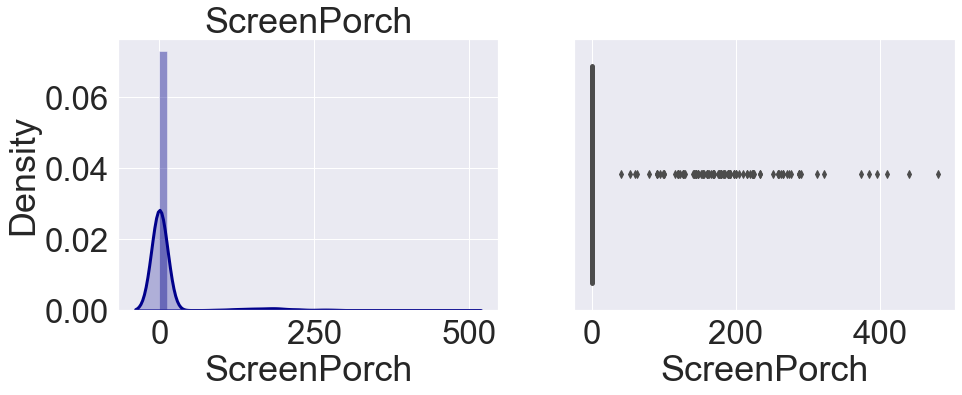

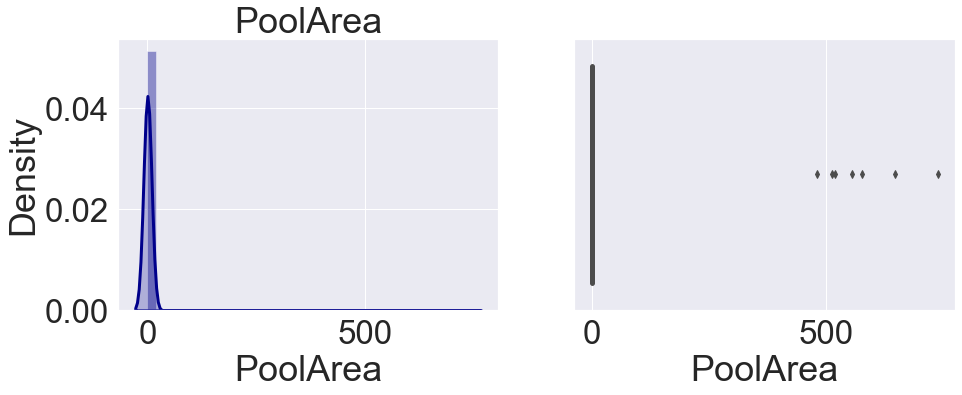

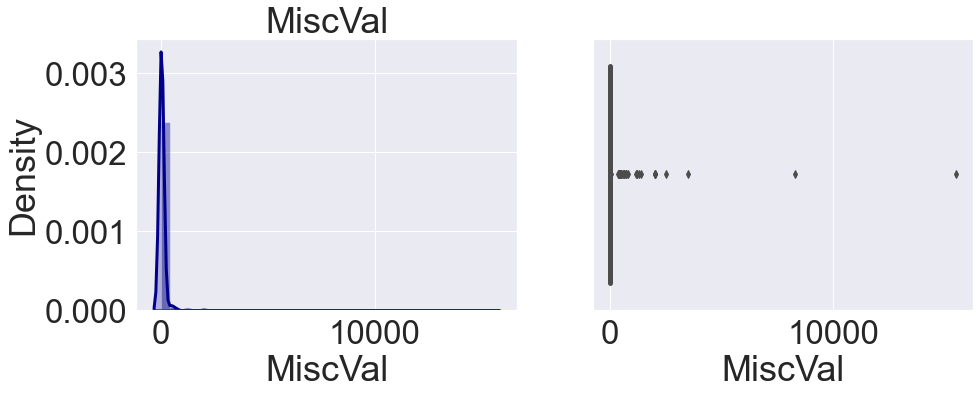

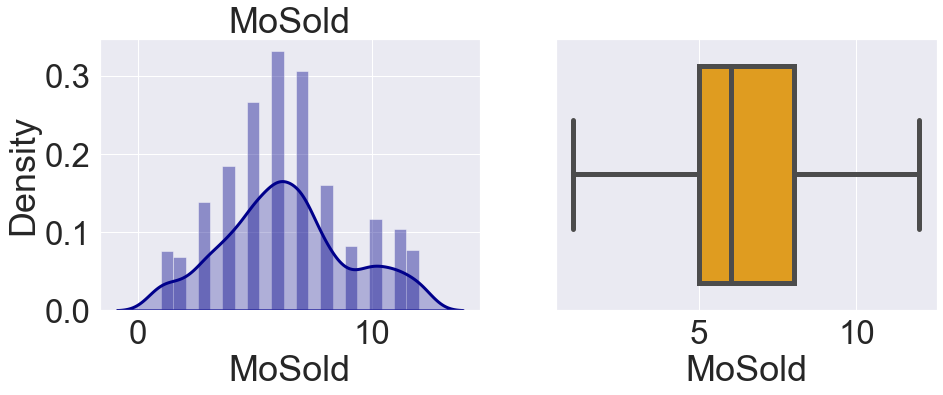

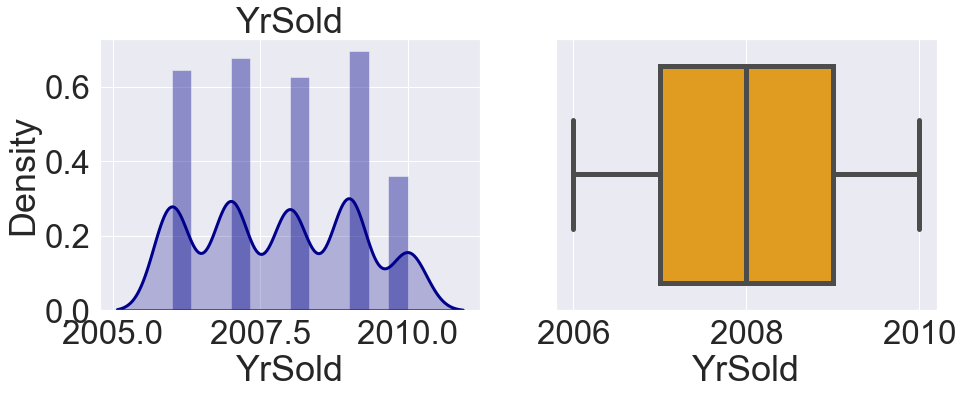

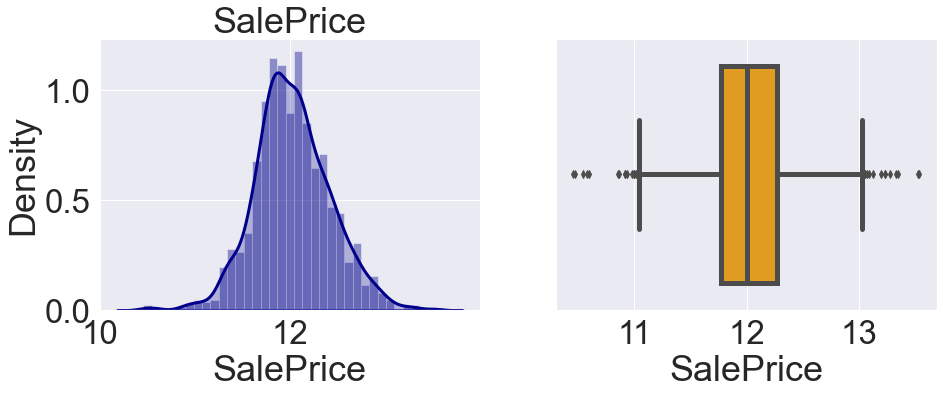

In [143]:
for col in train_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col)
    sns.distplot(train_num[col], hist=True, color='darkblue', kde_kws = {'shade': True, 'linewidth': 3});

    
    plt.subplot(1,2,2)
    sns.boxplot(train_num[col], color='orange', saturation=0.75, linewidth=5);
    plt.show() 

<font color = blue>Many / all Numerical variables are not normally distributed. <br><br>Hence, need to apply Scaling Techniques / Normalization techniques / others to bring certain harmony among the numerical values in the data set. As per above, this is required here as part of Data Preparation activity. 
<font color = blue><br><br>
As per above, also required to treat outliers.
<br>
<hr width="100%" size=100>

<font color=blue size=3><b> Now, analyze all the <u>CATEGORICAL attributes</u> from train_cat set by creating visualizations {bar plots as these are categorical} as needed.

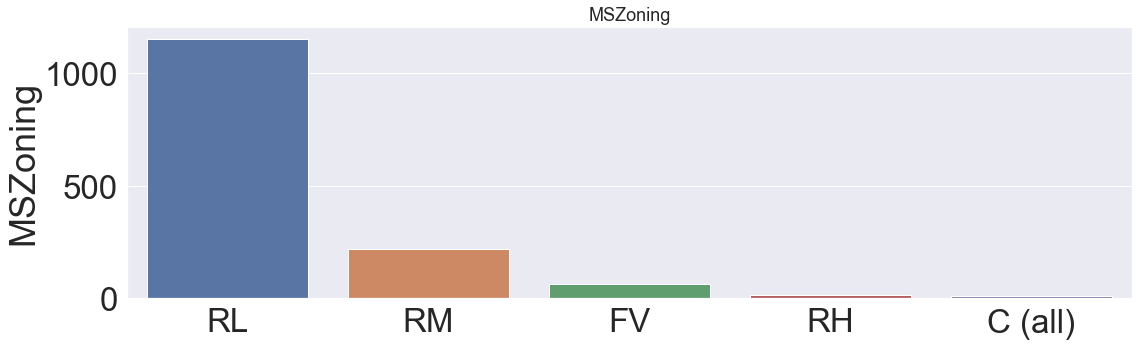

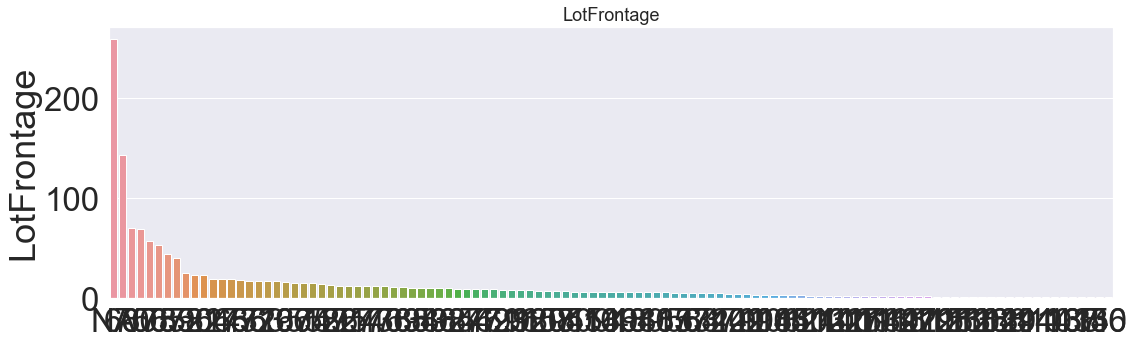

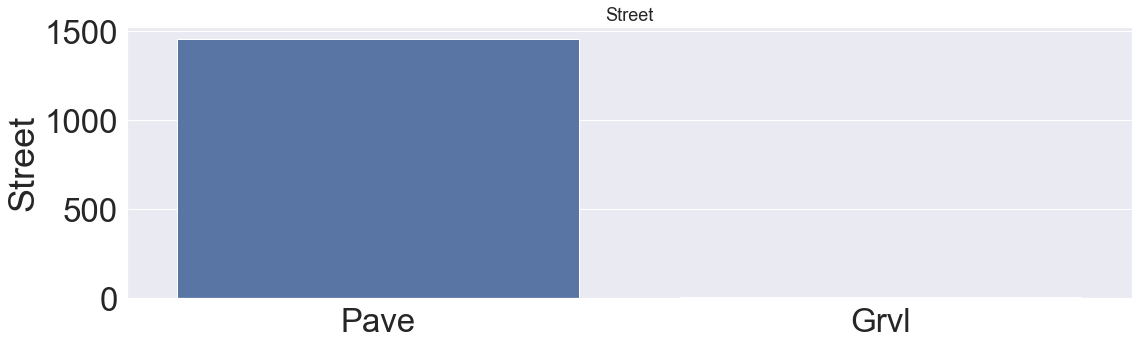

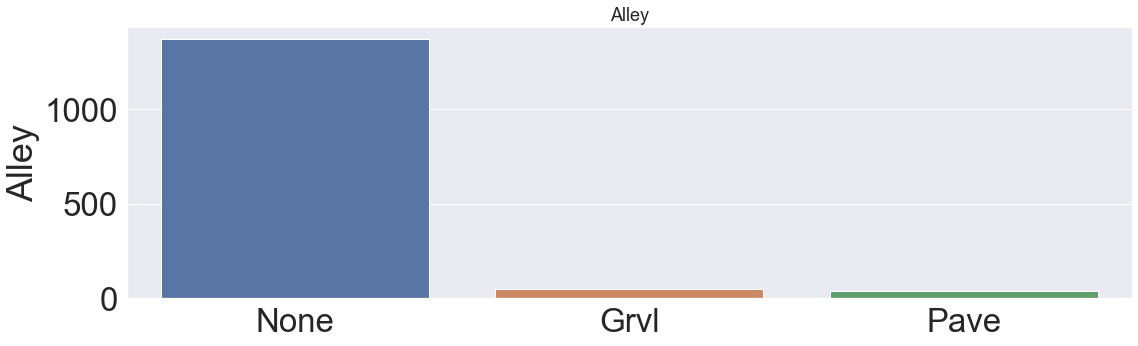

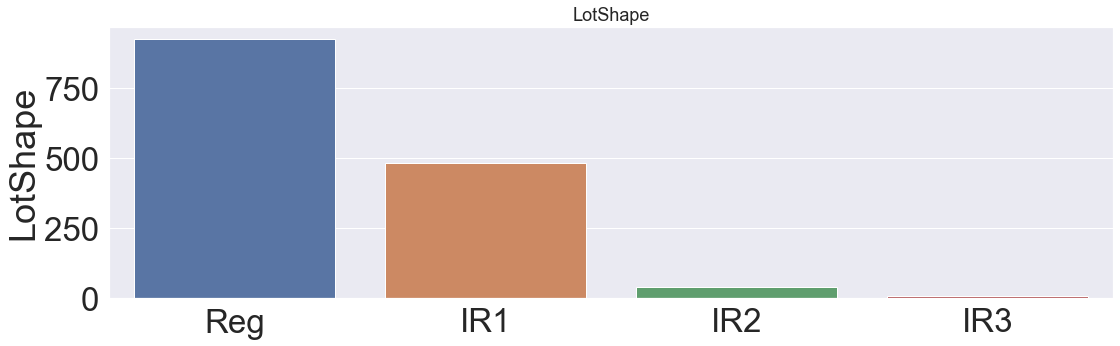

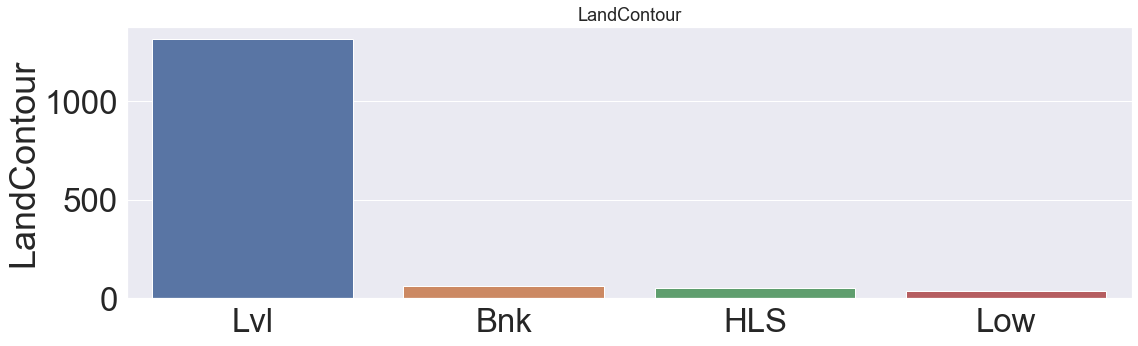

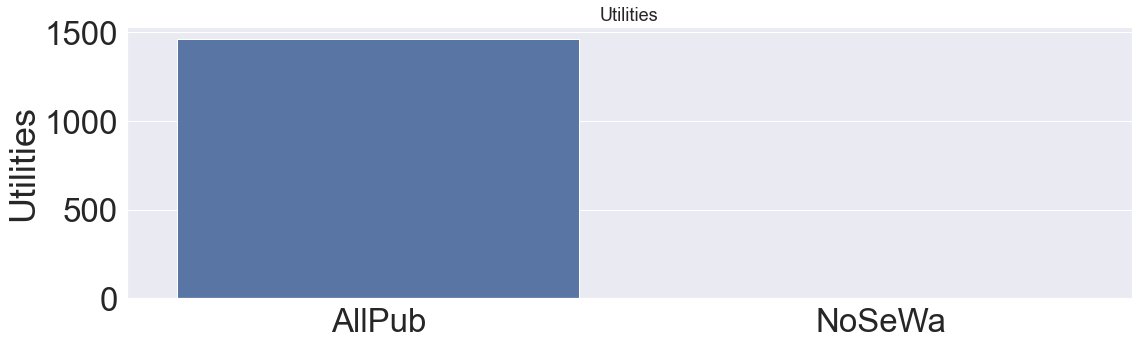

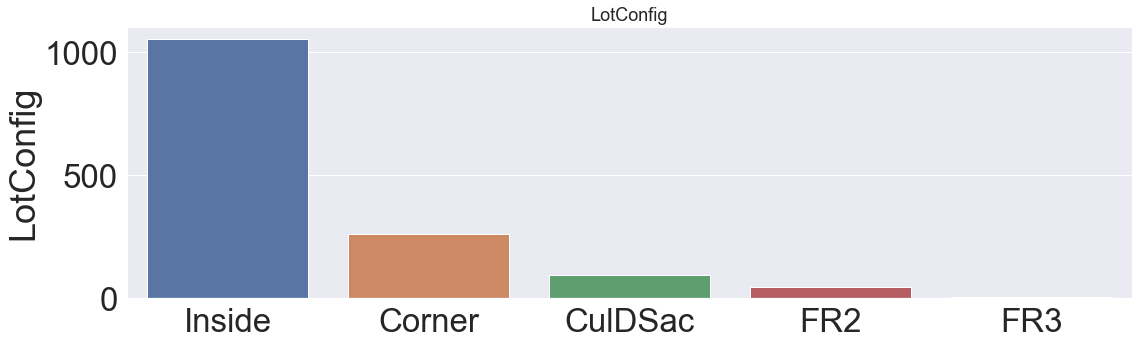

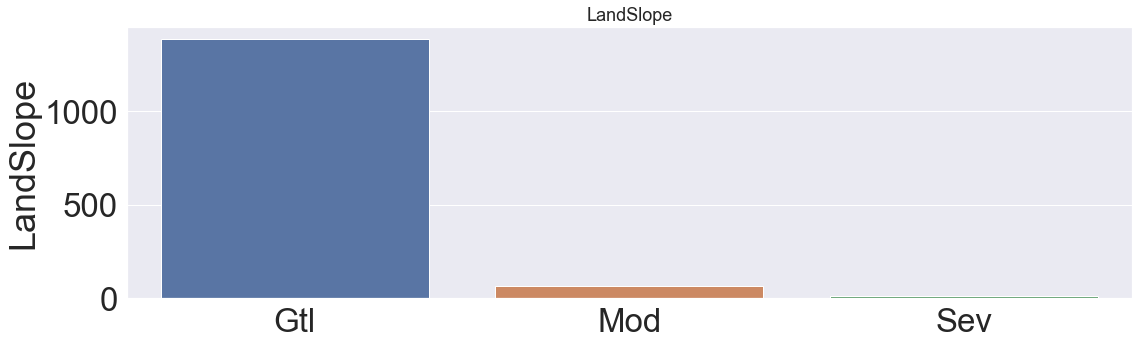

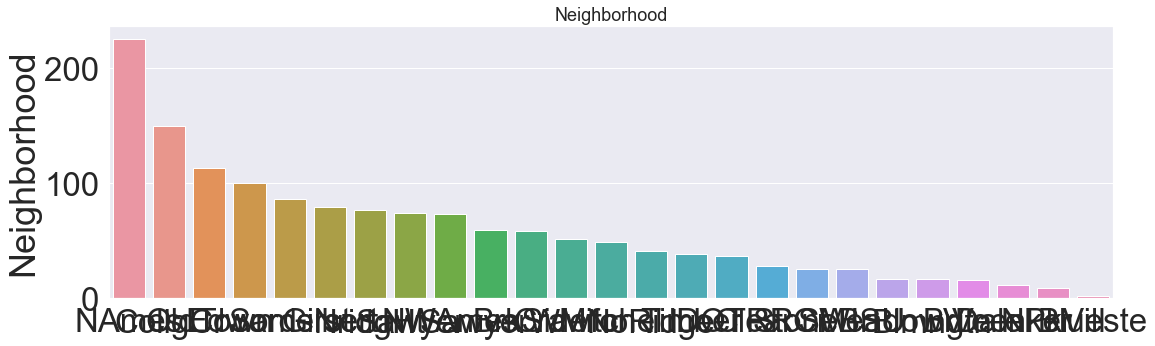

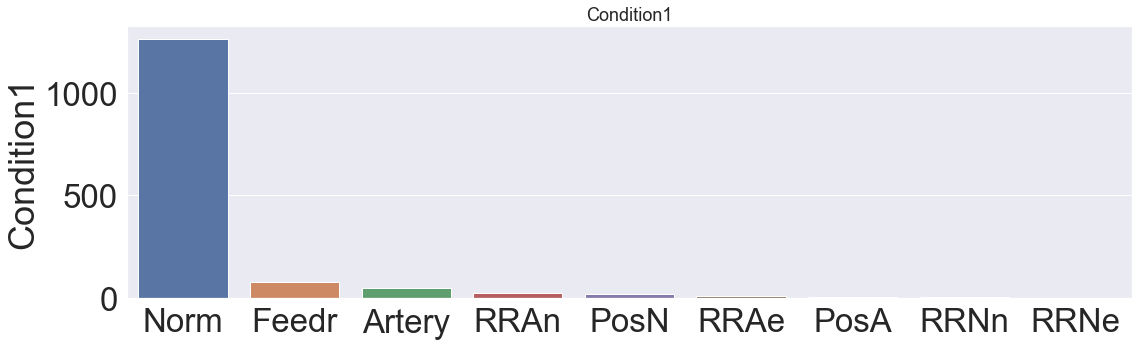

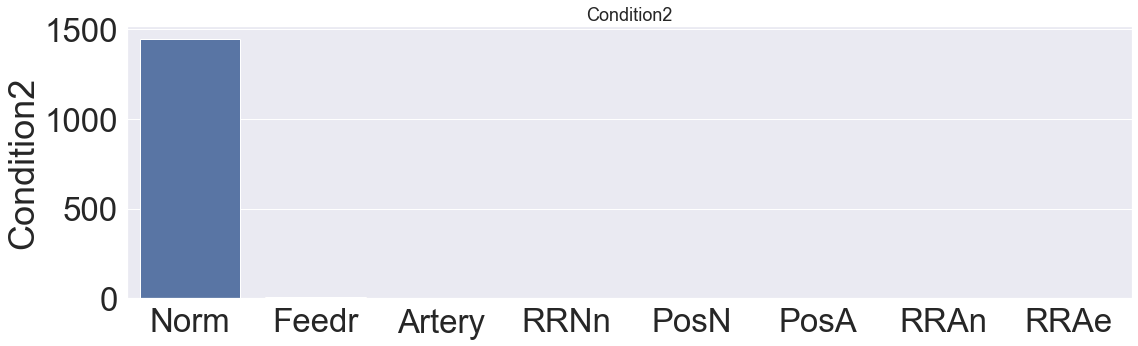

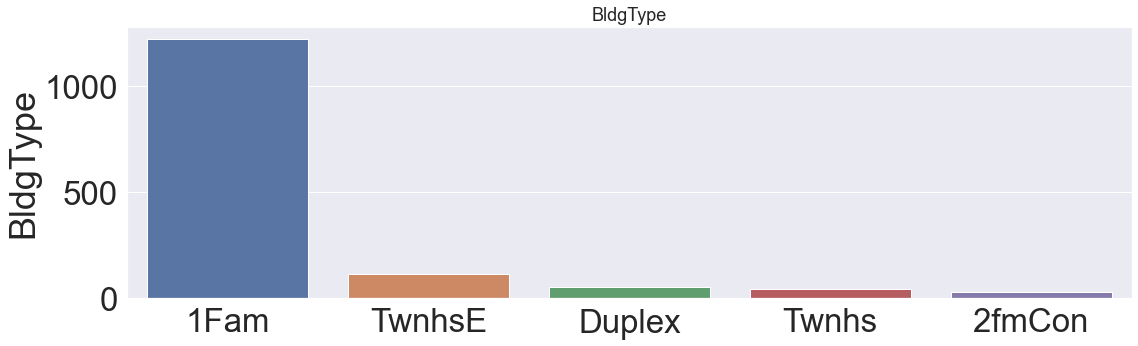

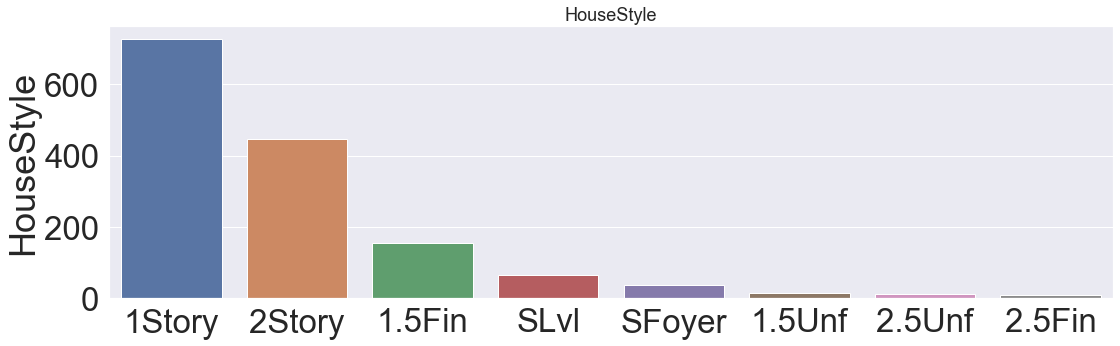

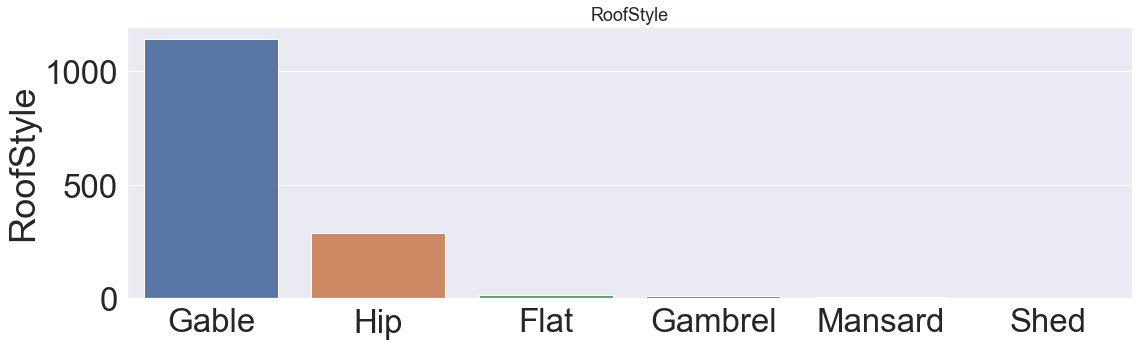

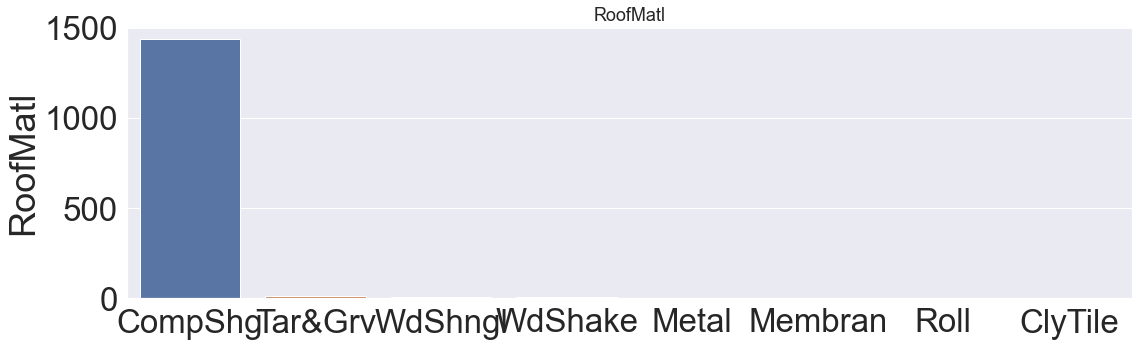

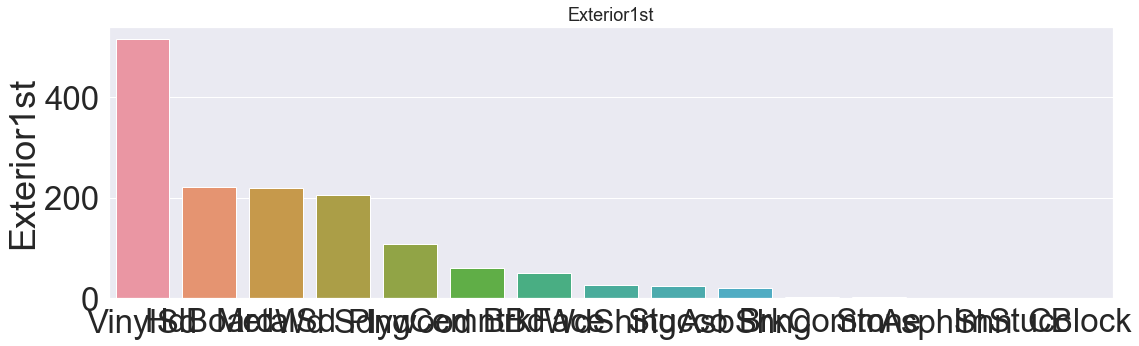

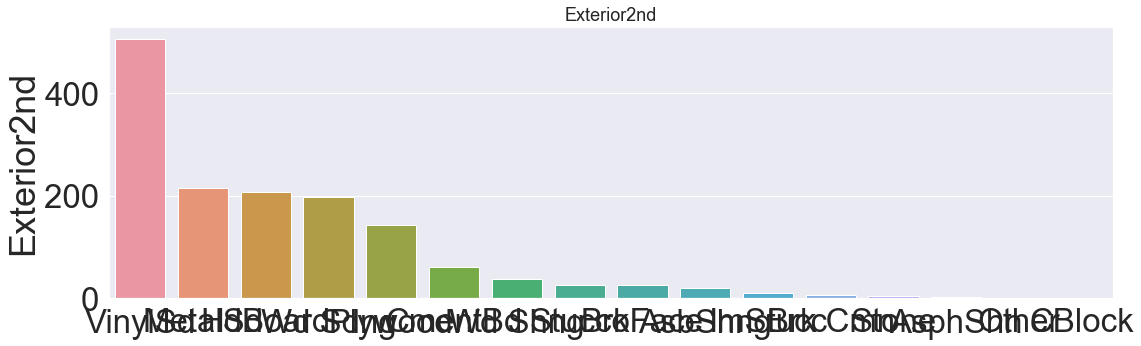

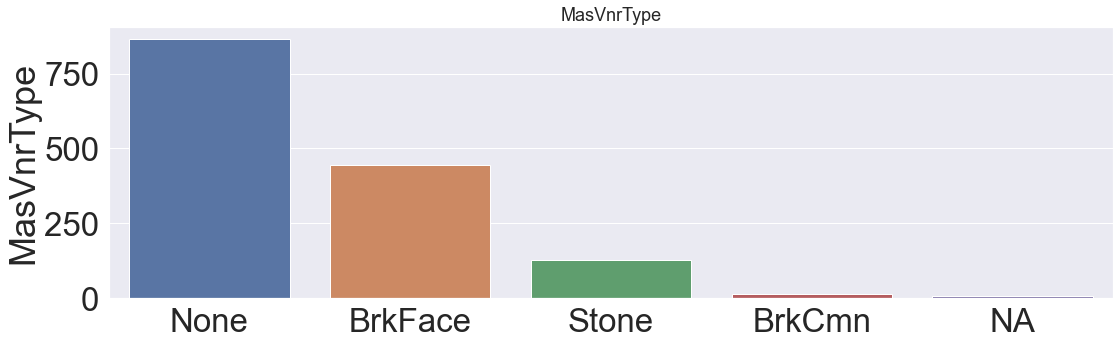

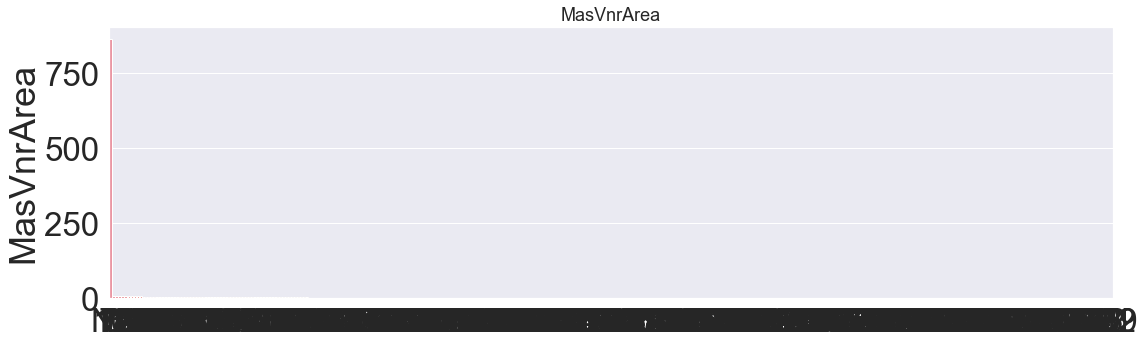

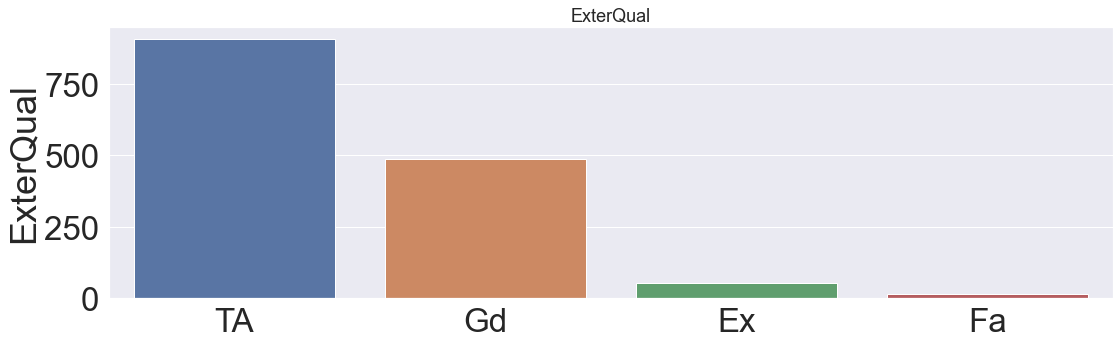

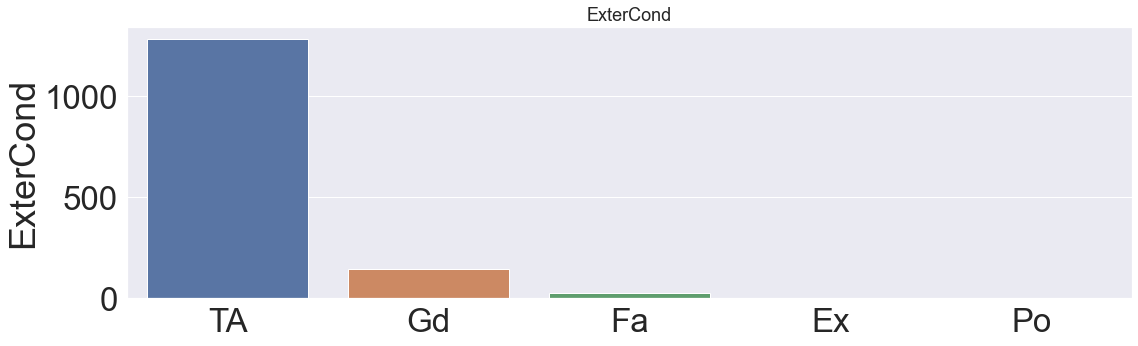

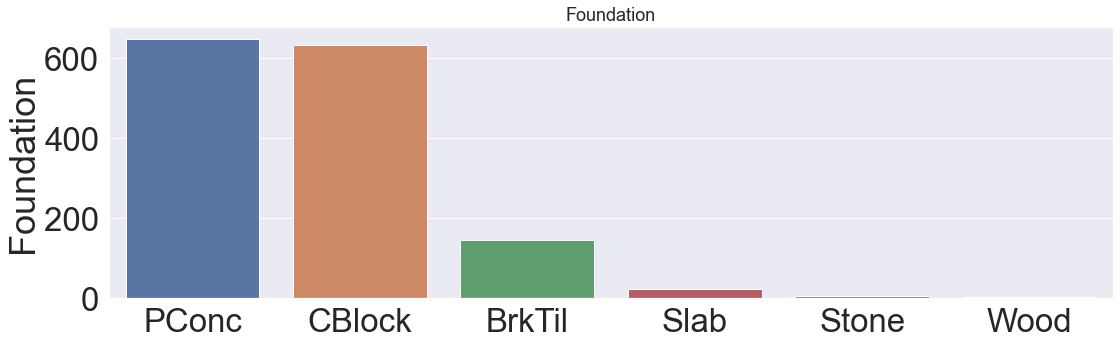

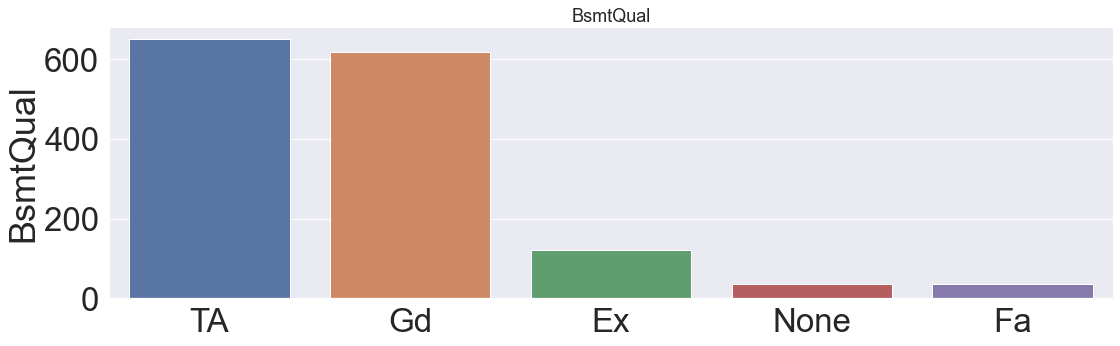

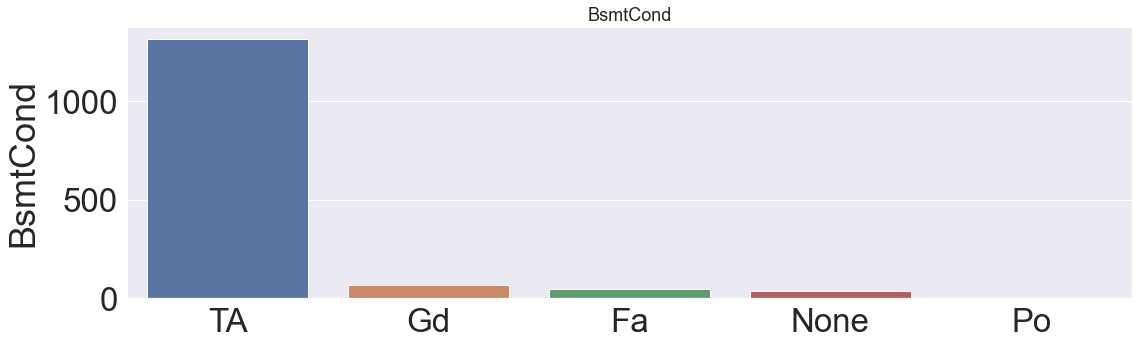

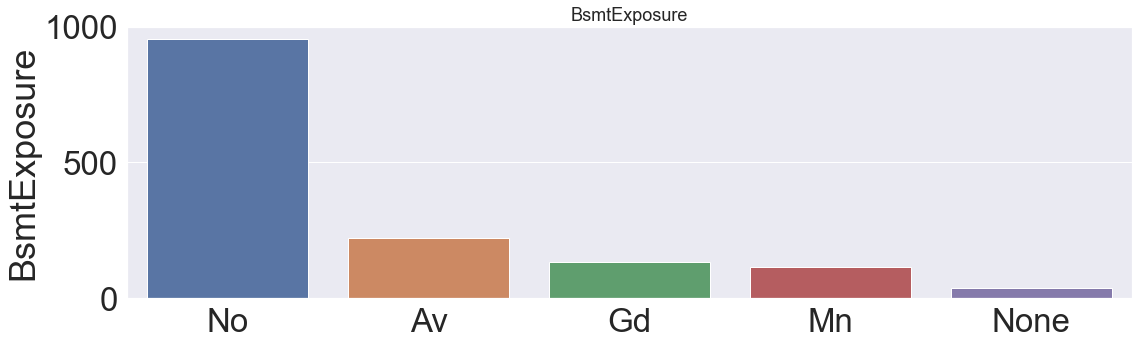

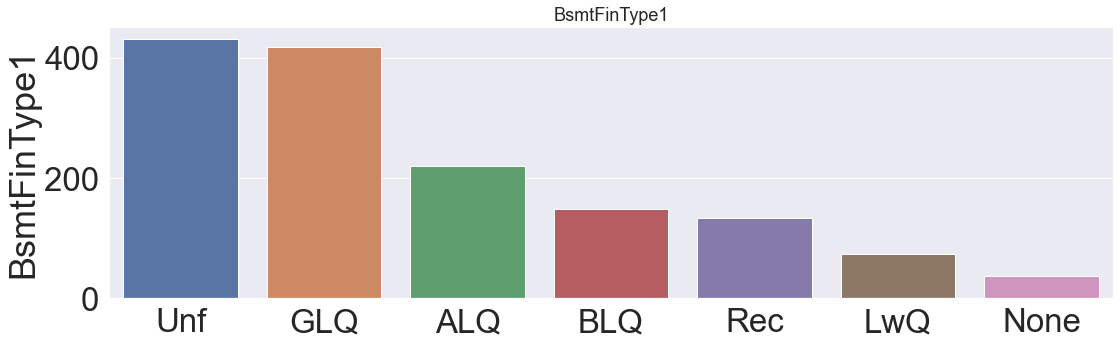

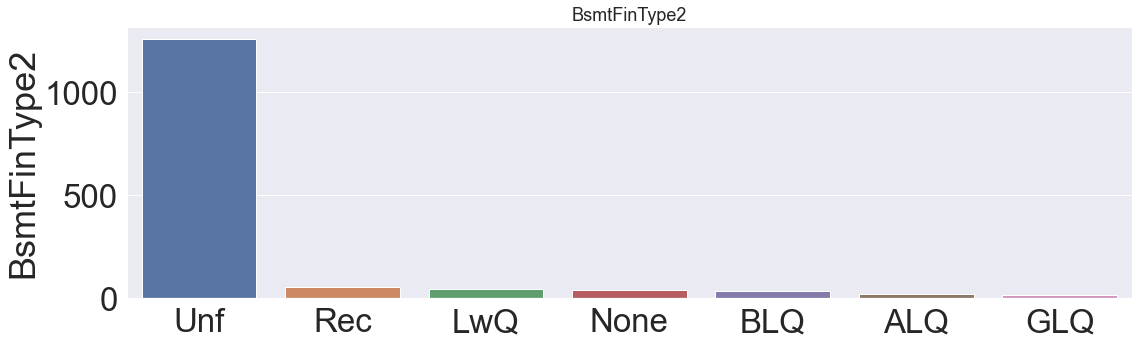

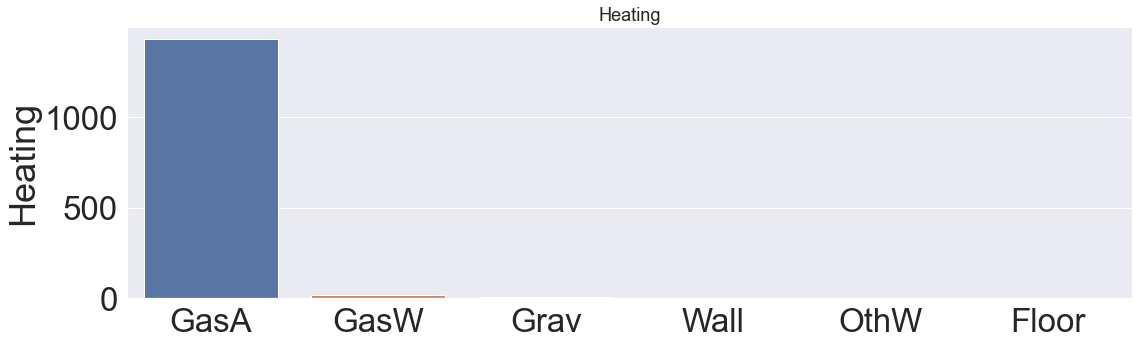

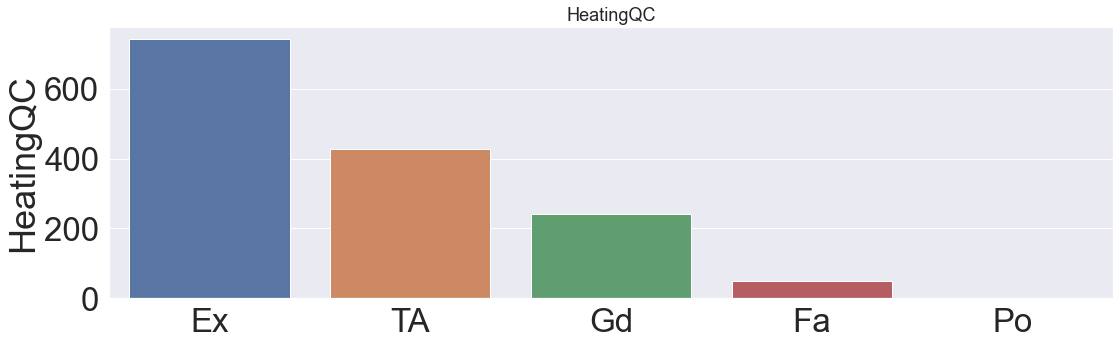

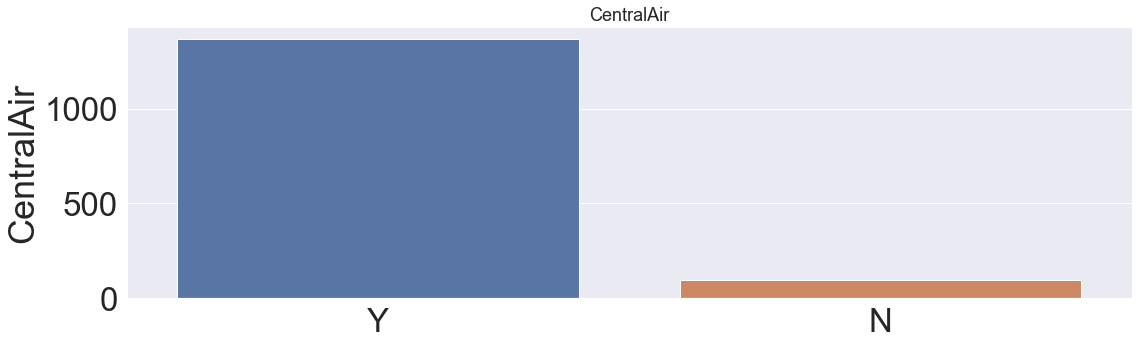

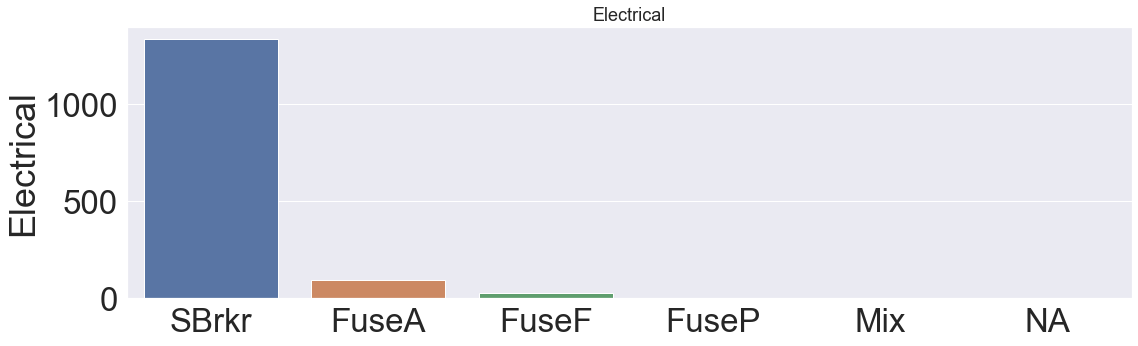

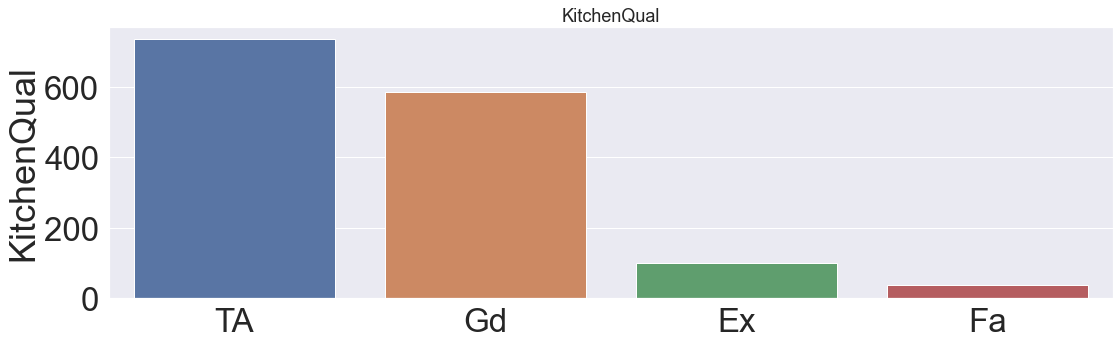

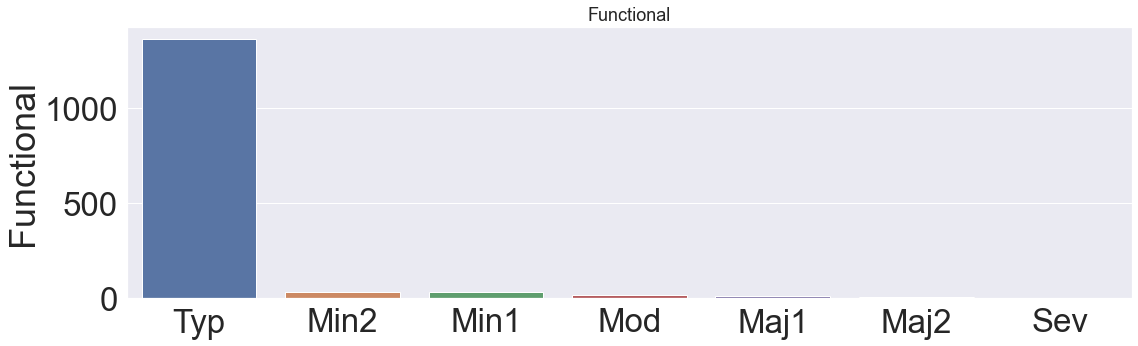

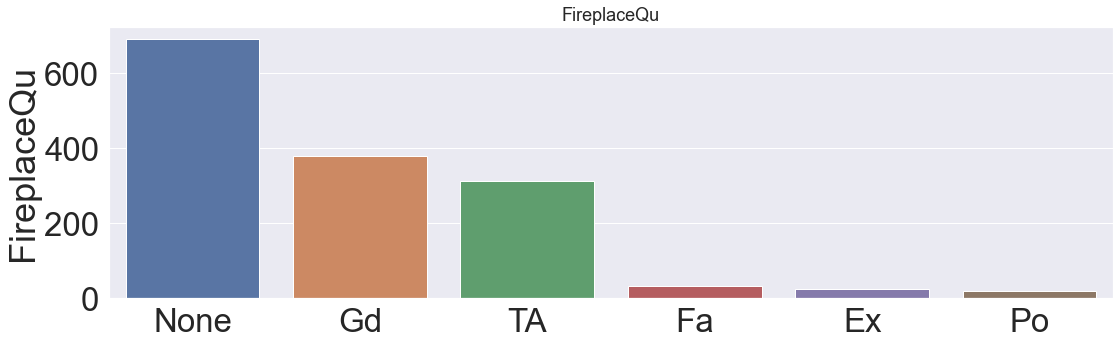

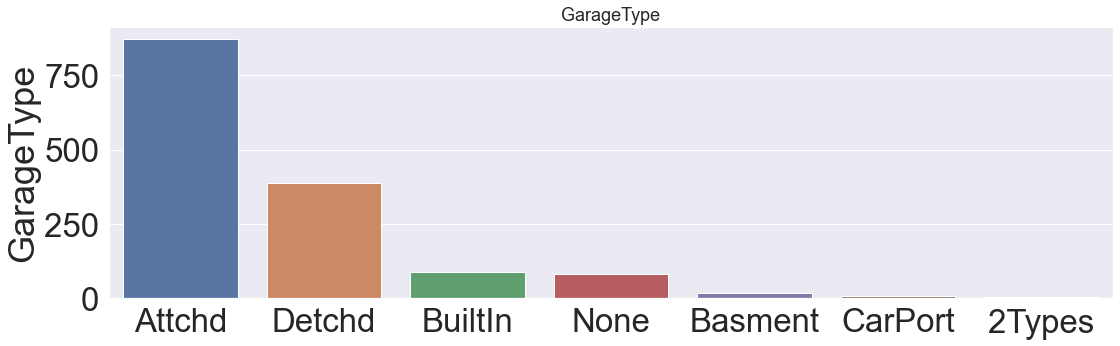

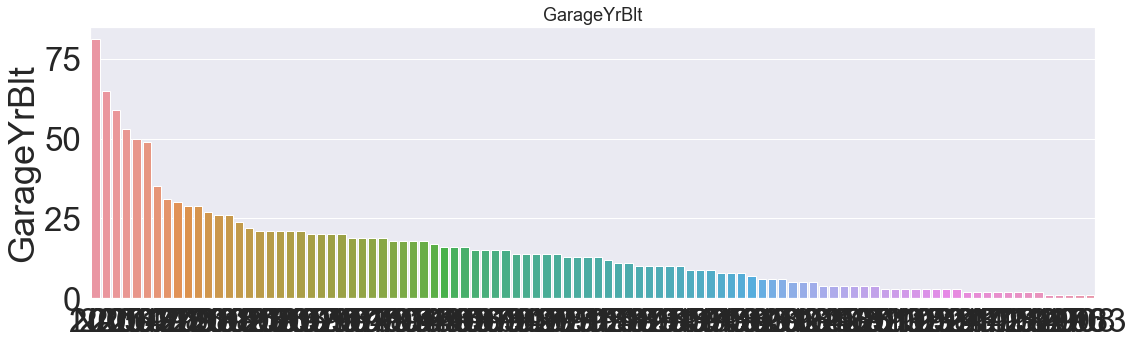

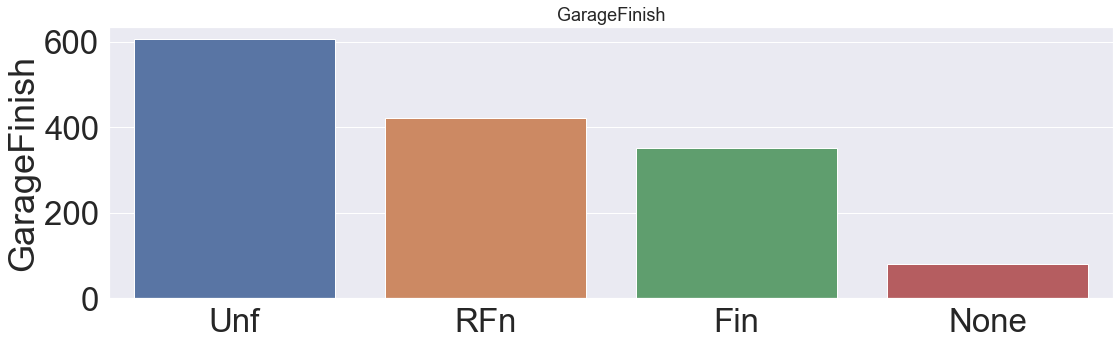

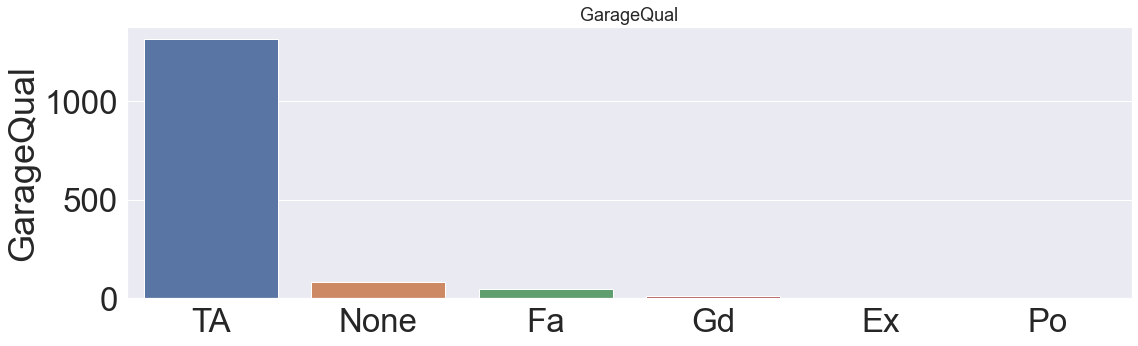

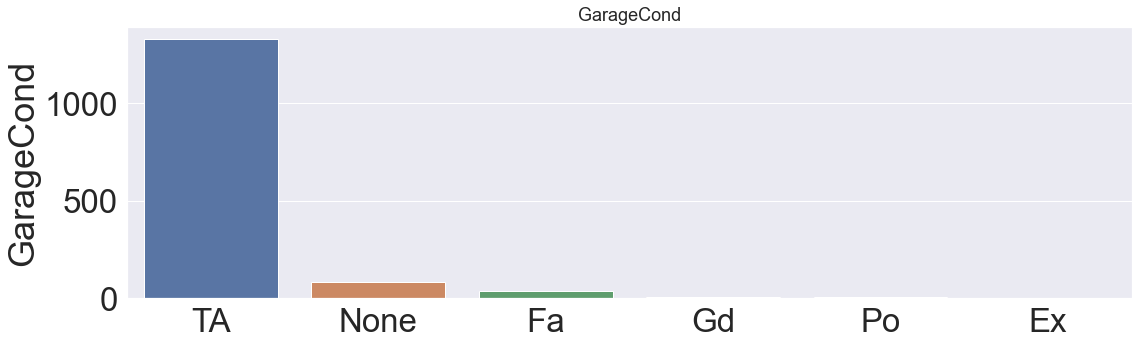

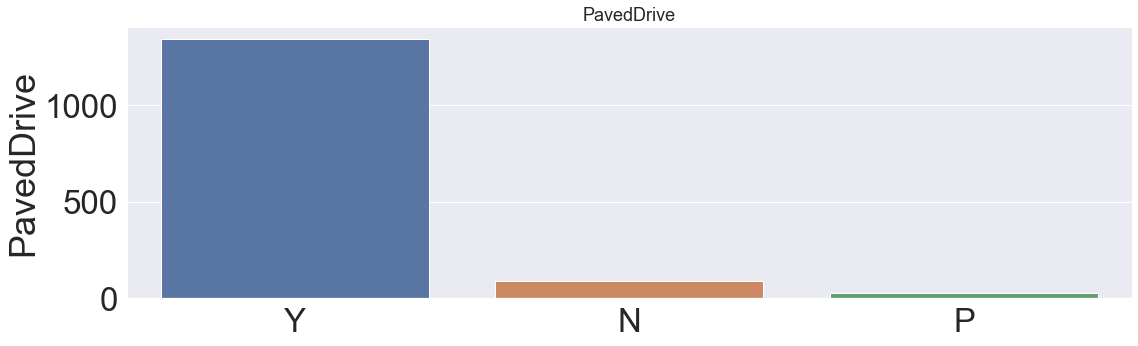

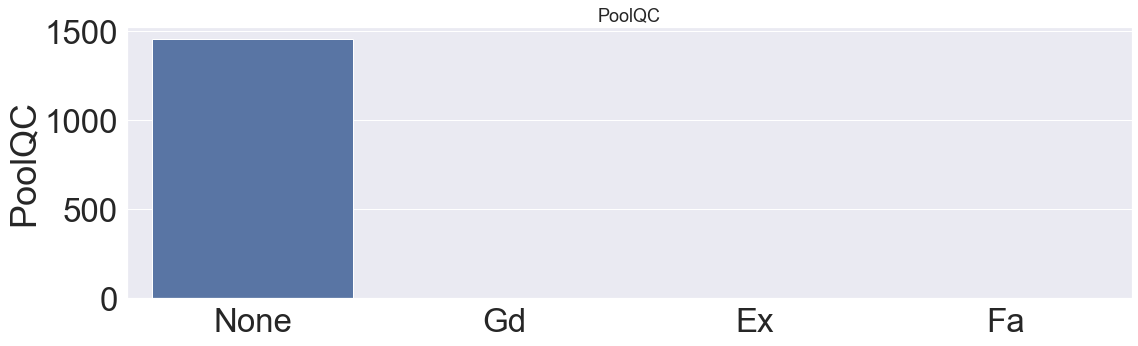

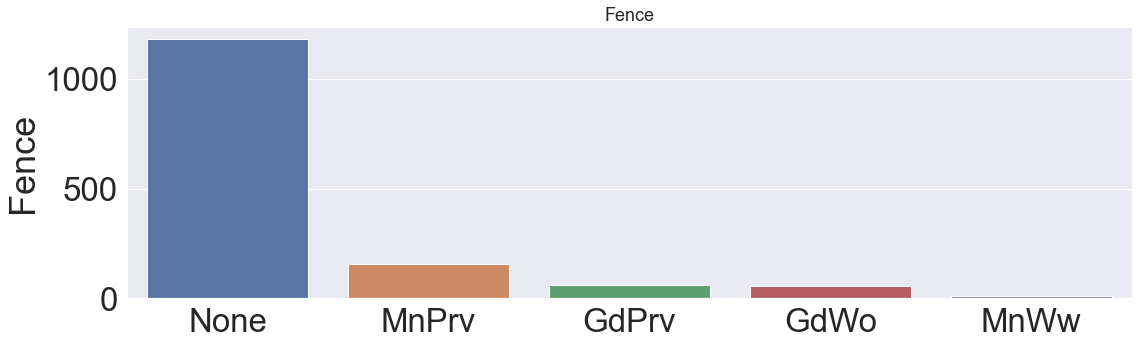

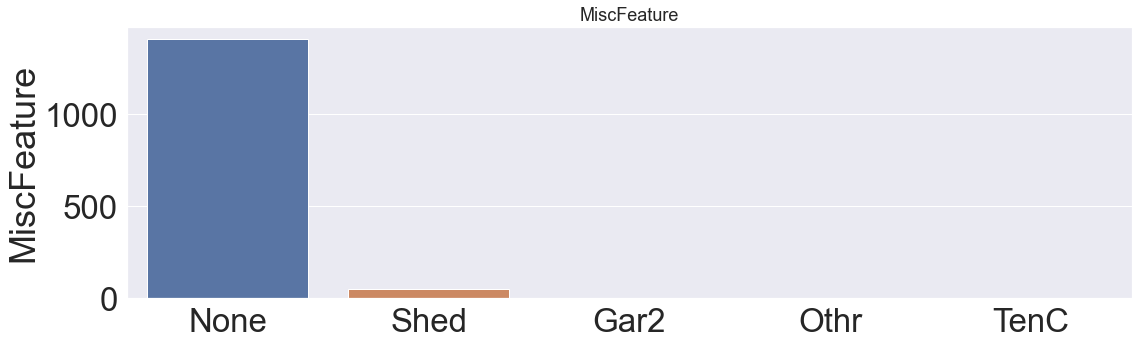

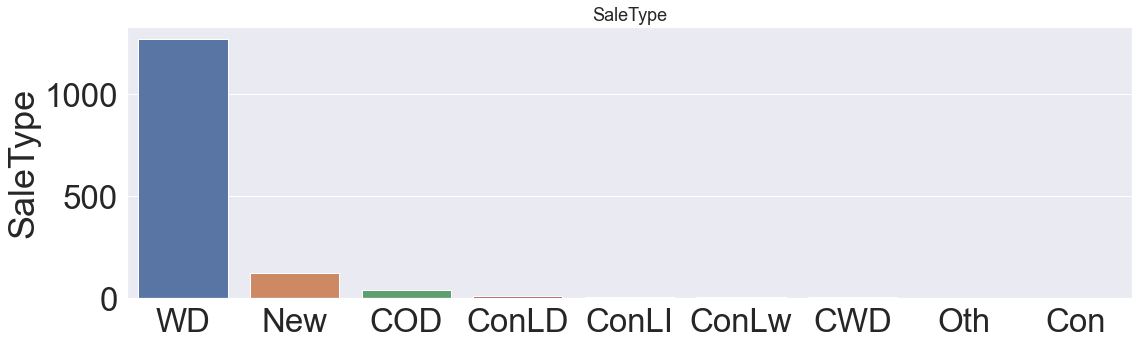

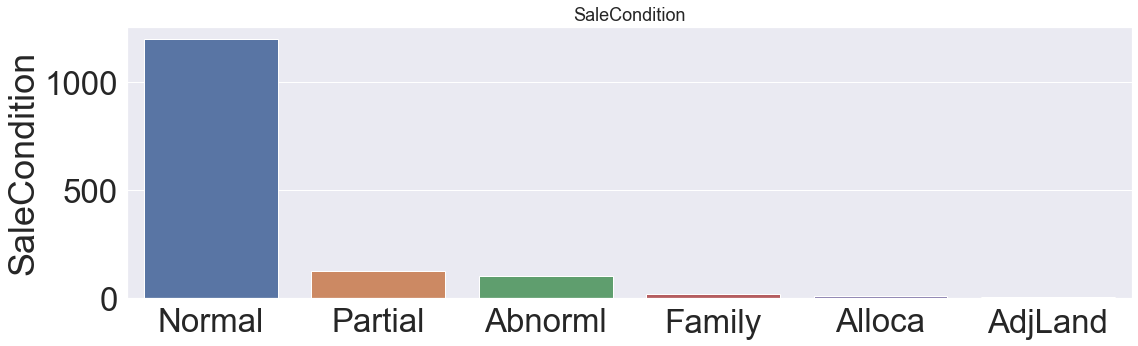

In [153]:
for col in train_cat.columns:
    plt.figure(figsize=(18,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(train_cat[col].value_counts().index, train_cat[col].value_counts())
    plt.show()

### <font color=blue>Seems there are no "single" valued enumeration of any of the CATEGORICAL variables in train_cat. Hence, we can't remove any of these attributes.

In [167]:
# Display count of unique values of each categorical variable's enumeration in sort ascending order 

train_cat.nunique().sort_values(ascending=True)

CentralAir         2
Street             2
Utilities          2
LandSlope          3
PavedDrive         3
Alley              3
LandContour        4
ExterQual          4
PoolQC             4
KitchenQual        4
LotShape           4
GarageFinish       4
BsmtQual           5
MasVnrType         5
BsmtCond           5
HeatingQC          5
BldgType           5
ExterCond          5
Fence              5
MiscFeature        5
LotConfig          5
BsmtExposure       5
MSZoning           5
GarageCond         6
FireplaceQu        6
GarageQual         6
Electrical         6
Heating            6
Foundation         6
SaleCondition      6
RoofStyle          6
BsmtFinType2       7
GarageType         7
BsmtFinType1       7
Functional         7
HouseStyle         8
Condition2         8
RoofMatl           8
SaleType           9
Condition1         9
Exterior1st       15
Exterior2nd       16
Neighborhood      25
GarageYrBlt       98
LotFrontage      111
MasVnrArea       328
dtype: int64

### <font color=blue>EDA - Bivariate Analysis among the relevant NUMERICAL attributes by generating HEATMAP on train_num data set

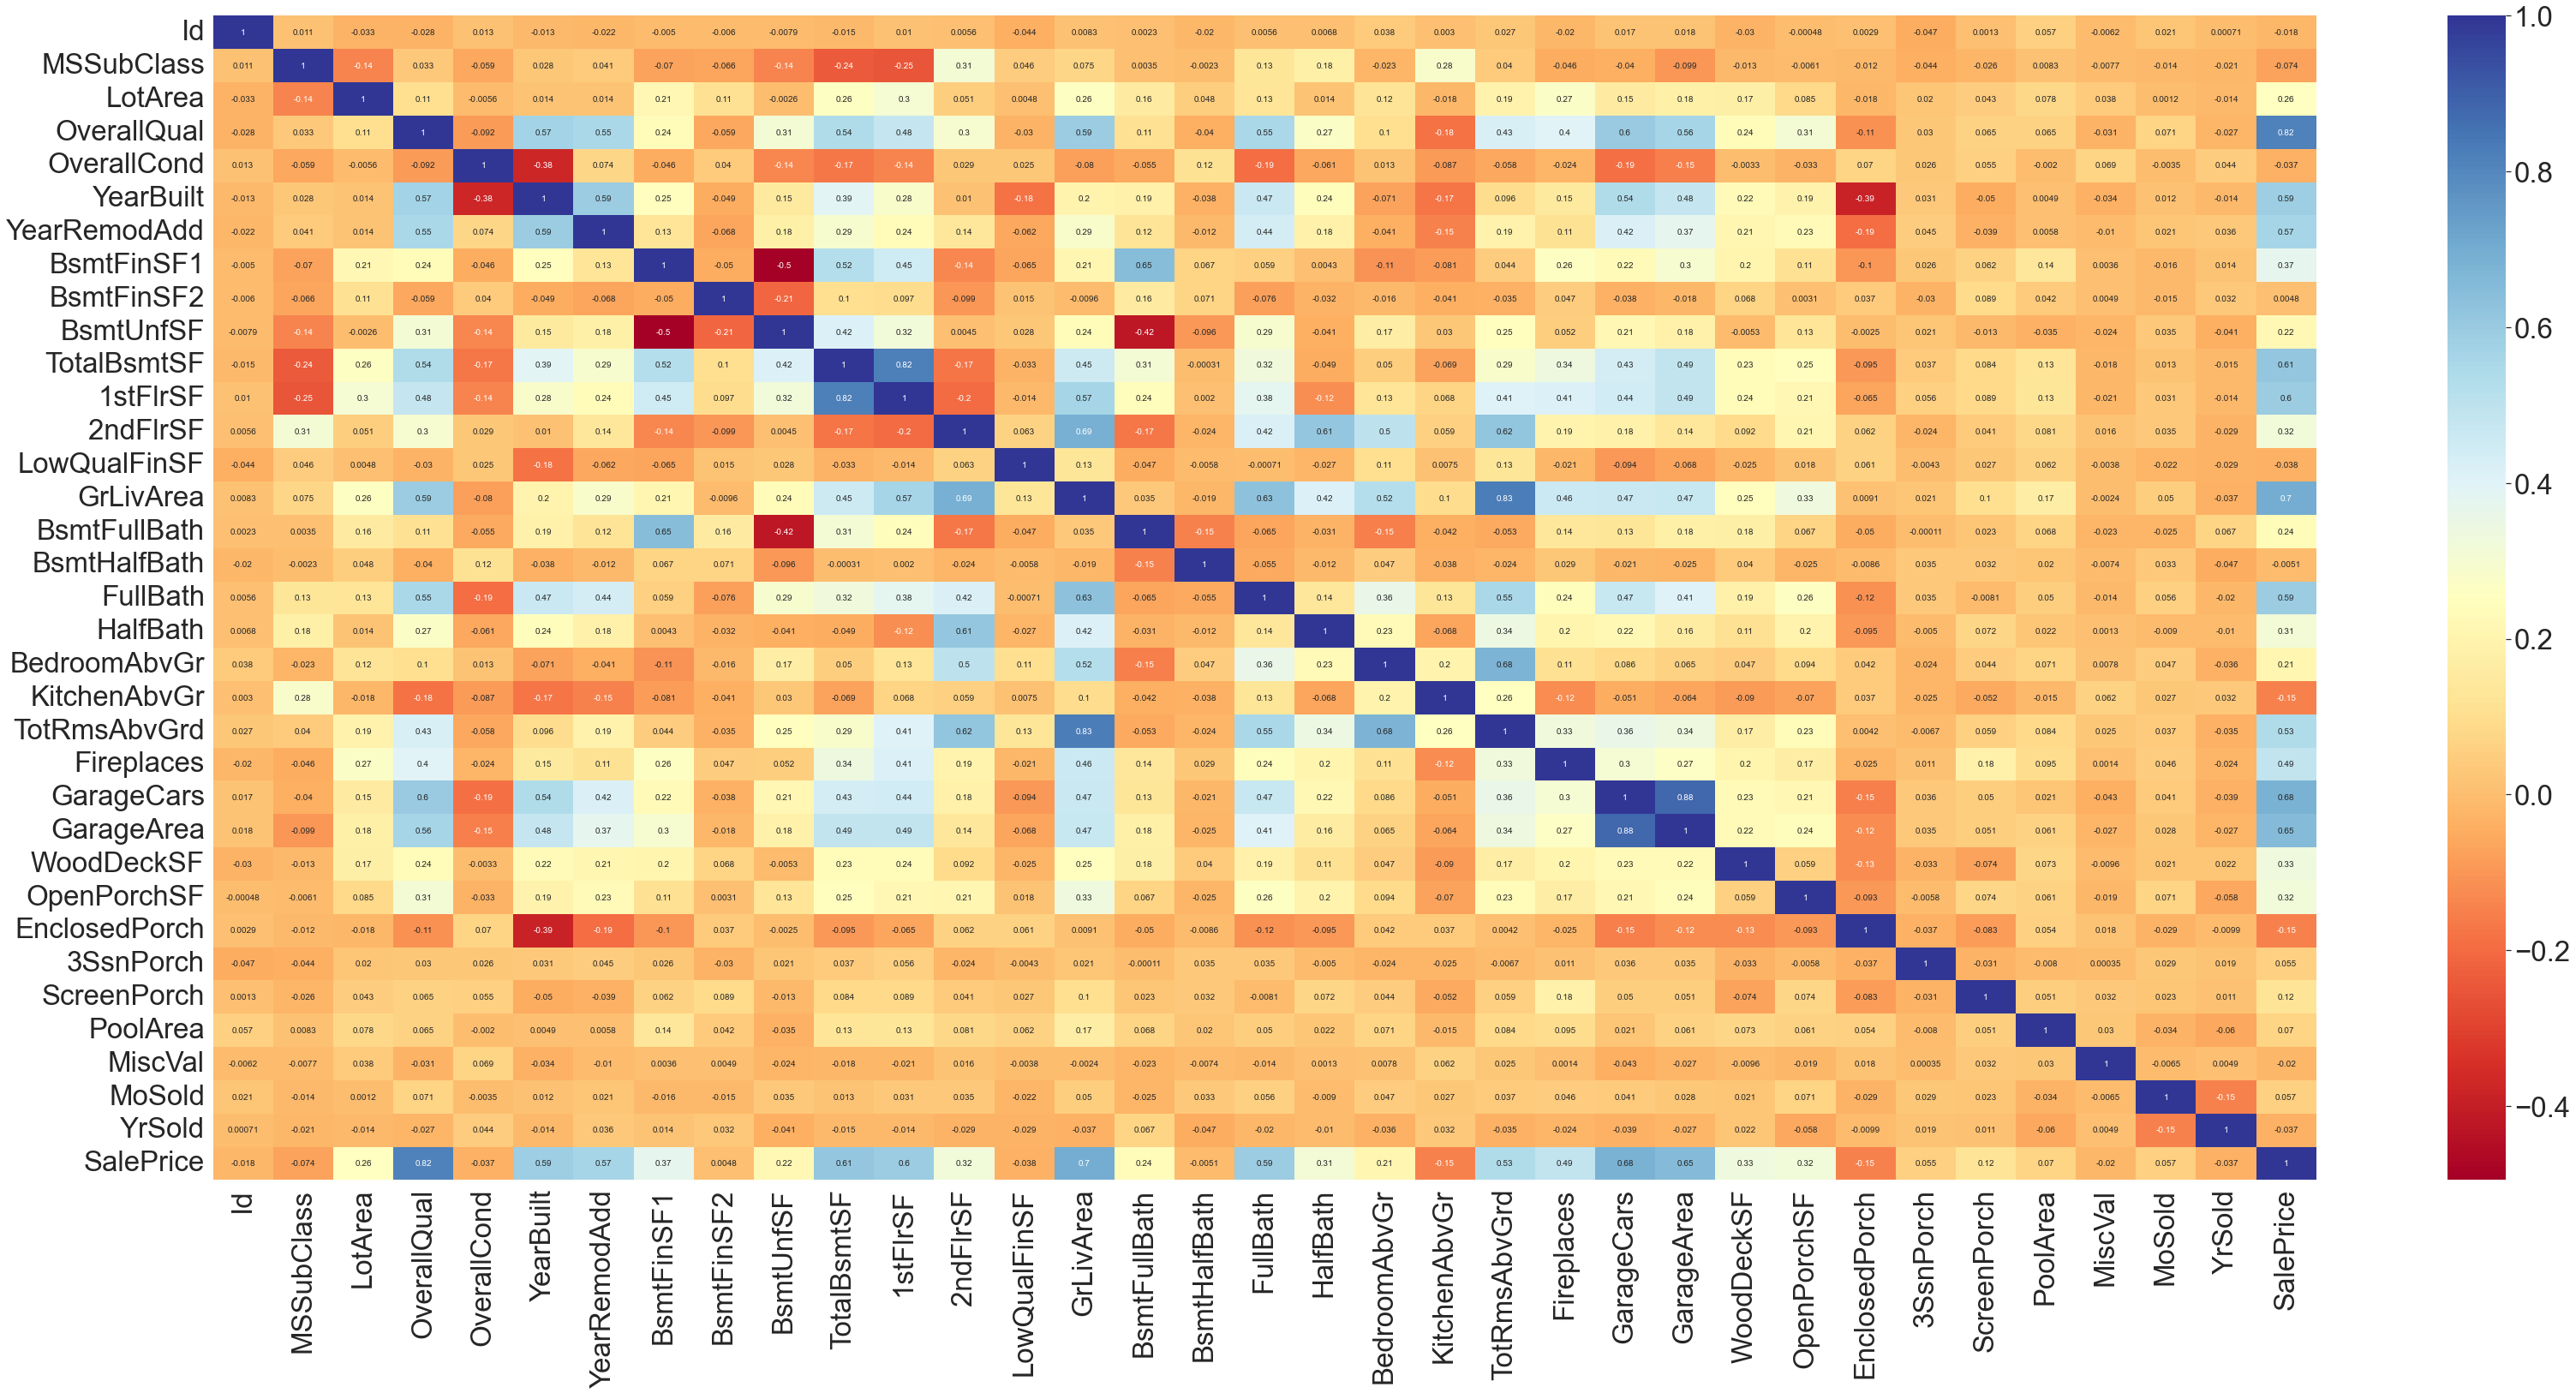

In [176]:
# Generate HEATMAP on train_num data set - i.e. Numerical variables

plt.figure(figsize=(55,25))

sns.heatmap(train_num.corr(), cmap= 'RdYlBu', annot=True );

### <font color=blue> This above Heatmap is clearly indicating that grand level of <u>Multicollinearity occurring between any two predictor variables<u>. 
<font color=blue> This correlation can cause problems during model fitting and interpretation. <BR>Very difficult to change one variable without affecting the other variable due to this multicolinearity; highly difficult to realize which variable is statistically significant.<BR>This leads to highly varried coefficients. 
<font color=blue size=3> <b>Hence, need to resolve this by Regression techniques.

### Data Cleansing / PreProcessing .... Handle Missing Values - if any.

In [177]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

### <font size=3 color=blue> Most machine learning algorithms can not work with text based categorical variables. Hence, it is necessary to encode  categorical variables into numerical encoding as part of data preprocessing step before we feed them to Models / Algorithms. 
<br>
<font size=3 color=blue> <b>This can be done either through get_dummies (one hot encoding) or through LabelEncoder.
    
Here, we go with pd.get_dummies.

In [188]:
train_cat_encoded = pd.get_dummies(train_cat, drop_first=True)
train_cat_encoded.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotFrontage_101  \
0            0            0            1            0                0   
1            0            0            1            0                0   
2            0            0            1            0                0   
3            0            0            1            0                0   
4            0            0            1            0                0   

   LotFrontage_102  LotFrontage_103  LotFrontage_104  LotFrontage_105  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   LotFrontage_106  LotFrontage_107  LotFrontage_108  LotFrontage_109  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   LotFrontage_110  LotFrontage_111  LotFrontage_112  LotFrontage_114  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   LotFrontage_115  LotFrontage_116  LotFrontage_118  LotFrontage_120  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   LotFrontage_121  LotFrontage_122  LotFrontage_124  LotFrontage_128  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   LotFrontage_129  LotFrontage_130  LotFrontage_134  LotFrontage_137  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   LotFrontage_138  LotFrontage_140  LotFrontage_141  LotFrontage_144  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   LotFrontage_149  LotFrontage_150  LotFrontage_152  LotFrontage_153  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   LotFrontage_160  LotFrontage_168  LotFronta

In [189]:
train_cat.shape

(1460, 46)

In [190]:
train_cat_encoded.shape

(1460, 759)

### <font size=3 color=blue>Handle outliers - in Numerical Variables.

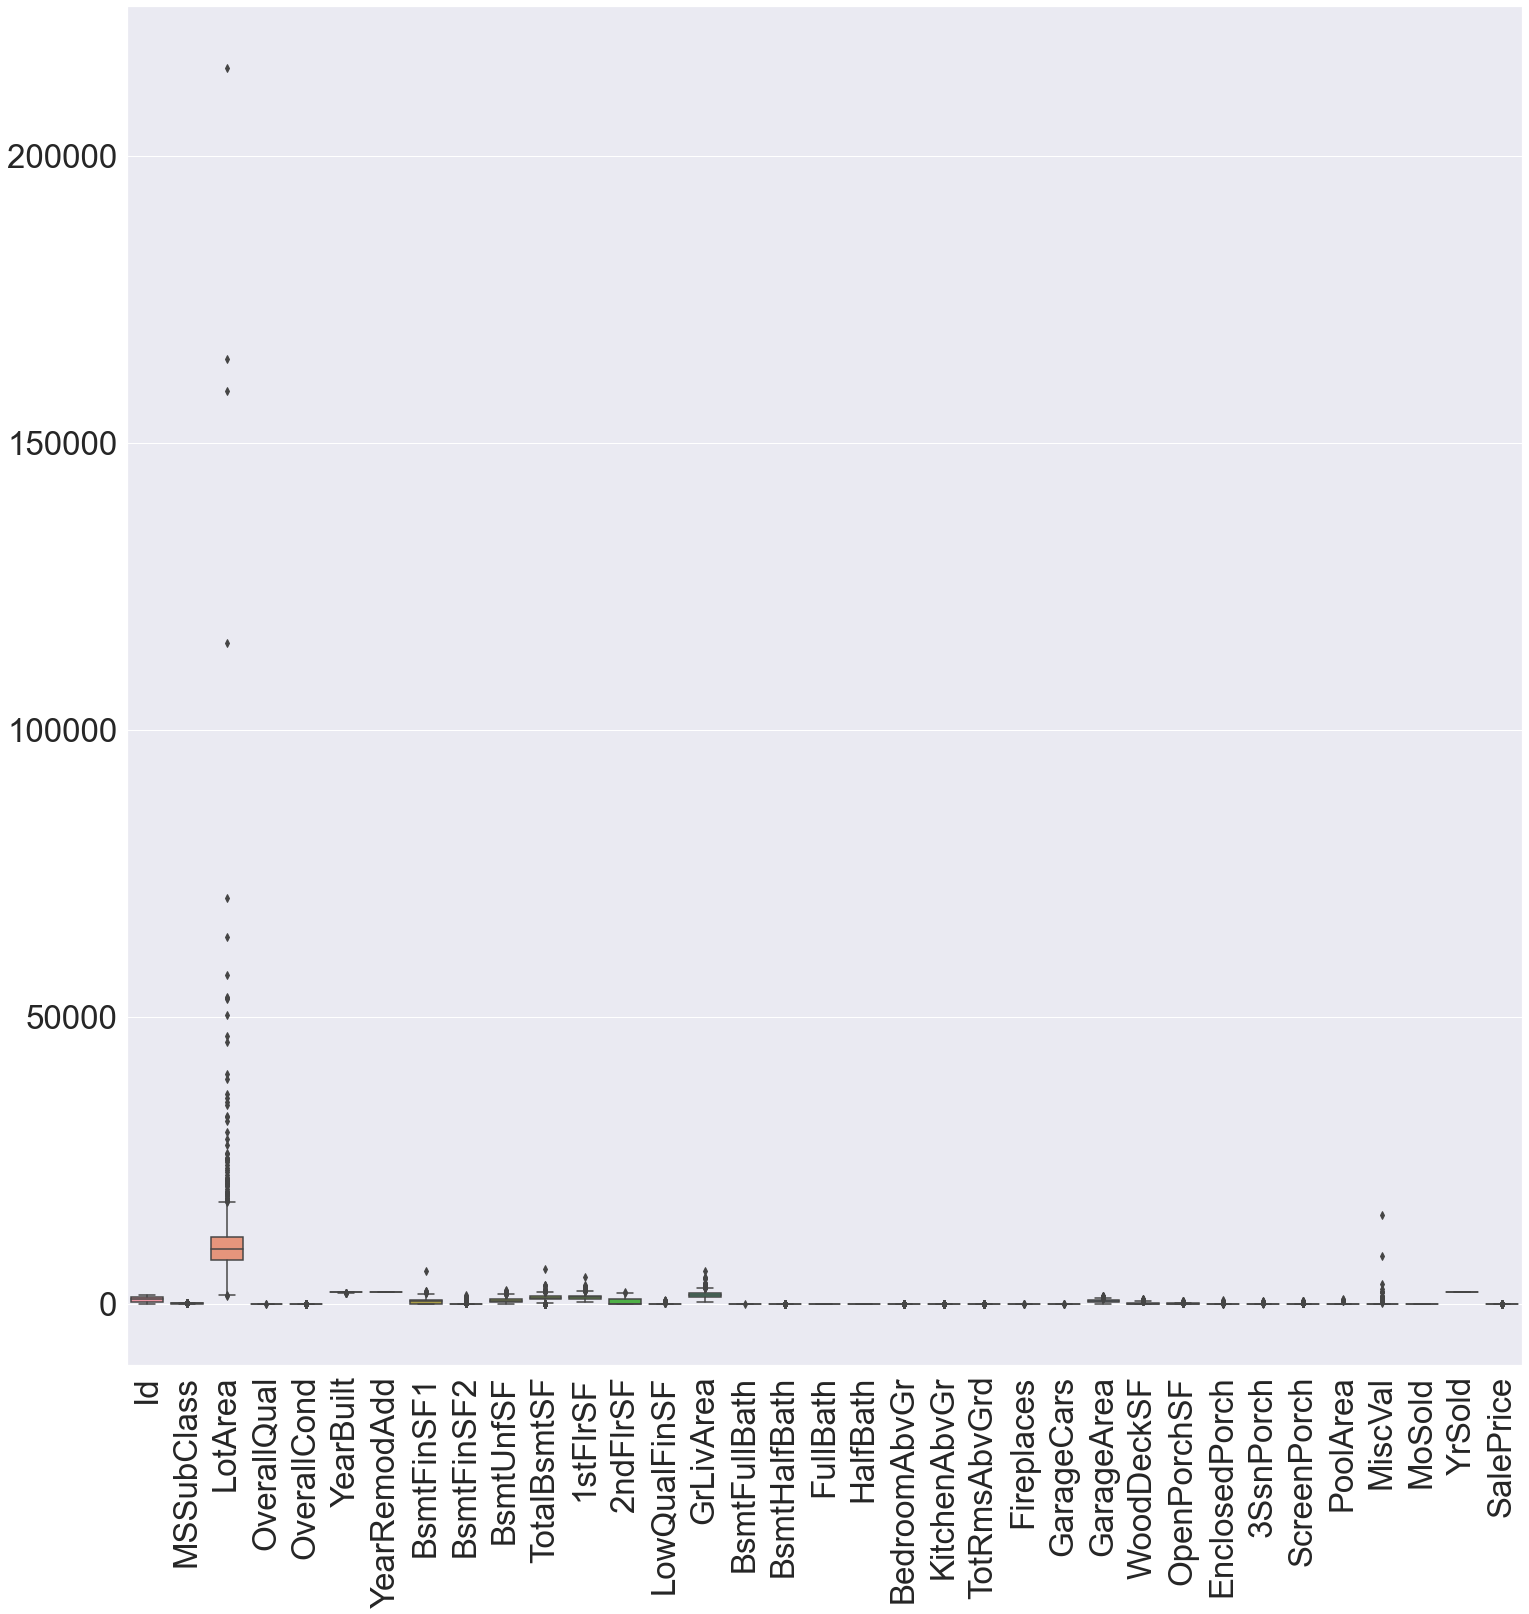

In [197]:
# Generate BOXPLOTs for all NUMERICAL predictors / variables
plt.figure(figsize=[25,25])
plt.xticks(rotation=90)
sns.boxplot(data=train_num);

### <font size=3 color=blue>Removing the outliers simply is one option, but we cap the outliers instead of removing them. Capping a.k.a setting a min or max values for outliers, they are still included in the data set, but, their impact would be none / controlled. <br> <br> Here, let's consider 5% as min (lower bound) and 95% as max (upper bound) values to handle outliers
    
<font color=brown>There are other techniques like assiging a new value for outliers, apply any new transformation function on outliers.

In [199]:
# Capping outliers to 5% at lower bound and 95% at upper bound
for col in train_num.columns:
    train_num[col][train_num[col] <= train_num[col].quantile(0.05)] = train_num[col].quantile(0.05)
    train_num[col][train_num[col] >= train_num[col].quantile(0.95)] = train_num[col].quantile(0.95)

### RE-Generate BOXPLOT for all NUMERICAL predictors / variables. With this, done with outliers on Numerical values

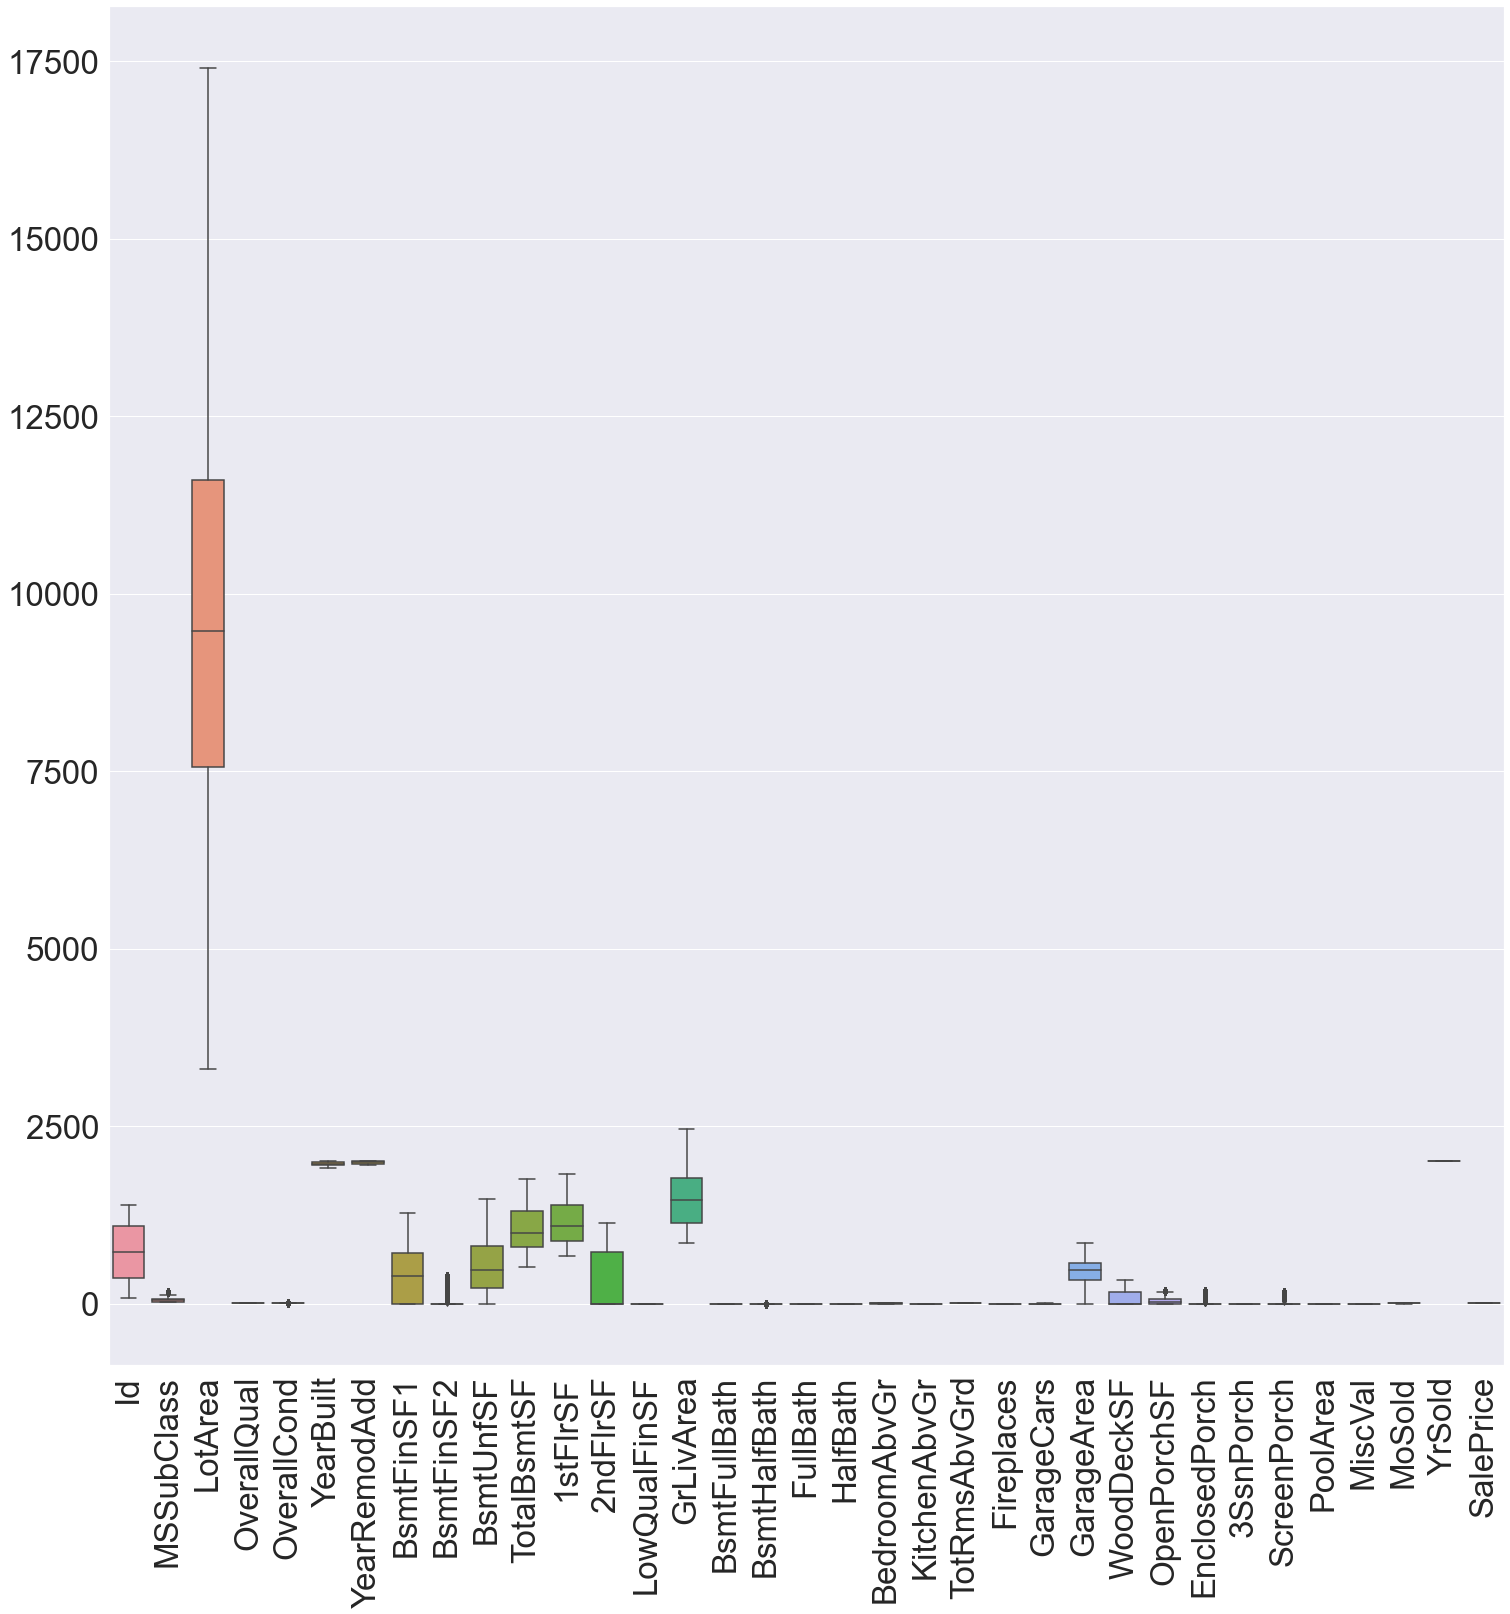

In [200]:
# regenerating boxplot
plt.figure(figsize=[25,25])
plt.xticks(rotation=90)
sns.boxplot(data=train_num);

### <font color=Blue size=3> Make the final consolidated dataset ready for Model creation, by bringing both Numerical and Categorical datasets together

In [201]:
train_model = pd.concat([train_num, train_cat_encoded], axis=1)

train_model.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0  73.95          60   8450.0            7            5       2003   
1  73.95          20   9600.0            6            8       1976   
2  73.95          60  11250.0            7            5       2001   
3  73.95          70   9550.0            7            5       1916   
4  73.95          60  14260.0            8            5       2000   

   YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0          2003         706         0.0        150        856.0     856.0   
1          1976         978         0.0        284       1262.0    1262.0   
2          2002         486         0.0        434        920.0     920.0   
3          1970         216         0.0        540        756.0     961.0   
4          2000         655         0.0        490       1145.0    1145.0   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0     854.0             0     1710.0             1             0         2   
1       0.0             0     1262.0             0             1         2   
2     866.0             0     1786.0             1             0         2   
3     756.0             0     1717.0             1             0         1   
4    1053.0             0     2198.0             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       548.0           0         61.0           0.00          0            0   
1       460.0         298          0.0           0.00          0            0   
2       608.0           0         42.0           0.00          0            0   
3       642.0           0         35.0         180.15          0            0   
4       836.0         192         84.0           0.00          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  \
0         0        0       2    2008  12.247694            0            0   
1         0        0       5    2007  12.109011            0            0   
2         0        0       9    2008  12.317167            0            0   
3         0        0       2    2006  11.849398            0            0   
4         0        0      11    2008  12.429216            0            0   

   MSZoning_RL  MSZoning_RM  LotFrontage_101  LotFrontage_102  \
0            1            0                0                0   
1            1            0                0                0   
2            1            0                0                0   
3            1            0                0                0   
4            1            0                0                0   

   LotFrontage_103  LotFrontage_104  LotFrontage_105  LotFrontage_106  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   LotFrontage_107  LotFrontage_108  LotFrontage_109  LotFrontage_110  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0   

In [202]:
train_model.shape

(1460, 794)

### <font color=Blue size=5> Build the Model, Evaluate, Fine Tune, and Finalize the Model.

### <font color= blue> Make X Ready

In [203]:
X = train_model.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60   8450.0            7            5       2003          2003   
1          20   9600.0            6            8       1976          1976   
2          60  11250.0            7            5       2001          2002   
3          70   9550.0            7            5       1916          1970   
4          60  14260.0            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706         0.0        150        856.0     856.0     854.0   
1         978         0.0        284       1262.0    1262.0       0.0   
2         486         0.0        434        920.0     920.0     866.0   
3         216         0.0        540        756.0     961.0     756.0   
4         655         0.0        490       1145.0    1145.0    1053.0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0     1710.0             1             0         2         1   
1             0     1262.0             0             1         2         0   
2             0     1786.0             1             0         2         1   
3             0     1717.0             1             0         1         0   
4             0     2198.0             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       548.0           0         61.0           0.00          0            0   
1       460.0         298          0.0           0.00          0            0   
2       608.0           0         42.0           0.00          0            0   
3       642.0           0         35.0         180.15          0            0   
4       836.0         192         84.0           0.00          0            0   

   PoolArea  MiscVal  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0         0        0       2    2008            0            0            1   
1         0        0       5    2007            0            0            1   
2         0        0       9    2008            0            0            1   
3         0        0       2    2006            0            0            1   
4         0        0      11    2008            0            0            1   

   MSZoning_RM  LotFrontage_101  LotFrontage_102  LotFrontage_103  \
0            0                0                0                0   
1            0                0                0                0   
2            0                0                0                0   
3            0                0                0                0   
4            0                0                0                0   

   LotFrontage_104  LotFrontage_105  LotFrontage_106  LotFrontage_107  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   LotFrontage_108  LotFrontage_109  LotFrontage_110  LotFrontage_111  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0      

### <font color= blue>Make "y" Ready (Target Variable - SalePrice)

In [204]:
y = train_model["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### <font color= blue> Train - Test Split

<font color= blue>Train-Test split is a technique for evaluating the performance of a machine learning algorithm.

Can be used for classification or regression problems or for any supervised learning algorithm.

<font color= blue>Split the dataset into two subsets. 
    <li>The first subset a.k.a. Train Dataset: Used to fit the machine learning model.
    <li>The second subset a.k.a. Test Dataset: Used to evaluate the fit machine learning model.</li><br>
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

In [206]:
# Splitting above X (predictors) and y (target variable) into Train and Test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [212]:
print("SHAPES of X and y Train and Test Data sets, as follows:")
print("X_train = ", X_train.shape, "\nX_test = ", X_test.shape, "\ny_train = ", y_train.shape, "\ny_test = ", y_test.shape)

SHAPES of X and y Train and Test Data sets, as follows:
X_train =  (1168, 792) 
X_test =  (292, 792) 
y_train =  (1168,) 
y_test =  (292,)


<font color = blue size=3><b>Many / all Numerical variables are not normally distributed. <br><br>Hence, need to apply Scaling Techniques / Normalization techniques / others to bring certain harmony among the numerical values in the data set. 


In [216]:
## Make a new dataset with all Numerical predictors to be scaled
numerical_predictors = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
numerical_predictors

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [218]:
# Follow the Standard Scaling technique. Instantiate StandardScaler object

scaler = StandardScaler()

# Scale the numerical columns 
X_train[numerical_predictors] = scaler.fit_transform(X_train[numerical_predictors])
X_test[numerical_predictors] = scaler.transform(X_test[numerical_predictors])

y_train


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

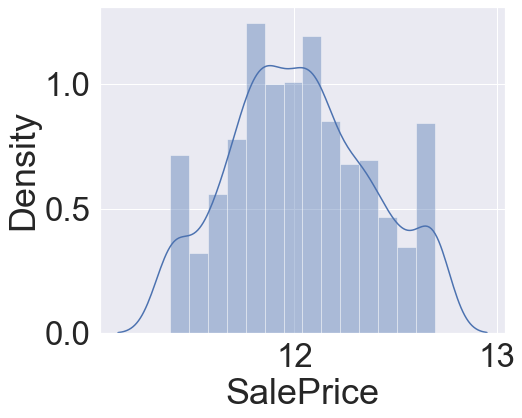

In [229]:
# Verify the target variable is normal in both train and test datasets
print("y_train Distribution Plot")
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(y_train)

y_test Distribution Plot


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

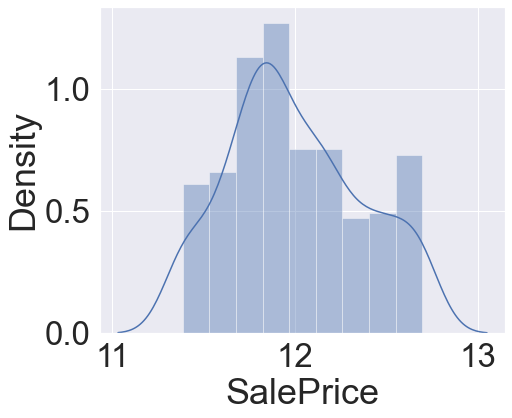

In [230]:
print("y_test Distribution Plot")
plt.figure(figsize=(16,6))
plt.subplot(122)
sns.distplot(y_test)

### <Font color=blue>Build Ridge Regression Model 

#### <font color=Orange size=3>Create a function to display below 4 distinct metrics on both Train and Test datasets. 
#### <font color=Blue size=3>Following are the metrics:
<font color=Blue size=2>
    <OL><LI><b>R-Squared</b>: R-Squared is the degree to which a dependent variable varies with a change in the value of an independent variable can be known from the R-squared<br>
    <li><b>Residual Sum of Squares (RSS):</b> RSS is a statistical method that helps identify the level of discrepancy in a dataset not predicted by a regression model. Thus, it measures the variance in the value of the observed data when compared to its predicted value as per the regression model. Hence, RSS indicates whether the regression model fits the actual dataset well or not.<br>
    <li><b>Mean Squared Error (MSE):</b> The MSE is the average squared distance between the observed and predicted values.<br>
        <LI><b>Root Mean Squared Error (RMSE):</b> RMSE Is calculated as the square root of the variance of the residuals. The lower the RMSE, the better a given model is able to “fit” a dataset.<br>
            </OL>
        <b>This function should return 4 X 2 = 8 Metric Results

In [235]:
def Regression_Metrics(y_train, y_train_pred, y_test, y_pred):
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

<font color=Blue>
In ridge regression, alpha is a crucial parameter that controls the amount of regularization applied to the model. <br>Finding an appropriate value for alpha involves balancing <b>bias and variance</b>. <br>Too small an alpha may lead to overfitting, while too large an alpha may result in underfitting.
<br>
<br>

Leverage <b><u>GridSearchCV</u></b> from SKLearn to pass array of alpha values to find the optimal alpha value.

In [236]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

<font color=blue size=3><b>Find the <font color=red>best alpha</font> out of the array of parameters passed, to build <font color=red>RIDGE REGRESSION MODEL.

In [237]:
ridgeCV.best_params_

{'alpha': 10.0}

<font color=blue size=3> Display CV Results

In [238]:
ridgeCV.cv_results_

{'mean_fit_time': array([1.080861  , 0.71926908, 0.23354349, 0.16227307, 0.18416185,
        0.17870831, 0.1848958 , 0.18526835, 0.17107501, 0.18867221,
        0.17796602, 0.17529645, 0.17549052, 0.17980928, 0.18173227,
        0.16660595, 0.1781199 , 0.18195634, 0.1650281 , 0.18651667,
        0.2398983 , 0.16937804, 0.20688939, 0.16128888, 0.16920977,
        0.17137589, 0.15764418, 0.15819445]),
 'std_fit_time': array([0.00500841, 0.45240344, 0.03697152, 0.0314837 , 0.01451767,
        0.01807202, 0.00701514, 0.00330471, 0.00938674, 0.01019211,
        0.00938696, 0.01694799, 0.00582893, 0.00777982, 0.01418405,
        0.01198703, 0.03636713, 0.0235442 , 0.01488271, 0.01600642,
        0.00861891, 0.02984203, 0.02688538, 0.0207191 , 0.01339314,
        0.01525284, 0.00810224, 0.00788192]),
 'mean_score_time': array([0.04687977, 0.03505001, 0.02264271, 0.0243011 , 0.02607665,
        0.02163424, 0.02247691, 0.02578015, 0.02652516, 0.02911143,
        0.01914616, 0.02438965, 0.025405

<font color=blue size=3><b> Instantiate Ridge Regression with 10 as alpha value, fit the Ridge Regression model on TRAINING DATA, display the coefficients of Ridge Regression FITTED model 

In [242]:
#Instantiate Ridge with alpha = 10
ridge = Ridge(alpha=10)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [243]:
# View the coefficients of ridge regression fitted model
ridge.coef_

array([-1.80372874e-02,  2.36620602e-02,  5.54275922e-02,  3.90419316e-02,
        4.38534787e-02,  2.09666857e-02,  3.41141566e-03, -4.24379174e-03,
       -2.15291085e-02,  5.73202510e-02,  1.00260209e-02,  2.89729245e-02,
        0.00000000e+00,  8.47994477e-02,  9.65883573e-03, -5.99258554e-04,
        9.59470726e-03,  1.06764974e-02,  5.31238944e-03,  0.00000000e+00,
        1.18552734e-03,  1.99326514e-02,  1.99202171e-02,  1.44546939e-02,
        1.15129746e-02,  6.54009410e-03,  2.29655268e-03,  0.00000000e+00,
        1.06604948e-02,  0.00000000e+00,  0.00000000e+00, -4.40000558e-04,
       -2.46777088e-03,  2.94083122e-02,  1.45373853e-02,  1.26859577e-02,
       -2.42358937e-02,  5.55819625e-03, -5.61798912e-03, -9.69142908e-04,
       -1.93923632e-03, -7.72448498e-03, -2.09100673e-03, -2.22676846e-02,
        1.78520455e-02,  5.69429727e-03,  5.17822962e-05,  3.35463313e-03,
       -5.03686348e-03,  4.87626170e-03,  7.31522969e-03,  0.00000000e+00,
       -1.66863018e-02, -

In [244]:
# Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

<font color=blue size=3><b>Invoke Regression_Metrics with X and Y - Train and Test data sets to display R-Squared, RSS, MSE, RMSE

In [246]:
# Invoke Regression_Metrics with X and Y - Train and Test data sets to display R-Squared, RSS, MSE, RMSE
ridge_metrics = Regression_Metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.95
R-Squared (Test) = 0.93
RSS (Train) = 7.82
RSS (Test) = 2.90
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.10


### Plot R2 Score against different values of alpha for both train and test sets.
R-squared is a <b>goodness-of-fit measure for linear regression models</b>. 
This indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. 
R-squared measures the strength of the relationship between your model and the dependent variable.

After fitting a linear regression model, need to determine how well the model fits the data. Small R-squared values are not always a problem, and high R-squared values are not necessarily good!

In [247]:
# Create a dataframe of ridge cross validation (CV) results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        1.080861      0.005008         0.046880        0.000000      0.0001   
1        0.719269      0.452403         0.035050        0.010013       0.001   
2        0.233543      0.036972         0.022643        0.002638        0.01   
3        0.162273      0.031484         0.024301        0.006476        0.05   
4        0.184162      0.014518         0.026077        0.009760         0.1   
5        0.178708      0.018072         0.021634        0.000735         0.2   
6        0.184896      0.007015         0.022477        0.002091         0.3   
7        0.185268      0.003305         0.025780        0.002666         0.4   
8        0.171075      0.009387         0.026525        0.007935         0.5   
9        0.188672      0.010192         0.029111        0.007431         0.6   
10       0.177966      0.009387         0.019146        0.006679         0.7   
11       0.175296      0.016948         0.024390        0.004610         0.8   
12       0.175491      0.005829         0.025405        0.003431         0.9   
13       0.179809      0.007780         0.025481        0.006308         1.0   
14       0.181732      0.014184         0.025321        0.003849         2.0   
15       0.166606      0.011987         0.020567        0.002277         3.0   
16       0.178120      0.036367         0.028709        0.019443         4.0   
17       0.181956      0.023544         0.030658        0.011359         5.0   
18       0.165028      0.014883         0.021708        0.005231         6.0   
19       0.186517      0.016006         0.026977        0.011780         7.0   
20       0.239898      0.008619         0.026478        0.017370         8.0   
21       0.169378      0.029842         0.019544        0.005927         9.0   
22       0.206889      0.026885         0.025141        0.007776        10.0   
23       0.161289      0.020719         0.025792        0.004875          20   
24       0.169210      0.013393         0.018122        0.007023          50   
25       0.171376      0.015253         0.024769        0.007492         100   
26       0.157644      0.008102         0.022713        0.006695         500   
27       0.158194      0.007882         0.018424        0.005608        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.114506          -0.136062   
1    {'alpha': 0.001}          -0.114336          -0.128460   
2     {'alpha': 0.01}          -0.111424          -0.114336   
3     {'alpha': 0.05}          -0.101503          -0.104830   
4      {'alpha': 0.1}          -0.095050          -0.099943   
5      {'alpha': 0.2}          -0.088503          -0.094723   
6      {'alpha': 0.3}          -0.085016          -0.091865   
7      {'alpha': 0.4}          -0.082758          -0.089979   
8      {'alpha': 0.5}          -0.080986          -0.088460   
9      {'alpha': 0.6}          -0.079632          -0.087486   
10     {'alpha': 0.7}          -0.078571          -0.086751   
11     {'alpha': 0.8}          -0.077662          -0.086080   
12     {'alpha': 0.9}          -0.076936          -0.085465   
13     {'alpha': 1.0}          -0.076340          -0.084908   
14     {'alpha': 2.0}          -0.072878          -0.081539   
15     {'alpha': 3.0}          -0.071411          -0.080377   
16     {'alpha': 4.0}          -0.070742          -0.079917   
17     {'alpha': 5.0}          -0.070367          -0.079648   
18     {'alpha': 6.0}          -0.070097          -0.079481   
19     {'alpha': 7.0}          -0.069892          -0.079379   
20     {'alpha': 8.0}          -0.069755          -0.079320   
21     {'alpha': 9.0}          -0.069735          -0.079278   
22    {'alpha': 10.0}          -0.069741          -0.079277   
23      {'alpha': 20}          -0.070131          -0.080112   
24      {'alpha': 50}          -0.071095          -0.082195   
25     {'alpha': 100}          -0.071989     

<font color =blue size=4>Plot R2/R-Square Score against alpha values.

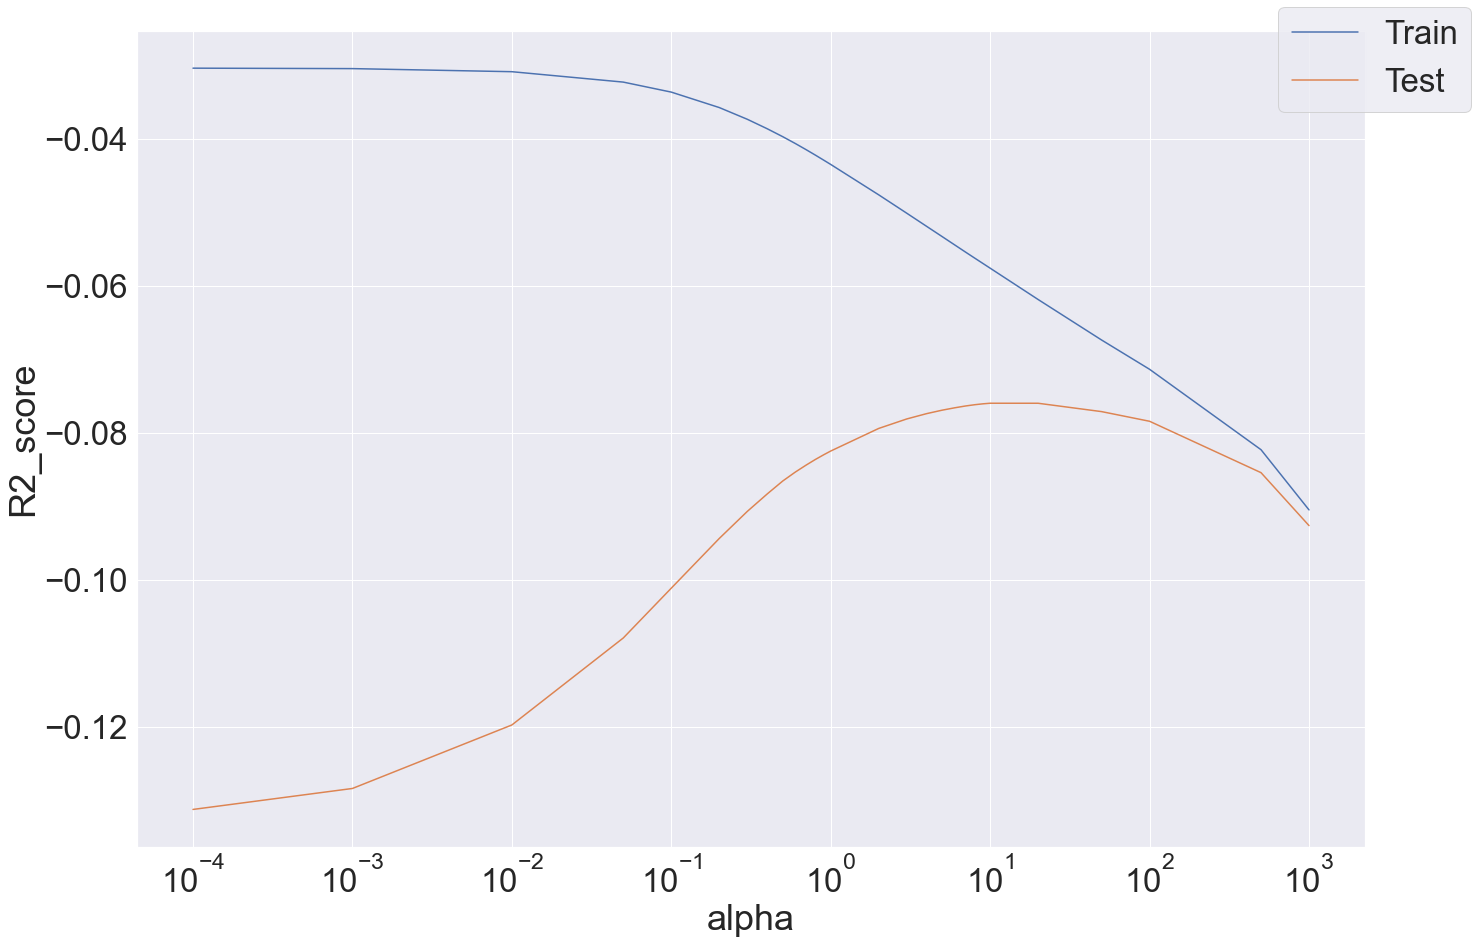

In [253]:
## Plotting R2 score vs alpha values
plt.rcParams["figure.figsize"] = 22, 15
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

<font color=blue size=3><b>Value of alpha inversly proportional to train error and an initial increase followed by decrease in test error.
<br>
    <br><b>From graph also, it is apparent that the optimal value of alpha is 10.

### <font color=blue size=5>Build Lasso Regression Model</font> 

<font color=blue size=3.5>Like in Ridge, prior to building Lasso Regression Model, need to find the optimal alpha out of array of distinct alpha values (parameters) & Cross Validate.

In [256]:
#distinct alpha values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

#instantiate Lasso object
lasso = Lasso()

# cross validation using GridSearchCV and fit the model for Train - X and y.
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

<font color=blue><b>Display the optimal value of alpaha

In [258]:
lassoCV.best_params_

{'alpha': 0.001}

<font size=4 color=blue><b>Optimum value of alpha is 0.001. Now build a LASSO Regression Model using this alpha value i.e. 0.001

<font color=blue><b>View the results of cross validation search

In [259]:
lassoCV.cv_results_

{'mean_fit_time': array([1.66024308, 0.38064389, 0.21536303, 0.18472242, 0.12996712,
        0.11197205, 0.08574729, 0.08253889, 0.08937769, 0.08341503,
        0.08754134, 0.08103385, 0.07275238, 0.06933289, 0.06741395,
        0.07813773, 0.07185941, 0.07096334, 0.07600846, 0.08004007,
        0.06799135, 0.08261919, 0.14415379, 0.08202629, 0.07933044,
        0.0740479 , 0.06536822, 0.06310091]),
 'std_fit_time': array([0.40949229, 0.16506914, 0.02071343, 0.00775852, 0.02179637,
        0.01991841, 0.01049656, 0.01809553, 0.02748849, 0.02497826,
        0.02973943, 0.01955555, 0.01204475, 0.00752795, 0.00615882,
        0.01711394, 0.0076536 , 0.01576253, 0.01188397, 0.0091112 ,
        0.01111239, 0.01087476, 0.05067715, 0.01858998, 0.0020044 ,
        0.00797255, 0.00434847, 0.00996179]),
 'mean_score_time': array([0.02730355, 0.02829242, 0.02620006, 0.03691297, 0.02642784,
        0.03297162, 0.02530513, 0.02304626, 0.0338038 , 0.02811546,
        0.02194004, 0.02899222, 0.020327

<font size=4 color=blue><b>Optimum value of alpha is 0.001. Now build a LASSO Regression Model using this alpha value i.e. 0.001, followed by fit the train datasets.

In [261]:
lasso = Lasso(alpha=0.001)

#Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

<font color=blue size=3><b>View the coefficients of lasso fitted model

In [262]:
lasso.coef_

array([-0.01247554,  0.022635  ,  0.06900072,  0.04173695,  0.05184493,
        0.01941668,  0.0212629 , -0.        , -0.00518496,  0.04509949,
       -0.        ,  0.00692763,  0.        ,  0.10558105,  0.01164449,
        0.        ,  0.00385034,  0.00856466,  0.        ,  0.        ,
        0.        ,  0.02093764,  0.02024746,  0.01633218,  0.01160201,
        0.00612582,  0.00153135,  0.        ,  0.00980159,  0.        ,
        0.        , -0.        , -0.00111049,  0.        ,  0.        ,
        0.        , -0.03920331,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.  

<font color=blue size=3> Make predictions as per Lasso on X Train and X test to get y Trained Predictions.

In [264]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

<font color = blue size=3>Invoke <b>Regression_Metrics</b> with X and Y - Train and Test data sets to display R-Squared, RSS, MSE, RMSE

In [266]:
lasso_metrics = Regression_Metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.92
RSS (Train) = 11.53
RSS (Test) = 2.93
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


<font color = blue size=3>Plot R2 Score against different values of alpha for both train and test sets

In [267]:
## Create a dataframe of Lasso cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        1.660243      0.409492         0.027304        0.007238      0.0001   
1        0.380644      0.165069         0.028292        0.007706       0.001   
2        0.215363      0.020713         0.026200        0.012652        0.01   
3        0.184722      0.007759         0.036913        0.013490        0.05   
4        0.129967      0.021796         0.026428        0.002510         0.1   
5        0.111972      0.019918         0.032972        0.011185         0.2   
6        0.085747      0.010497         0.025305        0.003819         0.3   
7        0.082539      0.018096         0.023046        0.002403         0.4   
8        0.089378      0.027488         0.033804        0.009526         0.5   
9        0.083415      0.024978         0.028115        0.006770         0.6   
10       0.087541      0.029739         0.021940        0.004511         0.7   
11       0.081034      0.019556         0.028992        0.014931         0.8   
12       0.072752      0.012045         0.020328        0.006537         0.9   
13       0.069333      0.007528         0.015398        0.000444         1.0   
14       0.067414      0.006159         0.027914        0.008412         2.0   
15       0.078138      0.017114         0.015622        0.000002         3.0   
16       0.071859      0.007654         0.025064        0.007710         4.0   
17       0.070963      0.015763         0.021905        0.007697         5.0   
18       0.076008      0.011884         0.022885        0.007522         6.0   
19       0.080040      0.009111         0.023834        0.007996         7.0   
20       0.067991      0.011112         0.030831        0.023891         8.0   
21       0.082619      0.010875         0.036730        0.013164         9.0   
22       0.144154      0.050677         0.033580        0.018671        10.0   
23       0.082026      0.018590         0.019608        0.003298          20   
24       0.079330      0.002004         0.019076        0.003193          50   
25       0.074048      0.007973         0.021214        0.007120         100   
26       0.065368      0.004348         0.018807        0.006277         500   
27       0.063101      0.009962         0.015204        0.000846        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.072019          -0.081430   
1    {'alpha': 0.001}          -0.070951          -0.081714   
2     {'alpha': 0.01}          -0.080448          -0.096991   
3     {'alpha': 0.05}          -0.101814          -0.122520   
4      {'alpha': 0.1}          -0.142863          -0.157392   
5      {'alpha': 0.2}          -0.222206          -0.231832   
6      {'alpha': 0.3}          -0.274800          -0.286080   
7      {'alpha': 0.4}          -0.274800          -0.286080   
8      {'alpha': 0.5}          -0.274800          -0.286080   
9      {'alpha': 0.6}          -0.274800          -0.286080   
10     {'alpha': 0.7}          -0.274800          -0.286080   
11     {'alpha': 0.8}          -0.274800          -0.286080   
12     {'alpha': 0.9}          -0.274800          -0.286080   
13     {'alpha': 1.0}          -0.274800          -0.286080   
14     {'alpha': 2.0}          -0.274800          -0.286080   
15     {'alpha': 3.0}          -0.274800          -0.286080   
16     {'alpha': 4.0}          -0.274800          -0.286080   
17     {'alpha': 5.0}          -0.274800          -0.286080   
18     {'alpha': 6.0}          -0.274800          -0.286080   
19     {'alpha': 7.0}          -0.274800          -0.286080   
20     {'alpha': 8.0}          -0.274800          -0.286080   
21     {'alpha': 9.0}          -0.274800          -0.286080   
22    {'alpha': 10.0}          -0.274800          -0.286080   
23      {'alpha': 20}          -0.274800          -0.286080   
24      {'alpha': 50}          -0.274800          -0.286080   
25     {'alpha': 100}          -0.274800     

<font color =blue size=4>Plot R2/R-Square Score against alpha values.

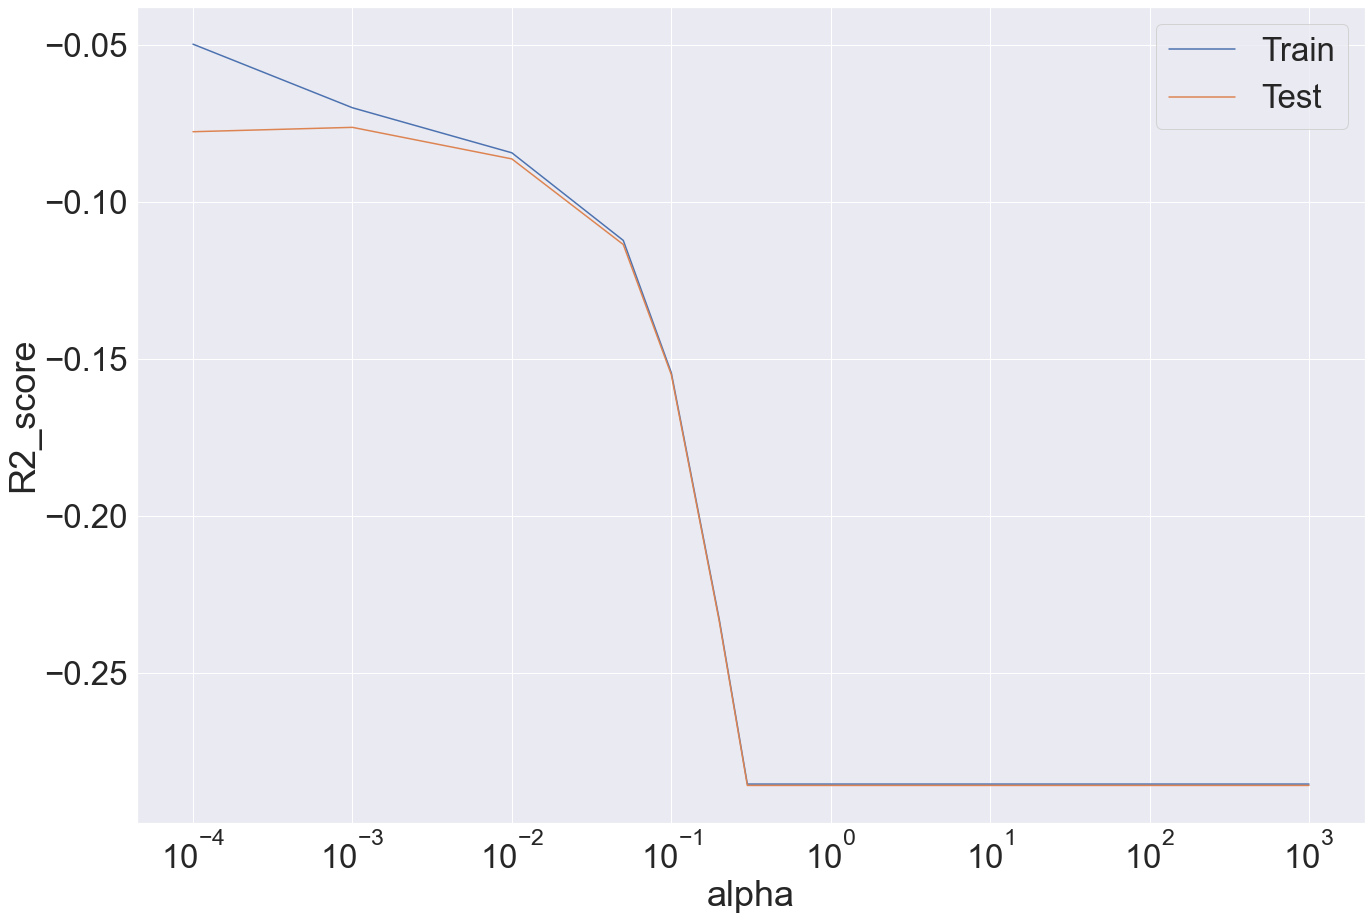

In [268]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

<font color=blue size=3>As the value of alpha increases, we see a decrease in both train and test error. 
    However, after a error value of approximately 0.05, error remains constant.

<font color=green size=5>Compare both the models - Ridge and Lasso Regression Models

Customize the display format of floating point numbers in a Data frame.

In [269]:
pd.options.display.float_format = "{:,.2f}".format

<font color=brick size=4>Creating a DataFrame with all the metrics of both RIDGE and LASSO regression models

In [270]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.95              0.92
R2 Score (Test)               0.93              0.92
RSS (Train)                   7.82             11.53
RSS (Test)                    2.90              2.93
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.08              0.10
RMSE (Test)                   0.10              0.10

### The R2 score on test data is 0.93 for both Ridge Regression and Lasso models.

### <font color=blue>Find the coefficients after Regularization

In [271]:
## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [MSSubClass, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, LotFrontage_101, LotFrontage_102, LotFrontage_103, LotFrontage_104, LotFrontage_105, LotFrontage_106, LotFrontage_107, LotFrontage_108, LotFrontage_109, LotFrontage_110, LotFrontage_111, LotFrontage_112, LotFrontage_114, LotFrontage_115, LotFrontage_116, LotFrontage_118, LotFrontage_120, LotFrontage_121, LotFrontage_122, LotFrontage_124, LotFrontage_128, LotFrontage_129, LotFrontage_130, LotFrontage_134, LotFrontage_137, LotFrontage_138, LotFrontage_140, LotFrontage_141, LotFrontage_144, LotFrontage_149, LotFrontage_150, LotFrontage_152, LotFrontage_153, LotFrontage_160, LotFrontage_168, LotFrontage_174, LotFrontage_182, LotFrontage_21, LotFrontage_24, LotFrontage_30, LotFrontage_313, LotFrontage_32, LotFrontage_33, LotFrontage_34, LotFrontage_35, LotFrontage_36, LotFrontage_37, LotFrontage_38, LotFrontage_39, LotFrontage_40, LotFrontage_41, LotFrontage_42, LotFrontage_43, LotFrontage_44, LotFrontage_45, LotFrontage_46, LotFrontage_47, LotFrontage_48, LotFrontage_49, LotFrontage_50, LotFrontage_51, LotFrontage_52, LotFrontage_53, ...]

### <font color=blue> Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients

In [277]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas

Ridge  Lasso
MSSubClass             -0.02  -0.01
LotArea                 0.02   0.02
OverallQual             0.06   0.07
OverallCond             0.04   0.04
YearBuilt               0.04   0.05
YearRemodAdd            0.02   0.02
BsmtFinSF1              0.00   0.02
BsmtFinSF2             -0.00  -0.00
BsmtUnfSF              -0.02  -0.01
TotalBsmtSF             0.06   0.05
1stFlrSF                0.01  -0.00
2ndFlrSF                0.03   0.01
LowQualFinSF            0.00   0.00
GrLivArea               0.08   0.11
BsmtFullBath            0.01   0.01
BsmtHalfBath           -0.00   0.00
FullBath                0.01   0.00
HalfBath                0.01   0.01
BedroomAbvGr            0.01   0.00
KitchenAbvGr            0.00   0.00
TotRmsAbvGrd            0.00   0.00
Fireplaces              0.02   0.02
GarageCars              0.02   0.02
GarageArea              0.01   0.02
WoodDeckSF              0.01   0.01
OpenPorchSF             0.01   0.01
EnclosedPorch           0.00   0.00
3SsnPorch               0.00   0.00
ScreenPorch             0.01   0.01
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MoSold                 -0.00  -0.00
YrSold                 -0.00  -0.00
MSZoning_FV             0.03   0.00
MSZoning_RH             0.01   0.00
MSZoning_RL             0.01   0.00
MSZoning_RM            -0.02  -0.04
LotFrontage_101         0.01   0.00
LotFrontage_102        -0.01  -0.00
LotFrontage_103        -0.00  -0.00
LotFrontage_104        -0.00   0.00
LotFrontage_105        -0.01  -0.00
LotFrontage_106        -0.00  -0.00
LotFrontage_107        -0.02  -0.00
LotFrontage_108         0.02   0.00
LotFrontage_109         0.01   0.00
LotFrontage_110         0.00  -0.00
LotFrontage_111         0.00   0.00
LotFrontage_112        -0.01  -0.00
LotFrontage_114         0.00  -0.00
LotFrontage_115         0.01   0.00
LotFrontage_116         0.00   0.00
LotFrontage_118        -0.02  -0.00
LotFrontage_120        -0.01  -0.00
LotFrontage_121        -0.00  -0.00
LotFrontage_122        -0.00  -0.00
LotFrontage_124         0.01   0.00
LotFrontage_128         0.00  -0.00
LotFrontage_129        -0.00  -0.00
LotFrontage_130        -0.05  -0.00
LotFrontage_134         0.00   0.00
LotFrontage_137        -0.01  -0.00
LotFrontage_138         0.00   0.00
LotFrontage_140         0.00   0.00
LotFrontage_141         0.01   0.00
LotFrontage_144         0.01   0.00
LotFrontage_149        -0.00  -0.00
LotFrontage_150         0.02   0.00
LotFrontage_152        -0.02  -0.00
LotFrontage_153         0.01   0.00
LotFrontage_160        -0.01  -0.00
LotFrontage_168         0.02   0.00
LotFrontage_174         0.01   0.00
LotFrontage_182         0.01   0.00
LotFrontage_21         -0.03  -0.00
LotFrontage_24         -0.01  -0.00
LotFrontage_30         -0.01  -0.00
LotFrontage_313        -0.05  -0.00
LotFrontage_32          0.01   0.00
LotFrontage_33          0.01   0.00
LotFrontage_34          0.00   0.00
LotFrontage_35          0.02   0.00
LotFrontage_36         -0.01  -0.00
LotFrontage_37         -0.01  -0.00
LotFrontage_38         -0.00  -0.00
LotFrontage_39         -0.00  -0.00
LotFrontage_40          0.00   0.00
LotFrontage_41          0.00   0.00
LotFrontage_42          0.00   0.00
LotFrontage_43         -0.01  -0.00
LotFrontage_44         -0.00  -0.00
LotFrontage_45          0.00   0.00
LotFrontage_46          0.00  -0.00
LotFrontage_47         -0.01  -0.00
LotFrontage_48         -0.00  -0.00
LotFrontage_49          0.01   0.00
LotFrontage_50         -0.02  -0.00
LotFrontage_51         -0.03  -0.00
LotFrontage_52         -0.02  -0.00
LotFrontage_53         -0.01  -0.00
LotFrontage_54          0.00   0.00
LotFrontage_55          0.00   0.00
LotFrontage_56         -0.02  -0.00
LotFrontage_57          0.01   0.00
LotFrontage_58         -0.02  -0.00
LotFrontage_59         -0.01  -0.00
LotFrontage_60         -0.01  -0.00
LotFrontage_61          0.03   0.00
LotFrontage_62         -0.00   0.00
LotFrontage_63         -0.00  -0.00
LotFrontage_64          0.0

In [274]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

Ridge  Lasso
BsmtFinSF2             -0.00  -0.00
1stFlrSF                0.01  -0.00
LowQualFinSF            0.00   0.00
BsmtHalfBath           -0.00   0.00
BedroomAbvGr            0.01   0.00
KitchenAbvGr            0.00   0.00
TotRmsAbvGrd            0.00   0.00
3SsnPorch               0.00   0.00
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MoSold                 -0.00  -0.00
MSZoning_FV             0.03   0.00
MSZoning_RH             0.01   0.00
MSZoning_RL             0.01   0.00
LotFrontage_101         0.01   0.00
LotFrontage_102        -0.01  -0.00
LotFrontage_103        -0.00  -0.00
LotFrontage_104        -0.00   0.00
LotFrontage_105        -0.01  -0.00
LotFrontage_106        -0.00  -0.00
LotFrontage_107        -0.02  -0.00
LotFrontage_108         0.02   0.00
LotFrontage_109         0.01   0.00
LotFrontage_110         0.00  -0.00
LotFrontage_111         0.00   0.00
LotFrontage_112        -0.01  -0.00
LotFrontage_114         0.00  -0.00
LotFrontage_115         0.01   0.00
LotFrontage_116         0.00   0.00
LotFrontage_118        -0.02  -0.00
LotFrontage_120        -0.01  -0.00
LotFrontage_121        -0.00  -0.00
LotFrontage_122        -0.00  -0.00
LotFrontage_124         0.01   0.00
LotFrontage_128         0.00  -0.00
LotFrontage_129        -0.00  -0.00
LotFrontage_130        -0.05  -0.00
LotFrontage_134         0.00   0.00
LotFrontage_137        -0.01  -0.00
LotFrontage_138         0.00   0.00
LotFrontage_140         0.00   0.00
LotFrontage_141         0.01   0.00
LotFrontage_144         0.01   0.00
LotFrontage_149        -0.00  -0.00
LotFrontage_150         0.02   0.00
LotFrontage_152        -0.02  -0.00
LotFrontage_153         0.01   0.00
LotFrontage_160        -0.01  -0.00
LotFrontage_168         0.02   0.00
LotFrontage_174         0.01   0.00
LotFrontage_182         0.01   0.00
LotFrontage_24         -0.01  -0.00
LotFrontage_30         -0.01  -0.00
LotFrontage_313        -0.05  -0.00
LotFrontage_32          0.01   0.00
LotFrontage_33          0.01   0.00
LotFrontage_34          0.00   0.00
LotFrontage_35          0.02   0.00
LotFrontage_36         -0.01  -0.00
LotFrontage_37         -0.01  -0.00
LotFrontage_38         -0.00  -0.00
LotFrontage_39         -0.00  -0.00
LotFrontage_40          0.00   0.00
LotFrontage_41          0.00   0.00
LotFrontage_42          0.00   0.00
LotFrontage_43         -0.01  -0.00
LotFrontage_44         -0.00  -0.00
LotFrontage_45          0.00   0.00
LotFrontage_46          0.00  -0.00
LotFrontage_47         -0.01  -0.00
LotFrontage_48         -0.00  -0.00
LotFrontage_49          0.01   0.00
LotFrontage_50         -0.02  -0.00
LotFrontage_51         -0.03  -0.00
LotFrontage_52         -0.02  -0.00
LotFrontage_53         -0.01  -0.00
LotFrontage_54          0.00   0.00
LotFrontage_55          0.00   0.00
LotFrontage_56         -0.02  -0.00
LotFrontage_57          0.01   0.00
LotFrontage_58         -0.02  -0.00
LotFrontage_59         -0.01  -0.00
LotFrontage_60         -0.01  -0.00
LotFrontage_61          0.03   0.00
LotFrontage_62         -0.00   0.00
LotFrontage_63         -0.00  -0.00
LotFrontage_64          0.02   0.00
LotFrontage_65          0.01  -0.00
LotFrontage_66          0.01   0.00
LotFrontage_67         -0.03  -0.00
LotFrontage_68         -0.00  -0.00
LotFrontage_69          0.02   0.00
LotFrontage_71          0.00   0.00
LotFrontage_72          0.01   0.00
LotFrontage_73         -0.01  -0.00
LotFrontage_74          0.01   0.00
LotFrontage_75          0.02   0.00
LotFrontage_76          0.00   0.00
LotFrontage_77          0.00  -0.00
LotFrontage_78          0.00   0.00
LotFrontage_79          0.00   0.00
LotFrontage_80          0.01   0.00
LotFrontage_81          0.00   0.00
LotFrontage_82         -0.00   0.00
LotFrontage_83          0.01   0.00
LotFrontage_84          0.01   0.00
LotFrontage_85         -0.03  -0.00
LotFrontage_86          0.02   0.00
LotFrontage_87          0.01   0.00
LotFrontage_88         -0.00  -0.00
LotFrontage_89          0.0

In [279]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape


(724, 2)

<font color=blue size=3>
The above 724 features out of 792 (from X_train) have been removed by Lasso. In this way, lasso performs feature selection. Below are the features selected by Lasso

In [280]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

MSSubClass              -0.01
LotArea                  0.02
OverallQual              0.07
OverallCond              0.04
YearBuilt                0.05
YearRemodAdd             0.02
BsmtFinSF1               0.02
BsmtUnfSF               -0.01
TotalBsmtSF              0.05
2ndFlrSF                 0.01
GrLivArea                0.11
BsmtFullBath             0.01
FullBath                 0.00
HalfBath                 0.01
Fireplaces               0.02
GarageCars               0.02
GarageArea               0.02
WoodDeckSF               0.01
OpenPorchSF              0.01
EnclosedPorch            0.00
ScreenPorch              0.01
YrSold                  -0.00
MSZoning_RM             -0.04
LotFrontage_21          -0.00
LotFrontage_70           0.00
LotShape_Reg            -0.00
LandContour_HLS          0.01
LotConfig_CulDSac        0.01
Neighborhood_BrkSide     0.03
Neighborhood_ClearCr     0.00
Neighborhood_Crawfor     0.08
Neighborhood_Edwards    -0.03
Neighborhood_NAmes      -0.00
Neighborho

<font color=blue size=3><b>Observations from the case study
<br>
<br>
As per Ridge and Lasso, which are the top-10 siginificant features for House Valuation 

In [282]:
betas['Ridge'].sort_values(ascending=False)[:10] # top 10 coefficients of Ridge regression in descending order

GrLivArea              0.08
Neighborhood_Crawfor   0.07
Functional_Typ         0.07
Exterior1st_BrkFace    0.06
SaleCondition_Alloca   0.06
TotalBsmtSF            0.06
OverallQual            0.06
Neighborhood_StoneBr   0.05
YearBuilt              0.04
CentralAir_Y           0.04
Name: Ridge, dtype: float64

In [284]:
#Inverse log for better understanding coeffeciencts

ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.09
Neighborhood_Crawfor   1.08
Functional_Typ         1.07
Exterior1st_BrkFace    1.06
SaleCondition_Alloca   1.06
TotalBsmtSF            1.06
OverallQual            1.06
Neighborhood_StoneBr   1.05
YearBuilt              1.04
CentralAir_Y           1.04
Name: Ridge, dtype: float64

In [286]:
# View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.11
Neighborhood_Crawfor   0.08
Exterior1st_BrkFace    0.07
OverallQual            0.07
Functional_Typ         0.06
YearBuilt              0.05
TotalBsmtSF            0.05
Condition1_Norm        0.04
Neighborhood_Somerst   0.04
OverallCond            0.04
Name: Lasso, dtype: float64

In [287]:
# Inverse log for better understanding coeffecients

lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.11
Neighborhood_Crawfor   1.08
Exterior1st_BrkFace    1.07
OverallQual            1.07
Functional_Typ         1.07
YearBuilt              1.05
TotalBsmtSF            1.05
Condition1_Norm        1.04
Neighborhood_Somerst   1.04
OverallCond            1.04
Name: Lasso, dtype: float64

## <font color=blue>Final Observations / Compilation of Inferences:

<font color=blue>The variables significant in predicting the price of a house are:
<UL>
<li>GrLivArea              
<li>Neighborhood_Crawfor   
<li>Exterior1st_BrkFace    
<li>OverallQual            
<li>Functional_Typ        
<li>YearBuilt             
<li>TotalBsmtSF            
<li>Condition1_Norm       
<li>Neighborhood_Somerst   
<li>OverallCond            
<li>SaleCondition_Alloca
<li>Neighborhood_StoneBr
<li>OverallQual            
</ul>
<br>
    <font color=blue>
        <br>
How well those variables describe the price of a house?
Here will see only top few variables
<br>
<ul>
<li>GrLivArea:an increase of 1 square foot of house area above ground, the price will increase by 1.09 to 1.11 times
<li>OverallQual: if the overall material and finish of the house is Very Good or Excellent, the price of house will increase by 1.06 to 1.07 times
<li>Functional_Typ: if the home functionality is typical, then the price of house will increase by 1.07 times
<li>Exterior1st_BrkFace: if the exterior covering on the house is Brick Face, the price of house will increase by 1.06 to 1.07 times.
<br>
<br>In a similar manner, we can deduce how well each variable describes the price of a house.
<br>
<ol>
    <li><font color=blue size=3><b>Optimal value of lambda for Ridge Regression = 10 (alpha)
    <li><font color=blue size=3><b>Optimal value of lambda for Lasso = 0.001 (alpha)
    </ol>

<center> <b><font size = 5><u>~~~~~~End of Part 1~~~~~~</u></font></b></center>

# <center> <font color = blue><b><u> Part 2 - Subjective Questions

<font color=brick>
<b>Question 1</b>
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?</font>

<font color=blue><b>Answer:</b>
<li><font color=blue><b>Optimal value of lambda for Ridge Regression = 10
<li><font color=blue><b>Optimal value of lambda for Lasso = 0.001
<br>
<br>
Doubled lambda for Ridge Regression = 20<br>
Doubled lambda for Lasso Regression = 0.002

#### Ridge Regression starts here

In [323]:
#Instantiate Ridge with alpha value as 20
ridge = Ridge(alpha=20)

#Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

#### Make Predictions & Display metrics

In [324]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

ridge_metrics = Regression_Metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.87
RSS (Test) = 2.81
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


#### Lasso Regression starts here

In [325]:
#Instantiate Lasso with alpha value as 0.002
lasso = Lasso(alpha=0.002)

#Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

#### Make Predictions & Display metrics

In [293]:
lasso_metrics = Regression_Metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.87
RSS (Test) = 2.81
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


#### Create a Data Frame with all the metrics - Ridge & Lasso

In [295]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.94              0.94
R2 Score (Test)               0.93              0.93
RSS (Train)                   8.87              8.87
RSS (Test)                    2.81              2.81
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.09              0.09
RMSE (Test)                   0.10              0.10

### Our Observations:

<font color=blue size=3>
    <u><b>Changes in Ridge Regression metrics:</u></b><br>
- R2 score of train set decreased from 0.95 to 0.94<br>
- R2 score of test set remained same at 0.93
<br>
    <u><b>Changes in Lasso metrics:</u></b><br>
- R2 score of train set increased from 0.92 to 0.94<br>
- R2 score of test set increased from 0.92 to 0.93<br>

In [296]:
# Now we see the changes in coefficients after regularization

# First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [MSSubClass, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, LotFrontage_101, LotFrontage_102, LotFrontage_103, LotFrontage_104, LotFrontage_105, LotFrontage_106, LotFrontage_107, LotFrontage_108, LotFrontage_109, LotFrontage_110, LotFrontage_111, LotFrontage_112, LotFrontage_114, LotFrontage_115, LotFrontage_116, LotFrontage_118, LotFrontage_120, LotFrontage_121, LotFrontage_122, LotFrontage_124, LotFrontage_128, LotFrontage_129, LotFrontage_130, LotFrontage_134, LotFrontage_137, LotFrontage_138, LotFrontage_140, LotFrontage_141, LotFrontage_144, LotFrontage_149, LotFrontage_150, LotFrontage_152, LotFrontage_153, LotFrontage_160, LotFrontage_168, LotFrontage_174, LotFrontage_182, LotFrontage_21, LotFrontage_24, LotFrontage_30, LotFrontage_313, LotFrontage_32, LotFrontage_33, LotFrontage_34, LotFrontage_35, LotFrontage_36, LotFrontage_37, LotFrontage_38, LotFrontage_39, LotFrontage_40, LotFrontage_41, LotFrontage_42, LotFrontage_43, LotFrontage_44, LotFrontage_45, LotFrontage_46, LotFrontage_47, LotFrontage_48, LotFrontage_49, LotFrontage_50, LotFrontage_51, LotFrontage_52, LotFrontage_53, ...]

In [298]:
# Fill the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

Ridge  Lasso
MSSubClass             -0.02  -0.01
LotArea                 0.02   0.02
OverallQual             0.06   0.08
OverallCond             0.04   0.04
YearBuilt               0.04   0.05
YearRemodAdd            0.02   0.02
BsmtFinSF1              0.01   0.03
BsmtFinSF2             -0.00   0.00
BsmtUnfSF              -0.01  -0.00
TotalBsmtSF             0.05   0.04
1stFlrSF                0.01  -0.00
2ndFlrSF                0.03   0.00
LowQualFinSF            0.00   0.00
GrLivArea               0.08   0.11
BsmtFullBath            0.01   0.01
BsmtHalfBath           -0.00  -0.00
FullBath                0.01   0.00
HalfBath                0.01   0.01
BedroomAbvGr            0.00  -0.00
KitchenAbvGr            0.00   0.00
TotRmsAbvGrd            0.00  -0.00
Fireplaces              0.02   0.02
GarageCars              0.02   0.02
GarageArea              0.02   0.02
WoodDeckSF              0.01   0.01
OpenPorchSF             0.01   0.01
EnclosedPorch           0.00   0.00
3SsnPorch               0.00   0.00
ScreenPorch             0.01   0.01
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MoSold                 -0.00  -0.00
YrSold                 -0.00  -0.00
MSZoning_FV             0.02   0.00
MSZoning_RH             0.01   0.00
MSZoning_RL             0.01   0.00
MSZoning_RM            -0.03  -0.03
LotFrontage_101         0.00   0.00
LotFrontage_102        -0.00  -0.00
LotFrontage_103        -0.00   0.00
LotFrontage_104        -0.00   0.00
LotFrontage_105        -0.00  -0.00
LotFrontage_106        -0.00  -0.00
LotFrontage_107        -0.01  -0.00
LotFrontage_108         0.01   0.00
LotFrontage_109         0.00   0.00
LotFrontage_110        -0.00   0.00
LotFrontage_111         0.00   0.00
LotFrontage_112        -0.00  -0.00
LotFrontage_114         0.00  -0.00
LotFrontage_115         0.00   0.00
LotFrontage_116         0.00   0.00
LotFrontage_118        -0.01  -0.00
LotFrontage_120        -0.01  -0.00
LotFrontage_121        -0.00  -0.00
LotFrontage_122        -0.00  -0.00
LotFrontage_124         0.00   0.00
LotFrontage_128        -0.00  -0.00
LotFrontage_129        -0.00  -0.00
LotFrontage_130        -0.03  -0.00
LotFrontage_134         0.00   0.00
LotFrontage_137        -0.00  -0.00
LotFrontage_138         0.00   0.00
LotFrontage_140         0.00   0.00
LotFrontage_141         0.00   0.00
LotFrontage_144         0.00   0.00
LotFrontage_149        -0.00  -0.00
LotFrontage_150         0.01   0.00
LotFrontage_152        -0.01  -0.00
LotFrontage_153         0.01   0.00
LotFrontage_160        -0.00  -0.00
LotFrontage_168         0.01   0.00
LotFrontage_174         0.00  -0.00
LotFrontage_182         0.00   0.00
LotFrontage_21         -0.03  -0.00
LotFrontage_24         -0.01  -0.00
LotFrontage_30         -0.01   0.00
LotFrontage_313        -0.03  -0.00
LotFrontage_32          0.00   0.00
LotFrontage_33          0.01   0.00
LotFrontage_34          0.00  -0.00
LotFrontage_35          0.01   0.00
LotFrontage_36         -0.01  -0.00
LotFrontage_37         -0.00  -0.00
LotFrontage_38         -0.00   0.00
LotFrontage_39         -0.00  -0.00
LotFrontage_40          0.00   0.00
LotFrontage_41          0.00   0.00
LotFrontage_42         -0.00   0.00
LotFrontage_43         -0.01  -0.00
LotFrontage_44         -0.00   0.00
LotFrontage_45          0.00   0.00
LotFrontage_46          0.00  -0.00
LotFrontage_47         -0.01  -0.00
LotFrontage_48         -0.00  -0.00
LotFrontage_49          0.00   0.00
LotFrontage_50         -0.01  -0.00
LotFrontage_51         -0.02  -0.00
LotFrontage_52         -0.01  -0.00
LotFrontage_53         -0.00  -0.00
LotFrontage_54          0.00   0.00
LotFrontage_55          0.00   0.00
LotFrontage_56         -0.01  -0.00
LotFrontage_57          0.01   0.00
LotFrontage_58         -0.01  -0.00
LotFrontage_59         -0.01  -0.00
LotFrontage_60         -0.01  -0.00
LotFrontage_61          0.02   0.00
LotFrontage_62         -0.00   0.00
LotFrontage_63         -0.00  -0.00
LotFrontage_64          0.0

#### Display top 10 coefficients of Ridge regression in descending order

In [299]:
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.08
Neighborhood_Crawfor   0.06
OverallQual            0.06
Functional_Typ         0.06
Exterior1st_BrkFace    0.05
TotalBsmtSF            0.05
YearBuilt              0.04
OverallCond            0.04
Condition1_Norm        0.04
SaleCondition_Alloca   0.04
Name: Ridge, dtype: float64

#### Take inverse log of betas

In [300]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.08
Neighborhood_Crawfor   1.06
OverallQual            1.06
Functional_Typ         1.06
Exterior1st_BrkFace    1.05
TotalBsmtSF            1.05
YearBuilt              1.04
OverallCond            1.04
Condition1_Norm        1.04
SaleCondition_Alloca   1.04
Name: Ridge, dtype: float64

#### ## Display top 10 coefficients of Lasso in descending order

In [301]:
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.11
OverallQual            0.08
YearBuilt              0.05
Neighborhood_Crawfor   0.05
Functional_Typ         0.04
OverallCond            0.04
TotalBsmtSF            0.04
Foundation_PConc       0.04
Condition1_Norm        0.04
Exterior1st_BrkFace    0.04
Name: Lasso, dtype: float64

#### Take inverse log of betas

In [302]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.11
OverallQual            1.08
YearBuilt              1.06
Neighborhood_Crawfor   1.05
Functional_Typ         1.05
OverallCond            1.04
TotalBsmtSF            1.04
Foundation_PConc       1.04
Condition1_Norm        1.04
Exterior1st_BrkFace    1.04
Name: Lasso, dtype: float64

<font color=blue size = 4><u><b>Observations:</b><br></u><br>
The most important predictor variables after we double the alpha values are as follows:<br>
<li>GrLivArea              
<li>OverallQual            
<li>YearBuilt              
<li>Neighborhood_Crawfor   
<li>Functional_Typ         
<li>OverallCond            
<li>TotalBsmtSF            
<li>Foundation_PConc      
<li>Condition1_Norm      
<li>Exterior1st_BrkFace    
<li>SaleCondition_Alloca   
<br>
<hr>

<font color=brick size=4> <b><u>Question 2:</u></b><br><br>
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?
</font>

<font color=blue size=4> <b><u>Answer:</u></b><br>
<br>The model we will choose to apply is dependent on the use case.
<br><li>If we have too many variables and one of our primary goal is feature selection, then we will use Lasso.
<br><li>If we don't want to get too large coefficients and reduction of coefficient magnitude is one of our prime goals, then we will use Ridge Regression.

<font color=brick size=4> <b><u>Question 3:</u></b><br><br>
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?</font>

<font color=blue size=4> <b><u>Answer:</u></b><br>
Here, we will drop the top 5 features in Lasso model and build the model again.<br>
<br>Top 5 Lasso predictors were: 
<li>GrLivArea
<li>OverallQual
<li>YearBuilt
<li>Neighborhood_Crawfor
<li>Functional_Typ

In [305]:
# Create a list of top 5 lasso predictors which are to be removed
top5 = ['GrLivArea', 'OverallQual', 'YearBuilt', 'Neighborhood_Crawfor', 'Functional_Typ']

In [306]:
# drop top5 variables/features from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

#### Now create a Lasso Model. Run cross validation on list of alpha values to find the optimum alpha 

In [308]:
#Run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

#### # Display optimal value of alpha

In [309]:
lassoCV.best_params_ 

{'alpha': 0.001}

#### Build Lasso Regression Model with the above alpha = 0.001

In [311]:
lasso = Lasso(alpha=0.001)

# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [312]:
# Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [314]:
# Observe metrics
lasso_metrics = Regression_Metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.90
R-Squared (Test) = 0.91
RSS (Train) = 13.57
RSS (Test) = 3.45
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


#### Find the top 5 predictors

In [315]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

Lasso Regression
Metric                            
R2 Score (Train)              0.90
R2 Score (Test)               0.91
RSS (Train)                  13.57
RSS (Test)                    3.45
MSE (Train)                   0.01
MSE (Test)                    0.01
RMSE (Train)                  0.11
RMSE (Test)                   0.11

In [316]:
# Observe the changes in coefficients post Regularization

# Create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

Empty DataFrame
Columns: []
Index: [MSSubClass, LotArea, OverallCond, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, LotFrontage_101, LotFrontage_102, LotFrontage_103, LotFrontage_104, LotFrontage_105, LotFrontage_106, LotFrontage_107, LotFrontage_108, LotFrontage_109, LotFrontage_110, LotFrontage_111, LotFrontage_112, LotFrontage_114, LotFrontage_115, LotFrontage_116, LotFrontage_118, LotFrontage_120, LotFrontage_121, LotFrontage_122, LotFrontage_124, LotFrontage_128, LotFrontage_129, LotFrontage_130, LotFrontage_134, LotFrontage_137, LotFrontage_138, LotFrontage_140, LotFrontage_141, LotFrontage_144, LotFrontage_149, LotFrontage_150, LotFrontage_152, LotFrontage_153, LotFrontage_160, LotFrontage_168, LotFrontage_174, LotFrontage_182, LotFrontage_21, LotFrontage_24, LotFrontage_30, LotFrontage_313, LotFrontage_32, LotFrontage_33, LotFrontage_34, LotFrontage_35, LotFrontage_36, LotFrontage_37, LotFrontage_38, LotFrontage_39, LotFrontage_40, LotFrontage_41, LotFrontage_42, LotFrontage_43, LotFrontage_44, LotFrontage_45, LotFrontage_46, LotFrontage_47, LotFrontage_48, LotFrontage_49, LotFrontage_50, LotFrontage_51, LotFrontage_52, LotFrontage_53, LotFrontage_54, LotFrontage_55, LotFrontage_56, ...]

In [318]:
# Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Lasso'] = lasso.coef_
betas

Lasso
MSSubClass             -0.01
LotArea                 0.02
OverallCond             0.04
YearRemodAdd            0.03
BsmtFinSF1              0.02
BsmtFinSF2             -0.00
BsmtUnfSF              -0.00
TotalBsmtSF             0.06
1stFlrSF                0.06
2ndFlrSF                0.10
LowQualFinSF            0.00
BsmtFullBath            0.01
BsmtHalfBath            0.00
FullBath                0.01
HalfBath                0.02
BedroomAbvGr            0.00
KitchenAbvGr            0.00
TotRmsAbvGrd            0.00
Fireplaces              0.03
GarageCars              0.03
GarageArea              0.02
WoodDeckSF              0.01
OpenPorchSF             0.01
EnclosedPorch           0.00
3SsnPorch               0.00
ScreenPorch             0.01
PoolArea                0.00
MiscVal                 0.00
MoSold                  0.00
YrSold                 -0.00
MSZoning_FV             0.00
MSZoning_RH             0.00
MSZoning_RL             0.00
MSZoning_RM            -0.05
LotFrontage_101         0.00
LotFrontage_102        -0.00
LotFrontage_103         0.00
LotFrontage_104        -0.00
LotFrontage_105        -0.00
LotFrontage_106        -0.00
LotFrontage_107        -0.00
LotFrontage_108         0.00
LotFrontage_109         0.00
LotFrontage_110        -0.00
LotFrontage_111         0.00
LotFrontage_112        -0.00
LotFrontage_114         0.00
LotFrontage_115         0.00
LotFrontage_116         0.00
LotFrontage_118        -0.00
LotFrontage_120        -0.00
LotFrontage_121         0.00
LotFrontage_122        -0.00
LotFrontage_124         0.00
LotFrontage_128        -0.00
LotFrontage_129         0.00
LotFrontage_130        -0.00
LotFrontage_134        -0.00
LotFrontage_137        -0.00
LotFrontage_138         0.00
LotFrontage_140         0.00
LotFrontage_141         0.00
LotFrontage_144        -0.00
LotFrontage_149        -0.00
LotFrontage_150         0.00
LotFrontage_152        -0.00
LotFrontage_153         0.00
LotFrontage_160        -0.00
LotFrontage_168         0.00
LotFrontage_174         0.00
LotFrontage_182         0.00
LotFrontage_21         -0.00
LotFrontage_24         -0.00
LotFrontage_30         -0.00
LotFrontage_313        -0.00
LotFrontage_32          0.00
LotFrontage_33          0.00
LotFrontage_34         -0.00
LotFrontage_35          0.00
LotFrontage_36         -0.00
LotFrontage_37         -0.00
LotFrontage_38          0.00
LotFrontage_39          0.00
LotFrontage_40         -0.00
LotFrontage_41          0.00
LotFrontage_42         -0.00
LotFrontage_43         -0.00
LotFrontage_44          0.00
LotFrontage_45         -0.00
LotFrontage_46          0.00
LotFrontage_47         -0.00
LotFrontage_48          0.00
LotFrontage_49          0.00
LotFrontage_50         -0.00
LotFrontage_51         -0.00
LotFrontage_52         -0.00
LotFrontage_53         -0.00
LotFrontage_54          0.00
LotFrontage_55         -0.00
LotFrontage_56         -0.00
LotFrontage_57          0.00
LotFrontage_58         -0.00
LotFrontage_59         -0.00
LotFrontage_60         -0.01
LotFrontage_61          0.00
LotFrontage_62          0.00
LotFrontage_63          0.00
LotFrontage_64          0.00
LotFrontage_65         -0.00
LotFrontage_66          0.00
LotFrontage_67         -0.00
LotFrontage_68         -0.00
LotFrontage_69          0.00
LotFrontage_70          0.00
LotFrontage_71          0.00
LotFrontage_72          0.00
LotFrontage_73         -0.00
LotFrontage_74          0.00
LotFrontage_75          0.00
LotFrontage_76          0.00
LotFrontage_77          0.00
LotFrontage_78         -0.00
LotFrontage_79          0.00
LotFrontage_80          0.00
LotFrontage_81          0.00
LotFrontage_82          0.00
LotFrontage_83          0.00
LotFrontage_84          0.00
LotFrontage_85         -0.00
LotFrontage_86          0.00
LotFrontage_87          0.00
LotFrontage_88          0.00
LotFrontage_89          0.00
LotFrontage_90         -0.00
LotFrontage_91          0.00
LotFrontage_92          0.00
LotFrontage_93          0.00
LotFrontage_94       

<font color=blue size = 4>Let's look at the top 5 features significant in predicting the value of a house according to the new lasso model

In [326]:
# View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF               0.10
Exterior1st_BrkFace    0.09
Neighborhood_StoneBr   0.07
Neighborhood_Somerst   0.07
1stFlrSF               0.06
Name: Lasso, dtype: float64

After dropping our top 5 lasso predictors, we get the following new top 5 predictors:
<pre>
<li>2ndFlrSF
<li>Functional_Typ
<li>1stFlrSF
<li>MSSubClass_70
<li>Neighborhood_Somerst

<font color=brick size=4> <b><u>Question 4:</u></b><br><br>
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

<font color=blue size=4> <b><u>Answer:</u></b><br>
<li><font color=blue>A model is robust when any variation in the data does not affect its performance much.
<li><font color=blue>A generalizable model is able to adapt properly to new, previously unseen data, drawn from the same distribution as the one used to create the model.
<li><font color=blue>To make sure a model is robust and generalizable, we have to take care it doesn't overfit. This is because an overfitting model has very high variance and a smallest change in data affects the model prediction heavily. Such a model will identify all the patterns of a training data, but fail to pick up the patterns in unseen test data.
<li><font color=blue>In other words, the model should not be too complex in order to be robust and generalizable.
<li><font color=blue>If we look at it from the prespective of Accuracy, a too complex model will have a very high accuracy. So, to make our model more robust and generalizable, we will have to decrease variance which will lead to some bias. Addition of bias means that accuracy will decrease.
<li><font color=blue>In general, we have to find strike some balance between model accuracy and complexity. This can be achieved by Regularization techniques like Ridge Regression and Lasso.